In [63]:
#import necessary liabries
import numpy as np
from numpy import array
from numpy import array
from numpy import argmax
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import itertools
import math
import time
import pickle

from matplotlib.legend_handler import HandlerBase
sns.set(style='whitegrid',font_scale=1.5)
%matplotlib inline


import statsmodels.formula.api as sm
import xgboost as xgb
from scipy import stats
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

In [64]:
soccer_df = pd.read_csv("../Data/soccer-spi/soccer_df.csv",index_col=0)
club_data = pd.read_csv("../Data/soccer-spi/club_data.csv",index_col=0)

In [65]:
soccer_df.head(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target,team
1,2016,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2,2,2.45,0.77,0,ASMonaco
2,2016,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2,1,0.85,2.77,1,Hull City
3,2016,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,1,1,0.73,1.11,0,Everton
4,2016,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,0,1,1.11,0.68,2,Crystal Palace
5,2016,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1,1,1.40,0.55,0,Middlesbrough
6,2016,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,0,1,1.24,1.84,2,Burnley
7,2016,69.49,59.33,0.5759,0.1874,0.2367,34.1,30.7,1,1,1.05,0.22,0,Southampton
8,2016,62.01,64.92,0.4232,0.2764,0.3004,37.9,44.2,3,2,1.03,1.84,1,Bordeaux
9,2016,86.42,53.64,0.8152,0.0525,0.1323,73.0,27.0,2,1,2.14,1.25,1,Manchester City
10,2016,55.00,54.90,0.4471,0.2490,0.3038,29.2,25.6,0,1,0.30,1.17,2,DijonFCO


In [66]:
soccer_df.tail(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,target,team
11884,2021,73.99,54.36,0.6454,0.1410,0.2136,41.2,30.5,4,0,2.20,0.31,1,Borussia Monchengladbach
11885,2021,59.62,80.86,0.1957,0.5770,0.2273,46.8,47.2,4,1,2.99,1.72,1,Watford
11886,2021,65.84,71.28,0.3898,0.3436,0.2666,37.4,14.6,3,3,1.37,1.87,0,Burnley
11887,2021,61.00,69.45,0.3583,0.3789,0.2628,47.5,24.5,3,3,2.51,1.11,0,Newcastle
11888,2021,55.19,69.71,0.2865,0.4382,0.2753,36.1,22.1,2,1,0.53,1.09,1,Norwich City
11889,2021,70.01,76.08,0.3729,0.3578,0.2692,27.7,21.6,2,0,1.05,0.35,1,Aston Villa
11890,2021,71.28,78.51,0.2841,0.4536,0.2623,12.7,59.5,1,0,1.44,0.42,1,Wolverhampton
11891,2021,78.84,62.97,0.6454,0.1172,0.2374,70.4,28.3,2,2,1.46,1.41,0,Sevilla FC
11892,2021,81.85,58.75,0.7338,0.1002,0.1660,44.3,16.8,3,1,1.62,1.25,1,Paris Saint-Germain
11893,2021,69.88,78.62,0.2984,0.4584,0.2432,51.4,73.0,0,2,0.34,2.73,2,Lazio


In [67]:
# values = array(soccer_df['team'])
# print(values)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)
# # # invert first example
# # inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# # print(inverted)

In [68]:
club_data.head(10)

,rank,prev_rank,name,league,off,def,spi
0,1,1,Bayern Munich,German Bundesliga,3.64,0.51,93.72
1,2,2,Manchester City,Barclays Premier League,2.97,0.24,93.57
2,3,3,Liverpool,Barclays Premier League,3.06,0.46,91.04
3,4,4,Chelsea,Barclays Premier League,2.47,0.24,90.32
5,6,6,Real Madrid,Spanish Primera Division,2.57,0.62,84.21
6,7,8,Internazionale,Italy Serie A,2.59,0.66,83.64
7,8,9,Atletico Madrid,Spanish Primera Division,2.29,0.51,83.19
8,9,10,Barcelona,Spanish Primera Division,2.44,0.62,82.68
9,10,7,RB Leipzig,German Bundesliga,2.53,0.70,82.23
10,11,11,Paris Saint-Germain,French Ligue 1,2.52,0.75,81.16


In [69]:
soccer_df.shape , club_data.shape

((11891, 14), (128, 7))

In [70]:
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11891 entries, 1 to 11893
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       11891 non-null  int64  
 1   spi1         11891 non-null  float64
 2   spi2         11891 non-null  float64
 3   prob1        11891 non-null  float64
 4   prob2        11891 non-null  float64
 5   probtie      11891 non-null  float64
 6   importance1  11891 non-null  float64
 7   importance2  11891 non-null  float64
 8   score1       11891 non-null  int64  
 9   score2       11891 non-null  int64  
 10  xg1          11891 non-null  float64
 11  xg2          11891 non-null  float64
 12  target       11891 non-null  int64  
 13  team         11891 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 1.4+ MB


In [71]:
soccer_final= soccer_df.drop(['team','score1','score2'],axis =1)
soccer_final.head(10)

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,xg1,xg2,target
1,2016,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2.45,0.77,0
2,2016,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,0.85,2.77,1
3,2016,68.02,73.25,0.3910,0.3401,0.2689,31.9,48.0,0.73,1.11,0
4,2016,55.19,58.66,0.4214,0.2939,0.2847,43.6,34.6,1.11,0.68,2
5,2016,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1.40,0.55,0
6,2016,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,1.24,1.84,2
7,2016,69.49,59.33,0.5759,0.1874,0.2367,34.1,30.7,1.05,0.22,0
8,2016,62.01,64.92,0.4232,0.2764,0.3004,37.9,44.2,1.03,1.84,1
9,2016,86.42,53.64,0.8152,0.0525,0.1323,73.0,27.0,2.14,1.25,1
10,2016,55.00,54.90,0.4471,0.2490,0.3038,29.2,25.6,0.30,1.17,2


In [72]:
soccer_final.describe()

,season,spi1,spi2,prob1,prob2,probtie,importance1,importance2,xg1,xg2,target
count,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000
mean,2018.384913,63.116417,63.007739,0.460752,0.298360,0.240889,33.798335,33.025187,1.568274,1.247697,1.054495
std,1.546782,15.961851,16.047286,0.174582,0.158342,0.050349,26.304146,25.988058,0.885074,0.780664,0.735767
min,2016.000000,19.990000,19.290000,0.027000,0.003700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,54.370000,54.210000,0.353750,0.195400,0.222600,14.000000,13.300000,0.910000,0.670000,1.000000
50%,2018.000000,63.970000,63.920000,0.453400,0.277100,0.252000,28.500000,27.500000,1.430000,1.100000,1.000000
75%,2020.000000,74.270000,74.160000,0.559250,0.374150,0.273400,49.100000,49.000000,2.080000,1.670000,2.000000
max,2021.000000,96.570000,96.690000,0.977500,0.881600,0.342300,100.000000,100.000000,7.070000,5.900000,2.000000


In [73]:
#Define X and y
X = soccer_final.drop('target', axis =1)
y = soccer_final['target']

#holdout set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state=42)

#training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2,random_state=42)

In [74]:
#normalize the features
scaler = StandardScaler()
scaled = scaler.fit(X_train)

X_train_scaled = scaled.transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [75]:
X_train_scaled.shape, X_test_scaled.shape , X_val.shape

((7609, 10), (1903, 10), (2379, 10))

In [76]:
y_train.shape , y_test.shape , y_val.shape

((7609,), (1903,), (2379,))

# Baseline Model using Logistic Regression

I will be building a baseline model to compare with the other models using the accuracy score. The goal is to improve the score and to beat the bookmaker odds.

In [77]:
baseline_model = LogisticRegression(multi_class='multinomial')
baseline_model.fit(X_train_scaled,y_train)

LogisticRegression(multi_class='multinomial')

In [78]:
baseline_model.score(X_train_scaled,y_train)

0.5882507556840584

In [79]:
baseline_model.score(X_test_scaled,y_test)

0.5853914871255912

In [80]:
train_pred = baseline_model.predict(X_train_scaled)
train_prob = baseline_model.predict_proba(X_train_scaled)
# Was our model correct?
residuals = y_train == train_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     4476
False    3133
Name: target, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.588251
False    0.411749
Name: target, dtype: float64


In [81]:
test_pred = baseline_model.predict(X_test_scaled)
test_prob = baseline_model.predict_proba(X_test_scaled)

# Was our model correct?
residuals = y_test == test_pred

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     1114
False     789
Name: target, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.585391
False    0.414609
Name: target, dtype: float64


Accuracy Score: 0.5853914871255912
----
Log loss Score: 0.8825928305993669
----
              precision    recall  f1-score   support

           0       0.33      0.06      0.10       441
           1       0.61      0.82      0.70       887
           2       0.58      0.62      0.60       575

    accuracy                           0.59      1903
   macro avg       0.50      0.50      0.47      1903
weighted avg       0.53      0.59      0.53      1903



Text(97.5, 0.5, 'Actual Value')

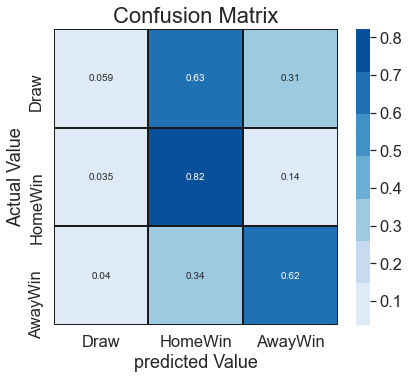

In [82]:
print(f"Accuracy Score: {accuracy_score(y_test,test_pred)}")
print("----")
print(f"Log loss Score: {log_loss(y_test, test_prob)}")
print("----")
print(classification_report(y_test,test_pred))


plt.figure(figsize=(14,12))
plt.subplot(221)
ax=sns.heatmap(confusion_matrix(y_test,test_pred,normalize='true'),
               annot=True,linecolor='k',linewidth=1,
               cmap =sns.color_palette('Blues',7))
ax.xaxis.set_ticklabels(['Draw','HomeWin','AwayWin'])
ax.yaxis.set_ticklabels(['Draw','HomeWin','AwayWin'])
plt.title("Confusion Matrix",fontsize=22)
plt.xlabel("predicted Value")
plt.ylabel("Actual Value")

The baseline model was able to predict an accuracy score of 59% on our training set and 57% on our test set with a probability of loss at -0.9. with this information,I will go ahead and build more model and compare the results. First, I will define a function to help me evaluate the algorithm.

In [83]:
#define a function to evaluate the algorithms
def evaluate_model(estimator,X_train,X_test,y_train,y_test):
    """
    An evaluation function that shows the classification report 
    and log_loss for the training and the test scores.
    input: 
    Algorithm - the model best output estimator
    X_train - the training features, either scaled or unscaled
    X_test - the testing features
    y_train- the training target variable
    y_test - the testing target variable

    """

    #predictions
    train_pred = estimator.predict(X_train_scaled)
    test_pred  = estimator.predict(X_test_scaled)
    
    #Roc_auc
    train_prob = estimator.predict_proba(X_train_scaled)
    test_prob = estimator.predict_proba(X_test_scaled)
    
    #print the Training scores
    print("Training Scores:")    
    print(f"Accuracy Score: {accuracy_score(y_train,train_pred)}")
    print("----")
    print(f"Log loss Score: {log_loss(y_train, train_prob)}")
    print("----")
    print(classification_report(y_train,train_pred))
    
    
    print("------------")

    
    #print Test scores  
    print("Test Scores:") 
    print(f"Accuracy Score: {accuracy_score(y_test,test_pred)}")
    print("----")
    print(f"Log loss Score: {log_loss(y_test,test_prob)}")
    print("----")
    print(classification_report(y_test,test_pred))

    
    #plot Confusion matrix
    plt.figure(figsize=(14,12))
    plt.subplot(221)
    ax=sns.heatmap(confusion_matrix(y_test,test_pred,normalize='true'),
                   annot=True,linecolor='k',linewidth=2,
                   cmap =sns.color_palette('Blues',7))
    ax.xaxis.set_ticklabels(['Draw','HomeWin','AwayWin'],fontsize=15)
    ax.yaxis.set_ticklabels(['Draw','HomeWin','AwayWin'],fontsize=15)
    plt.title("Confusion Matrix",fontsize=22)
    plt.xlabel("predicted Value")
    plt.ylabel("Actual Value")  

# First Substandard Models

knn1: 0.512815 (0.004096)
d_tree1: 0.474700 (0.008855)
Rf: 0.562491 (0.004726)
NB: 0.545537 (0.009078)
xgb1: 0.549218 (0.007020)
svc: 0.583649 (0.006996)


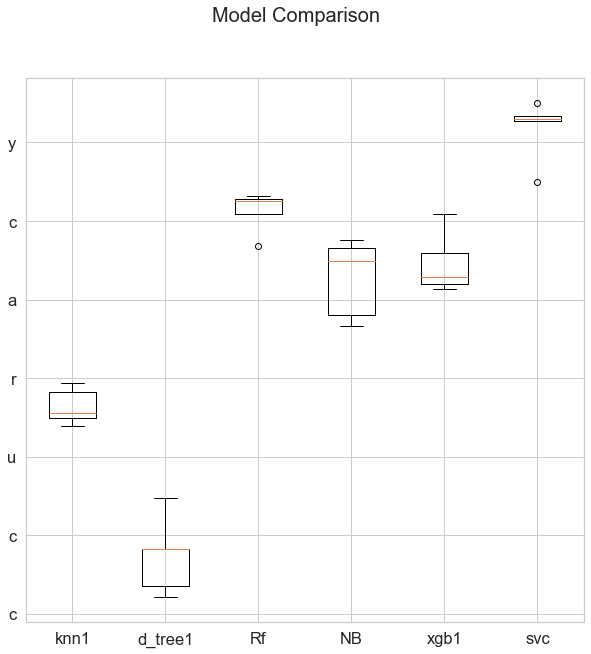

In [84]:
#prepare models
models =[]
models.append(('knn1',KNeighborsClassifier()))
models.append(('d_tree1',DecisionTreeClassifier()))
models.append(('Rf',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('xgb1',XGBClassifier()))
models.append(('svc',SVC()))

#evaluate each models
results=[]
names=[]
scoring ='accuracy'
for name, model in models:
    cv_results = cross_val_score(model,X_train_scaled, y_train,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(message)

#plot a boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Model Comparison',fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_yticklabels('accuracy score')
plt.show()

# Feature Engineering with GridsearchCV

### GridSearchCV using Decison Tree Classifier

In [85]:
d_tree = Pipeline(steps=[('classifier', DecisionTreeClassifier())])
d_tree

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [86]:
cross_validate(d_tree,X_train_scaled, y_train, return_train_score=True)

{'fit_time': array([0.05342579, 0.05115175, 0.05215788, 0.05304503, 0.05096102]),
 'score_time': array([0.00098991, 0.0007031 , 0.0008502 , 0.00089288, 0.00080419]),
 'test_score': array([0.46911958, 0.47240473, 0.44743758, 0.47700394, 0.47140039]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [87]:
param = [{ 
    'classifier__criterion':['gini','entropy'],
    'classifier__splitter':['best'],
    'classifier__max_depth': [5,10,50],
    'classifier__min_samples_split':[10,20,100]}]

grid = GridSearchCV(estimator= d_tree,
                    param_grid = param, scoring='accuracy')

In [88]:
output = grid.fit(X_train_scaled, y_train)

In [89]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020951,0.000235,0.000617,0.000065,gini,5,10,best,"{'classifier__criterion': 'gini', 'classifier_...",0.583443,0.580158,0.574901,0.574244,0.545694,0.571688,0.013435,5
1,0.020649,0.000386,0.000565,0.000054,gini,5,20,best,"{'classifier__criterion': 'gini', 'classifier_...",0.583443,0.580158,0.574901,0.574244,0.545694,0.571688,0.013435,5
2,0.024357,0.001948,0.000953,0.000209,gini,5,100,best,"{'classifier__criterion': 'gini', 'classifier_...",0.583443,0.580158,0.574901,0.573587,0.546351,0.571688,0.013159,4
3,0.038919,0.000389,0.000701,0.000061,gini,10,10,best,"{'classifier__criterion': 'gini', 'classifier_...",0.524310,0.528252,0.521682,0.522339,0.503616,0.520040,0.008525,14
4,0.038262,0.000499,0.000771,0.000128,gini,10,20,best,"{'classifier__criterion': 'gini', 'classifier_...",0.528909,0.521025,0.519054,0.523653,0.509533,0.520435,0.006376,13
5,0.034152,0.001023,0.000717,0.000071,gini,10,100,best,"{'classifier__criterion': 'gini', 'classifier_...",0.553219,0.557819,0.558476,0.554534,0.535174,0.551844,0.008564,9
6,0.050491,0.001904,0.000841,0.000072,gini,50,10,best,"{'classifier__criterion': 'gini', 'classifier_...",0.475690,0.479632,0.471091,0.469777,0.472715,0.473781,0.003530,18
7,0.047693,0.002008,0.000730,0.000075,gini,50,20,best,"{'classifier__criterion': 'gini', 'classifier_...",0.495401,0.489488,0.477661,0.493430,0.484550,0.488106,0.006406,16
8,0.035484,0.001227,0.000724,0.000021,gini,50,100,best,"{'classifier__criterion': 'gini', 'classifier_...",0.543364,0.562418,0.557819,0.551905,0.529915,0.549084,0.011509,10
9,0.031133,0.000288,0.000552,0.000059,entropy,5,10,best,"{'classifier__criterion': 'entropy', 'classifi...",0.576216,0.578187,0.575558,0.570302,0.562130,0.572479,0.005794,1


In [90]:
output.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__min_samples_split': 10,
 'classifier__splitter': 'best'}

In [91]:
output.best_score_

0.5724785979208298

Training Scores:
Accuracy Score: 0.5879879090550664
----
Log loss Score: 0.8812050175826525
----
              precision    recall  f1-score   support

           0       0.45      0.06      0.11      1871
           1       0.63      0.80      0.70      3460
           2       0.54      0.70      0.61      2278

    accuracy                           0.59      7609
   macro avg       0.54      0.52      0.48      7609
weighted avg       0.56      0.59      0.53      7609

------------
Test Scores:
Accuracy Score: 0.5864424592748292
----
Log loss Score: 1.0010352631908688
----
              precision    recall  f1-score   support

           0       0.41      0.06      0.11       441
           1       0.64      0.77      0.70       887
           2       0.53      0.70      0.61       575

    accuracy                           0.59      1903
   macro avg       0.53      0.51      0.47      1903
weighted avg       0.55      0.59      0.53      1903



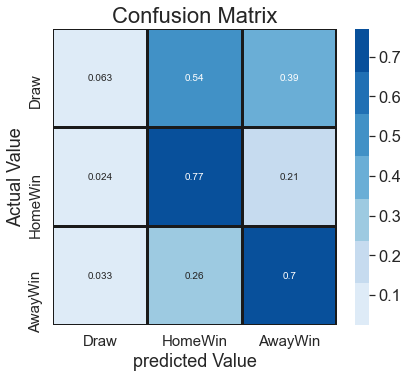

In [92]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)

### GridSearchCV using Random Forest 

In [93]:
Random_forest = Pipeline(steps=[('classifier', RandomForestClassifier())])
Random_forest

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [94]:
cross_validate(Random_forest,X_train_scaled, y_train, return_train_score=True)

{'fit_time': array([1.44939208, 1.20822501, 1.17466903, 1.17846394, 1.18358278]),
 'score_time': array([0.03199196, 0.03198504, 0.03046489, 0.03149128, 0.03068018]),
 'test_score': array([0.55519054, 0.57161629, 0.56176084, 0.56898817, 0.56081525]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [95]:
param = [{
    'classifier__criterion':['gini','entropy'],
    'classifier__max_features':['sqrt','log2'],
    'classifier__max_depth': [5,10,50],
    'classifier__min_samples_split':[10,20,100]}]

grid = GridSearchCV(estimator= Random_forest,
                    param_grid = param, scoring='accuracy')

In [96]:
output = grid.fit(X_train_scaled, y_train)

In [97]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.536832,0.003750,0.017513,0.000122,gini,5,sqrt,10,"{'classifier__criterion': 'gini', 'classifier_...",0.578187,0.579501,0.580158,0.584757,0.560815,0.576683,0.008237,20
1,0.535158,0.001673,0.017519,0.000044,gini,5,sqrt,20,"{'classifier__criterion': 'gini', 'classifier_...",0.574901,0.578844,0.583443,0.578187,0.562130,0.575501,0.007219,26
2,0.542012,0.007824,0.018085,0.000671,gini,5,sqrt,100,"{'classifier__criterion': 'gini', 'classifier_...",0.578187,0.577530,0.578187,0.577530,0.568047,0.575896,0.003935,25
3,0.548063,0.003061,0.018437,0.000756,gini,5,log2,10,"{'classifier__criterion': 'gini', 'classifier_...",0.574244,0.579501,0.581472,0.582786,0.565417,0.576684,0.006340,19
4,0.579746,0.035299,0.022394,0.005467,gini,5,log2,20,"{'classifier__criterion': 'gini', 'classifier_...",0.576873,0.578844,0.581472,0.586728,0.562130,0.577209,0.008233,15
5,0.576029,0.007913,0.020045,0.000293,gini,5,log2,100,"{'classifier__criterion': 'gini', 'classifier_...",0.575558,0.580158,0.574901,0.579501,0.564103,0.574844,0.005759,29
6,0.932868,0.007343,0.025962,0.001667,gini,10,sqrt,10,"{'classifier__criterion': 'gini', 'classifier_...",0.567674,0.588699,0.581472,0.580815,0.567390,0.577210,0.008373,14
7,0.897913,0.009174,0.025128,0.001224,gini,10,sqrt,20,"{'classifier__criterion': 'gini', 'classifier_...",0.576216,0.582129,0.580815,0.579501,0.573307,0.578393,0.003214,9
8,0.826529,0.069801,0.024543,0.004503,gini,10,sqrt,100,"{'classifier__criterion': 'gini', 'classifier_...",0.577530,0.582129,0.582786,0.582129,0.566075,0.578130,0.006314,11
9,0.991276,0.096114,0.027103,0.003253,gini,10,log2,10,"{'classifier__criterion': 'gini', 'classifier_...",0.573587,0.582786,0.587385,0.568988,0.563445,0.575238,0.008779,27


In [98]:
output.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_features': 'log2',
 'classifier__min_samples_split': 100}

In [99]:
output.best_score_

0.5823345696387241

Training Scores:
Accuracy Score: 0.6282034432908398
----
Log loss Score: 0.8159412549800323
----
              precision    recall  f1-score   support

           0       0.61      0.17      0.26      1871
           1       0.64      0.85      0.73      3460
           2       0.62      0.67      0.64      2278

    accuracy                           0.63      7609
   macro avg       0.62      0.56      0.54      7609
weighted avg       0.62      0.63      0.59      7609

------------
Test Scores:
Accuracy Score: 0.5943247503941146
----
Log loss Score: 0.8831307194376997
----
              precision    recall  f1-score   support

           0       0.42      0.12      0.18       441
           1       0.61      0.81      0.70       887
           2       0.59      0.63      0.61       575

    accuracy                           0.59      1903
   macro avg       0.54      0.52      0.50      1903
weighted avg       0.56      0.59      0.55      1903



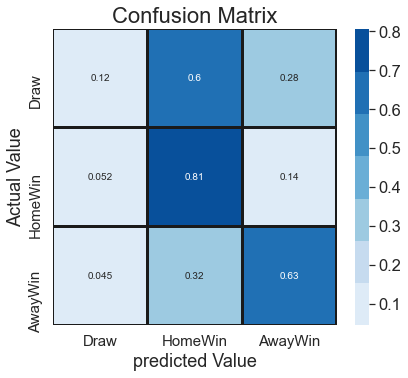

In [100]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)

### GridSearchCV using  XGBOOST Classifier

In [101]:
xgb_model= Pipeline(steps=[('pca',PCA()),
                           ('classifier', XGBClassifier(objective='multi:softmax'))])
xgb_model

Pipeline(steps=[('pca', PCA()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softmax', random_state=None,
                               reg_alpha=None, reg_lambda=None,
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parameters=None,
                 

In [102]:
cross_validate(xgb_model,X_train_scaled, y_train, return_train_score=True)

{'fit_time': array([1.14613199, 0.99648714, 1.05205607, 1.01946807, 0.99987602]),
 'score_time': array([0.009305  , 0.00957084, 0.00934291, 0.00651479, 0.00716591]),
 'test_score': array([0.55716163, 0.55913272, 0.55519054, 0.56636005, 0.53977646]),
 'train_score': array([0.96024314, 0.95564317, 0.95942172, 0.94808609, 0.95532194])}

In [103]:
param = [{
    'pca__n_components':[5,10],
    'classifier__gamma':[0.5,0.1],
    'classifier__max_depth': [10,20,50],
    'classifier__n_estimators':[20,60,100]}]

grid = GridSearchCV(estimator = xgb_model,
                    param_grid = param, scoring='accuracy')

In [104]:
output=grid.fit(X_train_scaled,y_train)

In [105]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__gamma,param_classifier__max_depth,param_classifier__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.243670,0.029778,0.003434,0.000741,0.5,10,20,5,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.532852,0.544021,0.528252,0.547963,0.533859,0.537389,0.007380,19
1,0.389592,0.014141,0.003569,0.000507,0.5,10,20,10,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.544678,0.558476,0.555191,0.568988,0.538462,0.553159,0.010685,12
2,0.703726,0.020062,0.008602,0.001920,0.5,10,60,5,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.533509,0.536794,0.513798,0.540736,0.520053,0.528978,0.010295,23
3,1.201024,0.039587,0.007328,0.000900,0.5,10,60,10,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.549934,0.550591,0.542707,0.568988,0.538462,0.550136,0.010461,16
4,1.140108,0.068745,0.009406,0.002516,0.5,10,100,5,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.535480,0.536794,0.517083,0.541393,0.521368,0.530423,0.009449,22
5,2.020099,0.095662,0.007859,0.000533,0.5,10,100,10,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.550591,0.550591,0.541393,0.574244,0.539119,0.551188,0.012441,14
6,0.483304,0.018784,0.004822,0.000680,0.5,20,20,5,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.523653,0.528909,0.518397,0.523653,0.532544,0.525431,0.004868,26
7,0.708319,0.010669,0.005158,0.000707,0.5,20,20,10,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.541393,0.555848,0.567017,0.568988,0.535832,0.553815,0.013314,9
8,1.322641,0.119316,0.007379,0.000528,0.5,20,60,5,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.522339,0.536137,0.515112,0.526281,0.530572,0.526088,0.007151,24
9,2.348069,0.159504,0.010218,0.002567,0.5,20,60,10,"{'classifier__gamma': 0.5, 'classifier__max_de...",0.545992,0.555848,0.559133,0.568988,0.538462,0.553684,0.010578,10


In [106]:
output.best_params_

{'classifier__gamma': 0.1,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 20,
 'pca__n_components': 10}

In [107]:
output.best_score_

0.5578910582549519

Training Scores:
Accuracy Score: 1.0
----
Log loss Score: 0.08440694298206211
----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1871
           1       1.00      1.00      1.00      3460
           2       1.00      1.00      1.00      2278

    accuracy                           1.00      7609
   macro avg       1.00      1.00      1.00      7609
weighted avg       1.00      1.00      1.00      7609

------------
Test Scores:
Accuracy Score: 0.5564897530215449
----
Log loss Score: 1.0248120734588004
----
              precision    recall  f1-score   support

           0       0.33      0.21      0.25       441
           1       0.63      0.72      0.67       887
           2       0.54      0.57      0.56       575

    accuracy                           0.56      1903
   macro avg       0.50      0.50      0.49      1903
weighted avg       0.53      0.56      0.54      1903



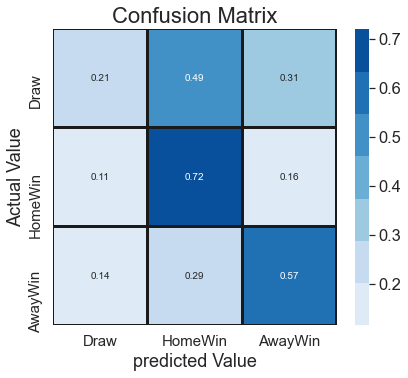

In [108]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)

### GridsearchCV  Catboost Model

In [109]:
cat_boost = Pipeline(steps=[('classifier', CatBoostClassifier(loss_function='MultiClass',classes_count=3))])
cat_boost

Pipeline(steps=[('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7fe36368a130>)])

In [110]:
cross_validate(cat_boost,X_train_scaled, y_train, return_train_score=True)

Learning rate set to 0.086762
0:	learn: 1.0679922	total: 63.6ms	remaining: 1m 3s
1:	learn: 1.0417624	total: 68.9ms	remaining: 34.4s
2:	learn: 1.0220886	total: 73.5ms	remaining: 24.4s
3:	learn: 1.0044217	total: 78.1ms	remaining: 19.4s
4:	learn: 0.9888343	total: 82.6ms	remaining: 16.4s
5:	learn: 0.9753747	total: 87.4ms	remaining: 14.5s
6:	learn: 0.9644216	total: 91.9ms	remaining: 13s
7:	learn: 0.9559916	total: 96.6ms	remaining: 12s
8:	learn: 0.9474205	total: 101ms	remaining: 11.1s
9:	learn: 0.9397247	total: 106ms	remaining: 10.5s
10:	learn: 0.9323854	total: 110ms	remaining: 9.93s
11:	learn: 0.9259183	total: 115ms	remaining: 9.46s
12:	learn: 0.9205443	total: 119ms	remaining: 9.06s
13:	learn: 0.9160601	total: 124ms	remaining: 8.71s
14:	learn: 0.9118437	total: 128ms	remaining: 8.41s
15:	learn: 0.9073233	total: 133ms	remaining: 8.16s
16:	learn: 0.9041050	total: 137ms	remaining: 7.93s
17:	learn: 0.9009083	total: 142ms	remaining: 7.72s
18:	learn: 0.8976581	total: 146ms	remaining: 7.55s
19:	lea

163:	learn: 0.7771188	total: 780ms	remaining: 3.97s
164:	learn: 0.7764047	total: 784ms	remaining: 3.97s
165:	learn: 0.7754594	total: 789ms	remaining: 3.96s
166:	learn: 0.7744712	total: 793ms	remaining: 3.96s
167:	learn: 0.7740399	total: 799ms	remaining: 3.95s
168:	learn: 0.7736913	total: 805ms	remaining: 3.96s
169:	learn: 0.7731652	total: 809ms	remaining: 3.95s
170:	learn: 0.7728054	total: 813ms	remaining: 3.94s
171:	learn: 0.7723149	total: 817ms	remaining: 3.93s
172:	learn: 0.7719689	total: 821ms	remaining: 3.92s
173:	learn: 0.7712660	total: 825ms	remaining: 3.92s
174:	learn: 0.7706710	total: 829ms	remaining: 3.91s
175:	learn: 0.7701672	total: 834ms	remaining: 3.9s
176:	learn: 0.7695507	total: 838ms	remaining: 3.9s
177:	learn: 0.7692649	total: 842ms	remaining: 3.89s
178:	learn: 0.7686960	total: 846ms	remaining: 3.88s
179:	learn: 0.7682308	total: 850ms	remaining: 3.87s
180:	learn: 0.7677546	total: 854ms	remaining: 3.86s
181:	learn: 0.7672299	total: 858ms	remaining: 3.86s
182:	learn: 0.

344:	learn: 0.6830350	total: 1.56s	remaining: 2.96s
345:	learn: 0.6825790	total: 1.56s	remaining: 2.95s
346:	learn: 0.6824260	total: 1.57s	remaining: 2.95s
347:	learn: 0.6819460	total: 1.57s	remaining: 2.94s
348:	learn: 0.6816653	total: 1.57s	remaining: 2.94s
349:	learn: 0.6812725	total: 1.58s	remaining: 2.93s
350:	learn: 0.6808637	total: 1.58s	remaining: 2.93s
351:	learn: 0.6804176	total: 1.59s	remaining: 2.92s
352:	learn: 0.6800026	total: 1.59s	remaining: 2.92s
353:	learn: 0.6796931	total: 1.6s	remaining: 2.91s
354:	learn: 0.6793533	total: 1.6s	remaining: 2.91s
355:	learn: 0.6788874	total: 1.6s	remaining: 2.9s
356:	learn: 0.6786302	total: 1.61s	remaining: 2.9s
357:	learn: 0.6783477	total: 1.61s	remaining: 2.89s
358:	learn: 0.6778867	total: 1.62s	remaining: 2.89s
359:	learn: 0.6773560	total: 1.62s	remaining: 2.88s
360:	learn: 0.6769631	total: 1.63s	remaining: 2.88s
361:	learn: 0.6764904	total: 1.63s	remaining: 2.87s
362:	learn: 0.6761344	total: 1.63s	remaining: 2.87s
363:	learn: 0.675

532:	learn: 0.6061579	total: 2.33s	remaining: 2.04s
533:	learn: 0.6058422	total: 2.33s	remaining: 2.04s
534:	learn: 0.6055308	total: 2.34s	remaining: 2.03s
535:	learn: 0.6051130	total: 2.34s	remaining: 2.03s
536:	learn: 0.6047769	total: 2.35s	remaining: 2.02s
537:	learn: 0.6042778	total: 2.35s	remaining: 2.02s
538:	learn: 0.6039720	total: 2.36s	remaining: 2.02s
539:	learn: 0.6035605	total: 2.36s	remaining: 2.01s
540:	learn: 0.6029918	total: 2.37s	remaining: 2.01s
541:	learn: 0.6028911	total: 2.37s	remaining: 2s
542:	learn: 0.6025163	total: 2.37s	remaining: 2s
543:	learn: 0.6020934	total: 2.38s	remaining: 1.99s
544:	learn: 0.6016934	total: 2.38s	remaining: 1.99s
545:	learn: 0.6014747	total: 2.39s	remaining: 1.98s
546:	learn: 0.6009714	total: 2.39s	remaining: 1.98s
547:	learn: 0.6006893	total: 2.39s	remaining: 1.97s
548:	learn: 0.6005101	total: 2.4s	remaining: 1.97s
549:	learn: 0.6002851	total: 2.4s	remaining: 1.97s
550:	learn: 0.5999069	total: 2.41s	remaining: 1.96s
551:	learn: 0.599592

720:	learn: 0.5434121	total: 3.11s	remaining: 1.2s
721:	learn: 0.5431993	total: 3.11s	remaining: 1.2s
722:	learn: 0.5429705	total: 3.12s	remaining: 1.19s
723:	learn: 0.5426504	total: 3.12s	remaining: 1.19s
724:	learn: 0.5423037	total: 3.12s	remaining: 1.19s
725:	learn: 0.5420889	total: 3.13s	remaining: 1.18s
726:	learn: 0.5419380	total: 3.13s	remaining: 1.18s
727:	learn: 0.5415377	total: 3.14s	remaining: 1.17s
728:	learn: 0.5413528	total: 3.14s	remaining: 1.17s
729:	learn: 0.5411072	total: 3.14s	remaining: 1.16s
730:	learn: 0.5408061	total: 3.15s	remaining: 1.16s
731:	learn: 0.5406480	total: 3.15s	remaining: 1.15s
732:	learn: 0.5404747	total: 3.16s	remaining: 1.15s
733:	learn: 0.5399849	total: 3.16s	remaining: 1.15s
734:	learn: 0.5396606	total: 3.16s	remaining: 1.14s
735:	learn: 0.5392197	total: 3.17s	remaining: 1.14s
736:	learn: 0.5387952	total: 3.17s	remaining: 1.13s
737:	learn: 0.5385025	total: 3.18s	remaining: 1.13s
738:	learn: 0.5383719	total: 3.18s	remaining: 1.12s
739:	learn: 0.

908:	learn: 0.4910641	total: 3.88s	remaining: 388ms
909:	learn: 0.4907806	total: 3.88s	remaining: 384ms
910:	learn: 0.4905568	total: 3.89s	remaining: 380ms
911:	learn: 0.4902713	total: 3.89s	remaining: 376ms
912:	learn: 0.4900299	total: 3.9s	remaining: 371ms
913:	learn: 0.4897071	total: 3.9s	remaining: 367ms
914:	learn: 0.4893881	total: 3.91s	remaining: 363ms
915:	learn: 0.4892834	total: 3.91s	remaining: 359ms
916:	learn: 0.4889912	total: 3.92s	remaining: 354ms
917:	learn: 0.4886663	total: 3.92s	remaining: 350ms
918:	learn: 0.4883762	total: 3.92s	remaining: 346ms
919:	learn: 0.4881415	total: 3.93s	remaining: 342ms
920:	learn: 0.4879088	total: 3.93s	remaining: 337ms
921:	learn: 0.4877795	total: 3.94s	remaining: 333ms
922:	learn: 0.4875189	total: 3.94s	remaining: 329ms
923:	learn: 0.4872395	total: 3.94s	remaining: 324ms
924:	learn: 0.4869655	total: 3.95s	remaining: 320ms
925:	learn: 0.4866098	total: 3.95s	remaining: 316ms
926:	learn: 0.4862737	total: 3.96s	remaining: 312ms
927:	learn: 0.

94:	learn: 0.8253139	total: 389ms	remaining: 3.71s
95:	learn: 0.8244655	total: 393ms	remaining: 3.71s
96:	learn: 0.8237456	total: 398ms	remaining: 3.71s
97:	learn: 0.8230526	total: 403ms	remaining: 3.71s
98:	learn: 0.8225539	total: 407ms	remaining: 3.7s
99:	learn: 0.8218724	total: 411ms	remaining: 3.7s
100:	learn: 0.8213017	total: 415ms	remaining: 3.69s
101:	learn: 0.8206870	total: 419ms	remaining: 3.69s
102:	learn: 0.8197906	total: 423ms	remaining: 3.69s
103:	learn: 0.8189906	total: 427ms	remaining: 3.68s
104:	learn: 0.8182479	total: 431ms	remaining: 3.68s
105:	learn: 0.8177763	total: 436ms	remaining: 3.67s
106:	learn: 0.8171738	total: 440ms	remaining: 3.67s
107:	learn: 0.8165315	total: 444ms	remaining: 3.67s
108:	learn: 0.8156778	total: 448ms	remaining: 3.66s
109:	learn: 0.8149398	total: 452ms	remaining: 3.66s
110:	learn: 0.8143551	total: 456ms	remaining: 3.65s
111:	learn: 0.8139249	total: 460ms	remaining: 3.65s
112:	learn: 0.8135162	total: 464ms	remaining: 3.64s
113:	learn: 0.813092

285:	learn: 0.7248252	total: 1.17s	remaining: 2.92s
286:	learn: 0.7244023	total: 1.17s	remaining: 2.92s
287:	learn: 0.7240346	total: 1.18s	remaining: 2.92s
288:	learn: 0.7233600	total: 1.18s	remaining: 2.91s
289:	learn: 0.7228570	total: 1.19s	remaining: 2.91s
290:	learn: 0.7221730	total: 1.19s	remaining: 2.9s
291:	learn: 0.7217598	total: 1.2s	remaining: 2.9s
292:	learn: 0.7212364	total: 1.2s	remaining: 2.9s
293:	learn: 0.7209667	total: 1.21s	remaining: 2.89s
294:	learn: 0.7202206	total: 1.21s	remaining: 2.89s
295:	learn: 0.7196238	total: 1.21s	remaining: 2.89s
296:	learn: 0.7192802	total: 1.22s	remaining: 2.88s
297:	learn: 0.7186850	total: 1.22s	remaining: 2.88s
298:	learn: 0.7182154	total: 1.23s	remaining: 2.87s
299:	learn: 0.7175908	total: 1.23s	remaining: 2.87s
300:	learn: 0.7171537	total: 1.23s	remaining: 2.87s
301:	learn: 0.7167206	total: 1.24s	remaining: 2.86s
302:	learn: 0.7163128	total: 1.24s	remaining: 2.86s
303:	learn: 0.7155991	total: 1.25s	remaining: 2.85s
304:	learn: 0.715

473:	learn: 0.6433419	total: 1.94s	remaining: 2.15s
474:	learn: 0.6430576	total: 1.94s	remaining: 2.15s
475:	learn: 0.6425543	total: 1.95s	remaining: 2.15s
476:	learn: 0.6420844	total: 1.95s	remaining: 2.14s
477:	learn: 0.6415507	total: 1.96s	remaining: 2.14s
478:	learn: 0.6410110	total: 1.96s	remaining: 2.13s
479:	learn: 0.6406371	total: 1.97s	remaining: 2.13s
480:	learn: 0.6401618	total: 1.97s	remaining: 2.13s
481:	learn: 0.6399282	total: 1.97s	remaining: 2.12s
482:	learn: 0.6396777	total: 1.98s	remaining: 2.12s
483:	learn: 0.6395115	total: 1.98s	remaining: 2.11s
484:	learn: 0.6390951	total: 1.99s	remaining: 2.11s
485:	learn: 0.6386257	total: 1.99s	remaining: 2.1s
486:	learn: 0.6382779	total: 1.99s	remaining: 2.1s
487:	learn: 0.6377619	total: 2s	remaining: 2.1s
488:	learn: 0.6375269	total: 2s	remaining: 2.09s
489:	learn: 0.6372865	total: 2.01s	remaining: 2.09s
490:	learn: 0.6365713	total: 2.01s	remaining: 2.08s
491:	learn: 0.6363128	total: 2.01s	remaining: 2.08s
492:	learn: 0.6359984

661:	learn: 0.5759351	total: 2.71s	remaining: 1.38s
662:	learn: 0.5757646	total: 2.71s	remaining: 1.38s
663:	learn: 0.5755636	total: 2.72s	remaining: 1.38s
664:	learn: 0.5750563	total: 2.72s	remaining: 1.37s
665:	learn: 0.5748310	total: 2.73s	remaining: 1.37s
666:	learn: 0.5745480	total: 2.73s	remaining: 1.36s
667:	learn: 0.5742171	total: 2.73s	remaining: 1.36s
668:	learn: 0.5739187	total: 2.74s	remaining: 1.35s
669:	learn: 0.5735372	total: 2.74s	remaining: 1.35s
670:	learn: 0.5732375	total: 2.75s	remaining: 1.35s
671:	learn: 0.5729761	total: 2.75s	remaining: 1.34s
672:	learn: 0.5724517	total: 2.76s	remaining: 1.34s
673:	learn: 0.5720482	total: 2.76s	remaining: 1.33s
674:	learn: 0.5717868	total: 2.76s	remaining: 1.33s
675:	learn: 0.5715620	total: 2.77s	remaining: 1.33s
676:	learn: 0.5712912	total: 2.77s	remaining: 1.32s
677:	learn: 0.5708737	total: 2.78s	remaining: 1.32s
678:	learn: 0.5705833	total: 2.78s	remaining: 1.31s
679:	learn: 0.5701984	total: 2.78s	remaining: 1.31s
680:	learn: 

849:	learn: 0.5185844	total: 3.48s	remaining: 614ms
850:	learn: 0.5183152	total: 3.48s	remaining: 610ms
851:	learn: 0.5179746	total: 3.49s	remaining: 606ms
852:	learn: 0.5177623	total: 3.49s	remaining: 602ms
853:	learn: 0.5174449	total: 3.5s	remaining: 598ms
854:	learn: 0.5169730	total: 3.5s	remaining: 594ms
855:	learn: 0.5165793	total: 3.51s	remaining: 590ms
856:	learn: 0.5163594	total: 3.51s	remaining: 586ms
857:	learn: 0.5161329	total: 3.51s	remaining: 582ms
858:	learn: 0.5159193	total: 3.52s	remaining: 578ms
859:	learn: 0.5156004	total: 3.52s	remaining: 573ms
860:	learn: 0.5154233	total: 3.53s	remaining: 569ms
861:	learn: 0.5150310	total: 3.53s	remaining: 565ms
862:	learn: 0.5145982	total: 3.53s	remaining: 561ms
863:	learn: 0.5142907	total: 3.54s	remaining: 557ms
864:	learn: 0.5140520	total: 3.54s	remaining: 553ms
865:	learn: 0.5138392	total: 3.55s	remaining: 549ms
866:	learn: 0.5134474	total: 3.55s	remaining: 545ms
867:	learn: 0.5132317	total: 3.56s	remaining: 541ms
868:	learn: 0.

17:	learn: 0.9055403	total: 75.3ms	remaining: 4.11s
18:	learn: 0.9024767	total: 80.3ms	remaining: 4.14s
19:	learn: 0.8992366	total: 84.7ms	remaining: 4.15s
20:	learn: 0.8965318	total: 89.6ms	remaining: 4.18s
21:	learn: 0.8946804	total: 93.7ms	remaining: 4.17s
22:	learn: 0.8930943	total: 97.8ms	remaining: 4.16s
23:	learn: 0.8911980	total: 102ms	remaining: 4.15s
24:	learn: 0.8899053	total: 106ms	remaining: 4.15s
25:	learn: 0.8883946	total: 110ms	remaining: 4.14s
26:	learn: 0.8862475	total: 114ms	remaining: 4.13s
27:	learn: 0.8844225	total: 119ms	remaining: 4.12s
28:	learn: 0.8829507	total: 123ms	remaining: 4.11s
29:	learn: 0.8814062	total: 127ms	remaining: 4.1s
30:	learn: 0.8799562	total: 131ms	remaining: 4.09s
31:	learn: 0.8784287	total: 135ms	remaining: 4.08s
32:	learn: 0.8770282	total: 139ms	remaining: 4.07s
33:	learn: 0.8759009	total: 143ms	remaining: 4.06s
34:	learn: 0.8751243	total: 147ms	remaining: 4.05s
35:	learn: 0.8737289	total: 151ms	remaining: 4.05s
36:	learn: 0.8726391	total

206:	learn: 0.7592109	total: 848ms	remaining: 3.25s
207:	learn: 0.7587641	total: 852ms	remaining: 3.25s
208:	learn: 0.7580940	total: 857ms	remaining: 3.24s
209:	learn: 0.7578040	total: 862ms	remaining: 3.24s
210:	learn: 0.7572977	total: 866ms	remaining: 3.24s
211:	learn: 0.7569189	total: 870ms	remaining: 3.23s
212:	learn: 0.7564161	total: 874ms	remaining: 3.23s
213:	learn: 0.7560881	total: 878ms	remaining: 3.23s
214:	learn: 0.7556742	total: 882ms	remaining: 3.22s
215:	learn: 0.7550135	total: 887ms	remaining: 3.22s
216:	learn: 0.7545040	total: 891ms	remaining: 3.21s
217:	learn: 0.7540385	total: 895ms	remaining: 3.21s
218:	learn: 0.7536593	total: 899ms	remaining: 3.2s
219:	learn: 0.7529710	total: 903ms	remaining: 3.2s
220:	learn: 0.7524014	total: 907ms	remaining: 3.19s
221:	learn: 0.7519034	total: 911ms	remaining: 3.19s
222:	learn: 0.7511901	total: 915ms	remaining: 3.19s
223:	learn: 0.7507696	total: 919ms	remaining: 3.18s
224:	learn: 0.7502693	total: 923ms	remaining: 3.18s
225:	learn: 0.

397:	learn: 0.6684134	total: 1.62s	remaining: 2.46s
398:	learn: 0.6677645	total: 1.63s	remaining: 2.45s
399:	learn: 0.6672439	total: 1.63s	remaining: 2.45s
400:	learn: 0.6669639	total: 1.64s	remaining: 2.45s
401:	learn: 0.6665424	total: 1.64s	remaining: 2.44s
402:	learn: 0.6661183	total: 1.65s	remaining: 2.44s
403:	learn: 0.6655923	total: 1.65s	remaining: 2.44s
404:	learn: 0.6651577	total: 1.66s	remaining: 2.43s
405:	learn: 0.6648457	total: 1.66s	remaining: 2.43s
406:	learn: 0.6643830	total: 1.66s	remaining: 2.42s
407:	learn: 0.6636737	total: 1.67s	remaining: 2.42s
408:	learn: 0.6630161	total: 1.67s	remaining: 2.42s
409:	learn: 0.6624039	total: 1.68s	remaining: 2.41s
410:	learn: 0.6618761	total: 1.68s	remaining: 2.41s
411:	learn: 0.6614625	total: 1.68s	remaining: 2.4s
412:	learn: 0.6610322	total: 1.69s	remaining: 2.4s
413:	learn: 0.6602984	total: 1.69s	remaining: 2.4s
414:	learn: 0.6599954	total: 1.7s	remaining: 2.39s
415:	learn: 0.6596512	total: 1.7s	remaining: 2.39s
416:	learn: 0.659

584:	learn: 0.5931073	total: 2.4s	remaining: 1.7s
585:	learn: 0.5927199	total: 2.4s	remaining: 1.7s
586:	learn: 0.5924036	total: 2.4s	remaining: 1.69s
587:	learn: 0.5919749	total: 2.41s	remaining: 1.69s
588:	learn: 0.5916034	total: 2.41s	remaining: 1.68s
589:	learn: 0.5912470	total: 2.42s	remaining: 1.68s
590:	learn: 0.5909536	total: 2.42s	remaining: 1.68s
591:	learn: 0.5905223	total: 2.43s	remaining: 1.67s
592:	learn: 0.5901012	total: 2.43s	remaining: 1.67s
593:	learn: 0.5899369	total: 2.43s	remaining: 1.66s
594:	learn: 0.5894796	total: 2.44s	remaining: 1.66s
595:	learn: 0.5890014	total: 2.44s	remaining: 1.66s
596:	learn: 0.5887099	total: 2.45s	remaining: 1.65s
597:	learn: 0.5883826	total: 2.45s	remaining: 1.65s
598:	learn: 0.5880489	total: 2.46s	remaining: 1.64s
599:	learn: 0.5877352	total: 2.46s	remaining: 1.64s
600:	learn: 0.5875327	total: 2.46s	remaining: 1.64s
601:	learn: 0.5872074	total: 2.47s	remaining: 1.63s
602:	learn: 0.5866762	total: 2.47s	remaining: 1.63s
603:	learn: 0.586

771:	learn: 0.5310743	total: 3.17s	remaining: 935ms
772:	learn: 0.5307146	total: 3.17s	remaining: 931ms
773:	learn: 0.5303957	total: 3.17s	remaining: 927ms
774:	learn: 0.5299821	total: 3.18s	remaining: 923ms
775:	learn: 0.5295835	total: 3.18s	remaining: 919ms
776:	learn: 0.5290712	total: 3.19s	remaining: 915ms
777:	learn: 0.5287863	total: 3.19s	remaining: 911ms
778:	learn: 0.5284309	total: 3.19s	remaining: 907ms
779:	learn: 0.5282738	total: 3.2s	remaining: 903ms
780:	learn: 0.5278856	total: 3.2s	remaining: 898ms
781:	learn: 0.5277197	total: 3.21s	remaining: 894ms
782:	learn: 0.5274394	total: 3.21s	remaining: 890ms
783:	learn: 0.5271079	total: 3.22s	remaining: 886ms
784:	learn: 0.5267352	total: 3.22s	remaining: 882ms
785:	learn: 0.5263794	total: 3.22s	remaining: 878ms
786:	learn: 0.5259144	total: 3.23s	remaining: 874ms
787:	learn: 0.5254880	total: 3.23s	remaining: 870ms
788:	learn: 0.5251888	total: 3.24s	remaining: 865ms
789:	learn: 0.5249937	total: 3.24s	remaining: 861ms
790:	learn: 0.

960:	learn: 0.4778441	total: 3.94s	remaining: 160ms
961:	learn: 0.4776356	total: 3.94s	remaining: 156ms
962:	learn: 0.4774128	total: 3.95s	remaining: 152ms
963:	learn: 0.4772144	total: 3.95s	remaining: 148ms
964:	learn: 0.4769263	total: 3.96s	remaining: 143ms
965:	learn: 0.4765522	total: 3.96s	remaining: 139ms
966:	learn: 0.4762212	total: 3.96s	remaining: 135ms
967:	learn: 0.4757904	total: 3.97s	remaining: 131ms
968:	learn: 0.4754841	total: 3.97s	remaining: 127ms
969:	learn: 0.4752208	total: 3.98s	remaining: 123ms
970:	learn: 0.4749428	total: 3.98s	remaining: 119ms
971:	learn: 0.4748132	total: 3.98s	remaining: 115ms
972:	learn: 0.4744400	total: 3.99s	remaining: 111ms
973:	learn: 0.4742716	total: 3.99s	remaining: 107ms
974:	learn: 0.4739929	total: 4s	remaining: 102ms
975:	learn: 0.4736583	total: 4s	remaining: 98.4ms
976:	learn: 0.4734596	total: 4s	remaining: 94.3ms
977:	learn: 0.4732721	total: 4.01s	remaining: 90.2ms
978:	learn: 0.4731562	total: 4.01s	remaining: 86.1ms
979:	learn: 0.472

140:	learn: 0.8025535	total: 578ms	remaining: 3.52s
141:	learn: 0.8020366	total: 582ms	remaining: 3.52s
142:	learn: 0.8016380	total: 586ms	remaining: 3.51s
143:	learn: 0.8012067	total: 591ms	remaining: 3.51s
144:	learn: 0.8004858	total: 595ms	remaining: 3.51s
145:	learn: 0.7993193	total: 600ms	remaining: 3.51s
146:	learn: 0.7985812	total: 604ms	remaining: 3.5s
147:	learn: 0.7978325	total: 608ms	remaining: 3.5s
148:	learn: 0.7974695	total: 612ms	remaining: 3.5s
149:	learn: 0.7970088	total: 616ms	remaining: 3.49s
150:	learn: 0.7964075	total: 620ms	remaining: 3.49s
151:	learn: 0.7958429	total: 624ms	remaining: 3.48s
152:	learn: 0.7951329	total: 628ms	remaining: 3.48s
153:	learn: 0.7947832	total: 632ms	remaining: 3.47s
154:	learn: 0.7942734	total: 636ms	remaining: 3.47s
155:	learn: 0.7934187	total: 641ms	remaining: 3.46s
156:	learn: 0.7928517	total: 645ms	remaining: 3.46s
157:	learn: 0.7923505	total: 648ms	remaining: 3.46s
158:	learn: 0.7921096	total: 652ms	remaining: 3.45s
159:	learn: 0.7

328:	learn: 0.7059865	total: 1.35s	remaining: 2.76s
329:	learn: 0.7055793	total: 1.36s	remaining: 2.76s
330:	learn: 0.7052025	total: 1.36s	remaining: 2.75s
331:	learn: 0.7047445	total: 1.37s	remaining: 2.75s
332:	learn: 0.7043991	total: 1.37s	remaining: 2.75s
333:	learn: 0.7039906	total: 1.38s	remaining: 2.74s
334:	learn: 0.7033806	total: 1.38s	remaining: 2.74s
335:	learn: 0.7030565	total: 1.38s	remaining: 2.74s
336:	learn: 0.7027904	total: 1.39s	remaining: 2.73s
337:	learn: 0.7024196	total: 1.39s	remaining: 2.73s
338:	learn: 0.7017701	total: 1.4s	remaining: 2.72s
339:	learn: 0.7010895	total: 1.4s	remaining: 2.72s
340:	learn: 0.7006175	total: 1.41s	remaining: 2.71s
341:	learn: 0.7001961	total: 1.41s	remaining: 2.71s
342:	learn: 0.6996619	total: 1.41s	remaining: 2.71s
343:	learn: 0.6993480	total: 1.42s	remaining: 2.7s
344:	learn: 0.6990731	total: 1.42s	remaining: 2.7s
345:	learn: 0.6985830	total: 1.43s	remaining: 2.69s
346:	learn: 0.6982512	total: 1.43s	remaining: 2.69s
347:	learn: 0.69

513:	learn: 0.6294557	total: 2.12s	remaining: 2.01s
514:	learn: 0.6293041	total: 2.13s	remaining: 2s
515:	learn: 0.6290211	total: 2.13s	remaining: 2s
516:	learn: 0.6284609	total: 2.14s	remaining: 2s
517:	learn: 0.6279296	total: 2.14s	remaining: 1.99s
518:	learn: 0.6277701	total: 2.14s	remaining: 1.99s
519:	learn: 0.6275808	total: 2.15s	remaining: 1.98s
520:	learn: 0.6273106	total: 2.15s	remaining: 1.98s
521:	learn: 0.6267444	total: 2.16s	remaining: 1.98s
522:	learn: 0.6263050	total: 2.16s	remaining: 1.97s
523:	learn: 0.6258086	total: 2.17s	remaining: 1.97s
524:	learn: 0.6254606	total: 2.17s	remaining: 1.96s
525:	learn: 0.6249578	total: 2.17s	remaining: 1.96s
526:	learn: 0.6247922	total: 2.18s	remaining: 1.95s
527:	learn: 0.6246011	total: 2.18s	remaining: 1.95s
528:	learn: 0.6243405	total: 2.19s	remaining: 1.95s
529:	learn: 0.6239335	total: 2.19s	remaining: 1.94s
530:	learn: 0.6234132	total: 2.19s	remaining: 1.94s
531:	learn: 0.6228820	total: 2.2s	remaining: 1.93s
532:	learn: 0.6224894	

702:	learn: 0.5624635	total: 2.9s	remaining: 1.23s
703:	learn: 0.5621874	total: 2.91s	remaining: 1.22s
704:	learn: 0.5616751	total: 2.91s	remaining: 1.22s
705:	learn: 0.5613911	total: 2.92s	remaining: 1.21s
706:	learn: 0.5611949	total: 2.92s	remaining: 1.21s
707:	learn: 0.5609493	total: 2.92s	remaining: 1.21s
708:	learn: 0.5605950	total: 2.93s	remaining: 1.2s
709:	learn: 0.5603260	total: 2.93s	remaining: 1.2s
710:	learn: 0.5600752	total: 2.94s	remaining: 1.19s
711:	learn: 0.5597804	total: 2.94s	remaining: 1.19s
712:	learn: 0.5594901	total: 2.94s	remaining: 1.19s
713:	learn: 0.5591064	total: 2.95s	remaining: 1.18s
714:	learn: 0.5587989	total: 2.95s	remaining: 1.18s
715:	learn: 0.5586059	total: 2.96s	remaining: 1.17s
716:	learn: 0.5584201	total: 2.96s	remaining: 1.17s
717:	learn: 0.5582141	total: 2.96s	remaining: 1.16s
718:	learn: 0.5578739	total: 2.97s	remaining: 1.16s
719:	learn: 0.5576672	total: 2.97s	remaining: 1.16s
720:	learn: 0.5574508	total: 2.98s	remaining: 1.15s
721:	learn: 0.5

888:	learn: 0.5069211	total: 3.68s	remaining: 459ms
889:	learn: 0.5066955	total: 3.68s	remaining: 455ms
890:	learn: 0.5065451	total: 3.69s	remaining: 451ms
891:	learn: 0.5062896	total: 3.69s	remaining: 447ms
892:	learn: 0.5060972	total: 3.7s	remaining: 443ms
893:	learn: 0.5056933	total: 3.7s	remaining: 439ms
894:	learn: 0.5054574	total: 3.71s	remaining: 435ms
895:	learn: 0.5051807	total: 3.71s	remaining: 431ms
896:	learn: 0.5050249	total: 3.71s	remaining: 427ms
897:	learn: 0.5047017	total: 3.72s	remaining: 422ms
898:	learn: 0.5042952	total: 3.72s	remaining: 418ms
899:	learn: 0.5039735	total: 3.73s	remaining: 414ms
900:	learn: 0.5038044	total: 3.73s	remaining: 410ms
901:	learn: 0.5036044	total: 3.74s	remaining: 406ms
902:	learn: 0.5033513	total: 3.74s	remaining: 402ms
903:	learn: 0.5030783	total: 3.74s	remaining: 398ms
904:	learn: 0.5028260	total: 3.75s	remaining: 394ms
905:	learn: 0.5025907	total: 3.75s	remaining: 389ms
906:	learn: 0.5023595	total: 3.76s	remaining: 385ms
907:	learn: 0.

56:	learn: 0.8521187	total: 234ms	remaining: 3.86s
57:	learn: 0.8514528	total: 238ms	remaining: 3.86s
58:	learn: 0.8506861	total: 242ms	remaining: 3.86s
59:	learn: 0.8500349	total: 247ms	remaining: 3.87s
60:	learn: 0.8495094	total: 251ms	remaining: 3.87s
61:	learn: 0.8486497	total: 255ms	remaining: 3.86s
62:	learn: 0.8477561	total: 260ms	remaining: 3.86s
63:	learn: 0.8467989	total: 264ms	remaining: 3.86s
64:	learn: 0.8458916	total: 268ms	remaining: 3.85s
65:	learn: 0.8453654	total: 272ms	remaining: 3.85s
66:	learn: 0.8445947	total: 276ms	remaining: 3.84s
67:	learn: 0.8442401	total: 280ms	remaining: 3.83s
68:	learn: 0.8434369	total: 284ms	remaining: 3.83s
69:	learn: 0.8430752	total: 288ms	remaining: 3.83s
70:	learn: 0.8423219	total: 292ms	remaining: 3.82s
71:	learn: 0.8417004	total: 296ms	remaining: 3.82s
72:	learn: 0.8408224	total: 300ms	remaining: 3.81s
73:	learn: 0.8402381	total: 304ms	remaining: 3.81s
74:	learn: 0.8393816	total: 308ms	remaining: 3.8s
75:	learn: 0.8388407	total: 312m

248:	learn: 0.7341437	total: 1.01s	remaining: 3.06s
249:	learn: 0.7334851	total: 1.02s	remaining: 3.05s
250:	learn: 0.7329902	total: 1.02s	remaining: 3.05s
251:	learn: 0.7326029	total: 1.03s	remaining: 3.05s
252:	learn: 0.7318609	total: 1.03s	remaining: 3.04s
253:	learn: 0.7313115	total: 1.03s	remaining: 3.04s
254:	learn: 0.7305799	total: 1.04s	remaining: 3.04s
255:	learn: 0.7300601	total: 1.04s	remaining: 3.03s
256:	learn: 0.7295571	total: 1.05s	remaining: 3.03s
257:	learn: 0.7290901	total: 1.05s	remaining: 3.02s
258:	learn: 0.7285830	total: 1.05s	remaining: 3.02s
259:	learn: 0.7282603	total: 1.06s	remaining: 3.02s
260:	learn: 0.7279746	total: 1.06s	remaining: 3.01s
261:	learn: 0.7275998	total: 1.07s	remaining: 3.01s
262:	learn: 0.7268956	total: 1.07s	remaining: 3s
263:	learn: 0.7266003	total: 1.07s	remaining: 3s
264:	learn: 0.7262153	total: 1.08s	remaining: 2.99s
265:	learn: 0.7259379	total: 1.08s	remaining: 2.99s
266:	learn: 0.7254020	total: 1.09s	remaining: 2.98s
267:	learn: 0.7250

439:	learn: 0.6463510	total: 1.79s	remaining: 2.28s
440:	learn: 0.6460581	total: 1.8s	remaining: 2.28s
441:	learn: 0.6455042	total: 1.8s	remaining: 2.28s
442:	learn: 0.6452499	total: 1.81s	remaining: 2.27s
443:	learn: 0.6447557	total: 1.81s	remaining: 2.27s
444:	learn: 0.6443987	total: 1.82s	remaining: 2.27s
445:	learn: 0.6436789	total: 1.82s	remaining: 2.26s
446:	learn: 0.6430298	total: 1.82s	remaining: 2.26s
447:	learn: 0.6427407	total: 1.83s	remaining: 2.25s
448:	learn: 0.6424432	total: 1.83s	remaining: 2.25s
449:	learn: 0.6419213	total: 1.84s	remaining: 2.25s
450:	learn: 0.6417208	total: 1.84s	remaining: 2.24s
451:	learn: 0.6414396	total: 1.84s	remaining: 2.24s
452:	learn: 0.6410948	total: 1.85s	remaining: 2.23s
453:	learn: 0.6407946	total: 1.85s	remaining: 2.23s
454:	learn: 0.6404672	total: 1.86s	remaining: 2.22s
455:	learn: 0.6402153	total: 1.86s	remaining: 2.22s
456:	learn: 0.6396220	total: 1.86s	remaining: 2.22s
457:	learn: 0.6394679	total: 1.87s	remaining: 2.21s
458:	learn: 0.

629:	learn: 0.5781183	total: 2.57s	remaining: 1.51s
630:	learn: 0.5777999	total: 2.57s	remaining: 1.5s
631:	learn: 0.5775600	total: 2.58s	remaining: 1.5s
632:	learn: 0.5772860	total: 2.58s	remaining: 1.5s
633:	learn: 0.5767503	total: 2.59s	remaining: 1.49s
634:	learn: 0.5761557	total: 2.59s	remaining: 1.49s
635:	learn: 0.5758327	total: 2.6s	remaining: 1.49s
636:	learn: 0.5754052	total: 2.6s	remaining: 1.48s
637:	learn: 0.5750567	total: 2.6s	remaining: 1.48s
638:	learn: 0.5747423	total: 2.61s	remaining: 1.47s
639:	learn: 0.5744455	total: 2.61s	remaining: 1.47s
640:	learn: 0.5741486	total: 2.62s	remaining: 1.46s
641:	learn: 0.5738330	total: 2.62s	remaining: 1.46s
642:	learn: 0.5735112	total: 2.62s	remaining: 1.46s
643:	learn: 0.5732371	total: 2.63s	remaining: 1.45s
644:	learn: 0.5728931	total: 2.63s	remaining: 1.45s
645:	learn: 0.5726614	total: 2.63s	remaining: 1.44s
646:	learn: 0.5724036	total: 2.64s	remaining: 1.44s
647:	learn: 0.5721967	total: 2.64s	remaining: 1.44s
648:	learn: 0.5719

818:	learn: 0.5160239	total: 3.34s	remaining: 739ms
819:	learn: 0.5156463	total: 3.35s	remaining: 735ms
820:	learn: 0.5153500	total: 3.35s	remaining: 731ms
821:	learn: 0.5150517	total: 3.35s	remaining: 727ms
822:	learn: 0.5147629	total: 3.36s	remaining: 723ms
823:	learn: 0.5145404	total: 3.36s	remaining: 719ms
824:	learn: 0.5142386	total: 3.37s	remaining: 715ms
825:	learn: 0.5137895	total: 3.37s	remaining: 711ms
826:	learn: 0.5136261	total: 3.38s	remaining: 707ms
827:	learn: 0.5134001	total: 3.38s	remaining: 703ms
828:	learn: 0.5130020	total: 3.39s	remaining: 699ms
829:	learn: 0.5128317	total: 3.39s	remaining: 694ms
830:	learn: 0.5124507	total: 3.39s	remaining: 690ms
831:	learn: 0.5122329	total: 3.4s	remaining: 686ms
832:	learn: 0.5119394	total: 3.4s	remaining: 682ms
833:	learn: 0.5118165	total: 3.41s	remaining: 678ms
834:	learn: 0.5116118	total: 3.41s	remaining: 674ms
835:	learn: 0.5112685	total: 3.41s	remaining: 670ms
836:	learn: 0.5109865	total: 3.42s	remaining: 666ms
837:	learn: 0.

{'fit_time': array([4.51498008, 4.34328294, 4.34529209, 4.38854694, 4.3240521 ]),
 'score_time': array([0.00801373, 0.00748205, 0.00742912, 0.00781298, 0.00758076]),
 'test_score': array([0.55519054, 0.56438896, 0.56570302, 0.56176084, 0.55555556]),
 'train_score': array([0.88352226, 0.88171513, 0.88467225, 0.87908658, 0.88452694])}

In [111]:
param = [{
    'classifier__depth':[10,20],
    'classifier__border_count':[100,128],
    'classifier__l2_leaf_reg': [5,8],
    'classifier__leaf_estimation_method':['Newton'],
    'classifier__eval_metric':['Accuracy'],
    'classifier__iterations':[800]}]


grid = GridSearchCV(estimator = cat_boost,
                    param_grid = param, scoring='accuracy')

In [112]:
output=grid.fit(X_train_scaled,y_train)

0:	learn: 0.5942172	total: 26.3ms	remaining: 21s
1:	learn: 0.6021028	total: 53.6ms	remaining: 21.4s
2:	learn: 0.6070314	total: 81.3ms	remaining: 21.6s
3:	learn: 0.6122885	total: 111ms	remaining: 22.1s
4:	learn: 0.6190241	total: 139ms	remaining: 22.2s
5:	learn: 0.6244455	total: 167ms	remaining: 22.1s
6:	learn: 0.6239527	total: 197ms	remaining: 22.4s
7:	learn: 0.6193527	total: 226ms	remaining: 22.4s
8:	learn: 0.6216527	total: 255ms	remaining: 22.4s
9:	learn: 0.6188599	total: 288ms	remaining: 22.8s
10:	learn: 0.6198456	total: 316ms	remaining: 22.7s
11:	learn: 0.6208313	total: 343ms	remaining: 22.5s
12:	learn: 0.6203384	total: 370ms	remaining: 22.4s
13:	learn: 0.6201741	total: 398ms	remaining: 22.3s
14:	learn: 0.6188599	total: 425ms	remaining: 22.2s
15:	learn: 0.6178742	total: 451ms	remaining: 22.1s
16:	learn: 0.6188599	total: 484ms	remaining: 22.3s
17:	learn: 0.6191884	total: 515ms	remaining: 22.4s
18:	learn: 0.6234598	total: 542ms	remaining: 22.3s
19:	learn: 0.6221456	total: 569ms	remain

166:	learn: 0.6947593	total: 4.68s	remaining: 17.7s
167:	learn: 0.6945950	total: 4.71s	remaining: 17.7s
168:	learn: 0.6955807	total: 4.73s	remaining: 17.7s
169:	learn: 0.6964022	total: 4.76s	remaining: 17.6s
170:	learn: 0.6957450	total: 4.79s	remaining: 17.6s
171:	learn: 0.6967307	total: 4.81s	remaining: 17.6s
172:	learn: 0.6968950	total: 4.84s	remaining: 17.5s
173:	learn: 0.6973879	total: 4.87s	remaining: 17.5s
174:	learn: 0.6985379	total: 4.9s	remaining: 17.5s
175:	learn: 0.6990307	total: 4.92s	remaining: 17.5s
176:	learn: 0.7003450	total: 4.95s	remaining: 17.4s
177:	learn: 0.7000164	total: 4.98s	remaining: 17.4s
178:	learn: 0.6996879	total: 5s	remaining: 17.4s
179:	learn: 0.7006736	total: 5.03s	remaining: 17.3s
180:	learn: 0.7005093	total: 5.06s	remaining: 17.3s
181:	learn: 0.7014950	total: 5.09s	remaining: 17.3s
182:	learn: 0.7021521	total: 5.11s	remaining: 17.2s
183:	learn: 0.7029736	total: 5.14s	remaining: 17.2s
184:	learn: 0.7031378	total: 5.17s	remaining: 17.2s
185:	learn: 0.70

326:	learn: 0.7649088	total: 9.09s	remaining: 13.2s
327:	learn: 0.7657302	total: 9.12s	remaining: 13.1s
328:	learn: 0.7660588	total: 9.15s	remaining: 13.1s
329:	learn: 0.7660588	total: 9.17s	remaining: 13.1s
330:	learn: 0.7662231	total: 9.2s	remaining: 13s
331:	learn: 0.7665517	total: 9.23s	remaining: 13s
332:	learn: 0.7677017	total: 9.26s	remaining: 13s
333:	learn: 0.7675374	total: 9.28s	remaining: 13s
334:	learn: 0.7680302	total: 9.31s	remaining: 12.9s
335:	learn: 0.7686874	total: 9.34s	remaining: 12.9s
336:	learn: 0.7681945	total: 9.37s	remaining: 12.9s
337:	learn: 0.7688517	total: 9.39s	remaining: 12.8s
338:	learn: 0.7693445	total: 9.42s	remaining: 12.8s
339:	learn: 0.7701659	total: 9.45s	remaining: 12.8s
340:	learn: 0.7706588	total: 9.48s	remaining: 12.8s
341:	learn: 0.7708231	total: 9.5s	remaining: 12.7s
342:	learn: 0.7711516	total: 9.53s	remaining: 12.7s
343:	learn: 0.7721373	total: 9.56s	remaining: 12.7s
344:	learn: 0.7719731	total: 9.59s	remaining: 12.6s
345:	learn: 0.7721373	

486:	learn: 0.8225727	total: 13.5s	remaining: 8.67s
487:	learn: 0.8230655	total: 13.5s	remaining: 8.64s
488:	learn: 0.8232298	total: 13.5s	remaining: 8.61s
489:	learn: 0.8235584	total: 13.6s	remaining: 8.59s
490:	learn: 0.8238870	total: 13.6s	remaining: 8.56s
491:	learn: 0.8242155	total: 13.6s	remaining: 8.53s
492:	learn: 0.8255298	total: 13.7s	remaining: 8.5s
493:	learn: 0.8263512	total: 13.7s	remaining: 8.47s
494:	learn: 0.8263512	total: 13.7s	remaining: 8.45s
495:	learn: 0.8255298	total: 13.7s	remaining: 8.42s
496:	learn: 0.8263512	total: 13.8s	remaining: 8.39s
497:	learn: 0.8266798	total: 13.8s	remaining: 8.36s
498:	learn: 0.8265155	total: 13.8s	remaining: 8.34s
499:	learn: 0.8271727	total: 13.8s	remaining: 8.31s
500:	learn: 0.8275012	total: 13.9s	remaining: 8.28s
501:	learn: 0.8278298	total: 13.9s	remaining: 8.25s
502:	learn: 0.8279941	total: 13.9s	remaining: 8.22s
503:	learn: 0.8286512	total: 14s	remaining: 8.2s
504:	learn: 0.8289798	total: 14s	remaining: 8.17s
505:	learn: 0.8294

646:	learn: 0.8689009	total: 17.9s	remaining: 4.23s
647:	learn: 0.8687367	total: 17.9s	remaining: 4.2s
648:	learn: 0.8684081	total: 17.9s	remaining: 4.17s
649:	learn: 0.8685724	total: 18s	remaining: 4.15s
650:	learn: 0.8687367	total: 18s	remaining: 4.12s
651:	learn: 0.8693938	total: 18s	remaining: 4.09s
652:	learn: 0.8695581	total: 18.1s	remaining: 4.06s
653:	learn: 0.8702152	total: 18.1s	remaining: 4.04s
654:	learn: 0.8702152	total: 18.1s	remaining: 4.01s
655:	learn: 0.8702152	total: 18.1s	remaining: 3.98s
656:	learn: 0.8703795	total: 18.2s	remaining: 3.95s
657:	learn: 0.8707081	total: 18.2s	remaining: 3.92s
658:	learn: 0.8707081	total: 18.2s	remaining: 3.9s
659:	learn: 0.8710366	total: 18.2s	remaining: 3.87s
660:	learn: 0.8718581	total: 18.3s	remaining: 3.84s
661:	learn: 0.8715295	total: 18.3s	remaining: 3.81s
662:	learn: 0.8723509	total: 18.3s	remaining: 3.79s
663:	learn: 0.8728438	total: 18.4s	remaining: 3.76s
664:	learn: 0.8721866	total: 18.4s	remaining: 3.73s
665:	learn: 0.871858

8:	learn: 0.6147528	total: 247ms	remaining: 21.7s
9:	learn: 0.6163956	total: 275ms	remaining: 21.7s
10:	learn: 0.6200099	total: 302ms	remaining: 21.7s
11:	learn: 0.6203384	total: 330ms	remaining: 21.7s
12:	learn: 0.6195170	total: 360ms	remaining: 21.8s
13:	learn: 0.6205027	total: 387ms	remaining: 21.7s
14:	learn: 0.6190241	total: 414ms	remaining: 21.6s
15:	learn: 0.6175456	total: 441ms	remaining: 21.6s
16:	learn: 0.6186956	total: 470ms	remaining: 21.7s
17:	learn: 0.6186956	total: 499ms	remaining: 21.7s
18:	learn: 0.6183670	total: 526ms	remaining: 21.6s
19:	learn: 0.6186956	total: 552ms	remaining: 21.5s
20:	learn: 0.6190241	total: 579ms	remaining: 21.5s
21:	learn: 0.6170527	total: 607ms	remaining: 21.5s
22:	learn: 0.6172170	total: 634ms	remaining: 21.4s
23:	learn: 0.6185313	total: 661ms	remaining: 21.4s
24:	learn: 0.6170527	total: 689ms	remaining: 21.4s
25:	learn: 0.6180384	total: 717ms	remaining: 21.3s
26:	learn: 0.6177099	total: 744ms	remaining: 21.3s
27:	learn: 0.6178742	total: 771ms

176:	learn: 0.6896665	total: 4.9s	remaining: 17.3s
177:	learn: 0.6893379	total: 4.93s	remaining: 17.2s
178:	learn: 0.6891736	total: 4.96s	remaining: 17.2s
179:	learn: 0.6896665	total: 4.99s	remaining: 17.2s
180:	learn: 0.6911451	total: 5.01s	remaining: 17.2s
181:	learn: 0.6904879	total: 5.04s	remaining: 17.1s
182:	learn: 0.6913093	total: 5.07s	remaining: 17.1s
183:	learn: 0.6911451	total: 5.1s	remaining: 17.1s
184:	learn: 0.6921308	total: 5.12s	remaining: 17s
185:	learn: 0.6934450	total: 5.15s	remaining: 17s
186:	learn: 0.6934450	total: 5.18s	remaining: 17s
187:	learn: 0.6929522	total: 5.21s	remaining: 17s
188:	learn: 0.6942665	total: 5.23s	remaining: 16.9s
189:	learn: 0.6954165	total: 5.26s	remaining: 16.9s
190:	learn: 0.6965665	total: 5.29s	remaining: 16.9s
191:	learn: 0.6960736	total: 5.32s	remaining: 16.8s
192:	learn: 0.6960736	total: 5.35s	remaining: 16.8s
193:	learn: 0.6970593	total: 5.37s	remaining: 16.8s
194:	learn: 0.6968950	total: 5.4s	remaining: 16.8s
195:	learn: 0.6972236	t

335:	learn: 0.7626088	total: 9.3s	remaining: 12.8s
336:	learn: 0.7624446	total: 9.33s	remaining: 12.8s
337:	learn: 0.7635945	total: 9.36s	remaining: 12.8s
338:	learn: 0.7640874	total: 9.38s	remaining: 12.8s
339:	learn: 0.7632660	total: 9.41s	remaining: 12.7s
340:	learn: 0.7639231	total: 9.44s	remaining: 12.7s
341:	learn: 0.7637588	total: 9.47s	remaining: 12.7s
342:	learn: 0.7645803	total: 9.49s	remaining: 12.6s
343:	learn: 0.7649088	total: 9.52s	remaining: 12.6s
344:	learn: 0.7660588	total: 9.55s	remaining: 12.6s
345:	learn: 0.7668802	total: 9.58s	remaining: 12.6s
346:	learn: 0.7678659	total: 9.61s	remaining: 12.5s
347:	learn: 0.7681945	total: 9.63s	remaining: 12.5s
348:	learn: 0.7688517	total: 9.66s	remaining: 12.5s
349:	learn: 0.7691802	total: 9.69s	remaining: 12.5s
350:	learn: 0.7693445	total: 9.71s	remaining: 12.4s
351:	learn: 0.7700016	total: 9.74s	remaining: 12.4s
352:	learn: 0.7709874	total: 9.77s	remaining: 12.4s
353:	learn: 0.7708231	total: 9.8s	remaining: 12.3s
354:	learn: 0.

495:	learn: 0.8230655	total: 13.7s	remaining: 8.4s
496:	learn: 0.8225727	total: 13.7s	remaining: 8.37s
497:	learn: 0.8238870	total: 13.8s	remaining: 8.35s
498:	learn: 0.8238870	total: 13.8s	remaining: 8.32s
499:	learn: 0.8253655	total: 13.8s	remaining: 8.29s
500:	learn: 0.8255298	total: 13.8s	remaining: 8.26s
501:	learn: 0.8261870	total: 13.9s	remaining: 8.23s
502:	learn: 0.8261870	total: 13.9s	remaining: 8.21s
503:	learn: 0.8265155	total: 13.9s	remaining: 8.18s
504:	learn: 0.8268441	total: 14s	remaining: 8.15s
505:	learn: 0.8273369	total: 14s	remaining: 8.12s
506:	learn: 0.8273369	total: 14s	remaining: 8.1s
507:	learn: 0.8283227	total: 14s	remaining: 8.07s
508:	learn: 0.8293084	total: 14.1s	remaining: 8.04s
509:	learn: 0.8296369	total: 14.1s	remaining: 8.01s
510:	learn: 0.8306226	total: 14.1s	remaining: 7.98s
511:	learn: 0.8304584	total: 14.1s	remaining: 7.96s
512:	learn: 0.8304584	total: 14.2s	remaining: 7.93s
513:	learn: 0.8311155	total: 14.2s	remaining: 7.9s
514:	learn: 0.8311155	t

655:	learn: 0.8710366	total: 18.1s	remaining: 3.98s
656:	learn: 0.8725152	total: 18.1s	remaining: 3.95s
657:	learn: 0.8720223	total: 18.2s	remaining: 3.92s
658:	learn: 0.8725152	total: 18.2s	remaining: 3.89s
659:	learn: 0.8730080	total: 18.2s	remaining: 3.87s
660:	learn: 0.8728438	total: 18.2s	remaining: 3.84s
661:	learn: 0.8733366	total: 18.3s	remaining: 3.81s
662:	learn: 0.8743223	total: 18.3s	remaining: 3.78s
663:	learn: 0.8744866	total: 18.3s	remaining: 3.75s
664:	learn: 0.8749795	total: 18.4s	remaining: 3.73s
665:	learn: 0.8748152	total: 18.4s	remaining: 3.7s
666:	learn: 0.8749795	total: 18.4s	remaining: 3.67s
667:	learn: 0.8751437	total: 18.4s	remaining: 3.64s
668:	learn: 0.8748152	total: 18.5s	remaining: 3.62s
669:	learn: 0.8751437	total: 18.5s	remaining: 3.59s
670:	learn: 0.8761295	total: 18.5s	remaining: 3.56s
671:	learn: 0.8762937	total: 18.6s	remaining: 3.53s
672:	learn: 0.8772794	total: 18.6s	remaining: 3.5s
673:	learn: 0.8774437	total: 18.6s	remaining: 3.48s
674:	learn: 0.

16:	learn: 0.6205027	total: 466ms	remaining: 21.5s
17:	learn: 0.6213241	total: 495ms	remaining: 21.5s
18:	learn: 0.6205027	total: 522ms	remaining: 21.5s
19:	learn: 0.6211598	total: 549ms	remaining: 21.4s
20:	learn: 0.6205027	total: 576ms	remaining: 21.4s
21:	learn: 0.6203384	total: 603ms	remaining: 21.3s
22:	learn: 0.6209956	total: 630ms	remaining: 21.3s
23:	learn: 0.6213241	total: 658ms	remaining: 21.3s
24:	learn: 0.6228027	total: 687ms	remaining: 21.3s
25:	learn: 0.6224741	total: 716ms	remaining: 21.3s
26:	learn: 0.6218170	total: 743ms	remaining: 21.3s
27:	learn: 0.6209956	total: 770ms	remaining: 21.2s
28:	learn: 0.6221456	total: 797ms	remaining: 21.2s
29:	learn: 0.6229670	total: 825ms	remaining: 21.2s
30:	learn: 0.6239527	total: 852ms	remaining: 21.1s
31:	learn: 0.6241170	total: 879ms	remaining: 21.1s
32:	learn: 0.6237884	total: 909ms	remaining: 21.1s
33:	learn: 0.6242813	total: 937ms	remaining: 21.1s
34:	learn: 0.6265812	total: 967ms	remaining: 21.1s
35:	learn: 0.6257598	total: 994

176:	learn: 0.6931165	total: 4.89s	remaining: 17.2s
177:	learn: 0.6934450	total: 4.92s	remaining: 17.2s
178:	learn: 0.6941022	total: 4.95s	remaining: 17.2s
179:	learn: 0.6945950	total: 4.98s	remaining: 17.1s
180:	learn: 0.6945950	total: 5s	remaining: 17.1s
181:	learn: 0.6964022	total: 5.03s	remaining: 17.1s
182:	learn: 0.6978807	total: 5.06s	remaining: 17.1s
183:	learn: 0.6985379	total: 5.09s	remaining: 17s
184:	learn: 0.6983736	total: 5.12s	remaining: 17s
185:	learn: 0.6993593	total: 5.14s	remaining: 17s
186:	learn: 0.6993593	total: 5.17s	remaining: 17s
187:	learn: 0.7001807	total: 5.2s	remaining: 16.9s
188:	learn: 0.7010021	total: 5.23s	remaining: 16.9s
189:	learn: 0.7008379	total: 5.25s	remaining: 16.9s
190:	learn: 0.7008379	total: 5.28s	remaining: 16.8s
191:	learn: 0.7019878	total: 5.31s	remaining: 16.8s
192:	learn: 0.7019878	total: 5.34s	remaining: 16.8s
193:	learn: 0.7024807	total: 5.36s	remaining: 16.8s
194:	learn: 0.7034664	total: 5.39s	remaining: 16.7s
195:	learn: 0.7037950	to

342:	learn: 0.7690159	total: 9.54s	remaining: 12.7s
343:	learn: 0.7698374	total: 9.56s	remaining: 12.7s
344:	learn: 0.7701659	total: 9.59s	remaining: 12.7s
345:	learn: 0.7703302	total: 9.62s	remaining: 12.6s
346:	learn: 0.7704945	total: 9.65s	remaining: 12.6s
347:	learn: 0.7706588	total: 9.67s	remaining: 12.6s
348:	learn: 0.7721373	total: 9.7s	remaining: 12.5s
349:	learn: 0.7721373	total: 9.73s	remaining: 12.5s
350:	learn: 0.7726302	total: 9.76s	remaining: 12.5s
351:	learn: 0.7729588	total: 9.79s	remaining: 12.5s
352:	learn: 0.7734516	total: 9.81s	remaining: 12.4s
353:	learn: 0.7736159	total: 9.84s	remaining: 12.4s
354:	learn: 0.7744373	total: 9.87s	remaining: 12.4s
355:	learn: 0.7741088	total: 9.9s	remaining: 12.3s
356:	learn: 0.7749302	total: 9.92s	remaining: 12.3s
357:	learn: 0.7747659	total: 9.95s	remaining: 12.3s
358:	learn: 0.7755873	total: 9.98s	remaining: 12.3s
359:	learn: 0.7765730	total: 10s	remaining: 12.2s
360:	learn: 0.7762445	total: 10s	remaining: 12.2s
361:	learn: 0.7767

502:	learn: 0.8306226	total: 14s	remaining: 8.24s
503:	learn: 0.8306226	total: 14s	remaining: 8.22s
504:	learn: 0.8309512	total: 14s	remaining: 8.19s
505:	learn: 0.8316083	total: 14s	remaining: 8.16s
506:	learn: 0.8316083	total: 14.1s	remaining: 8.13s
507:	learn: 0.8314441	total: 14.1s	remaining: 8.11s
508:	learn: 0.8329226	total: 14.1s	remaining: 8.08s
509:	learn: 0.8332512	total: 14.2s	remaining: 8.05s
510:	learn: 0.8332512	total: 14.2s	remaining: 8.02s
511:	learn: 0.8332512	total: 14.2s	remaining: 7.99s
512:	learn: 0.8329226	total: 14.2s	remaining: 7.97s
513:	learn: 0.8339083	total: 14.3s	remaining: 7.94s
514:	learn: 0.8342369	total: 14.3s	remaining: 7.91s
515:	learn: 0.8347298	total: 14.3s	remaining: 7.88s
516:	learn: 0.8350583	total: 14.3s	remaining: 7.85s
517:	learn: 0.8350583	total: 14.4s	remaining: 7.83s
518:	learn: 0.8360440	total: 14.4s	remaining: 7.8s
519:	learn: 0.8370297	total: 14.4s	remaining: 7.77s
520:	learn: 0.8371940	total: 14.5s	remaining: 7.74s
521:	learn: 0.8375226

662:	learn: 0.8762937	total: 18.4s	remaining: 3.8s
663:	learn: 0.8758009	total: 18.4s	remaining: 3.77s
664:	learn: 0.8766223	total: 18.4s	remaining: 3.74s
665:	learn: 0.8766223	total: 18.5s	remaining: 3.72s
666:	learn: 0.8766223	total: 18.5s	remaining: 3.69s
667:	learn: 0.8767866	total: 18.5s	remaining: 3.66s
668:	learn: 0.8772794	total: 18.6s	remaining: 3.63s
669:	learn: 0.8772794	total: 18.6s	remaining: 3.6s
670:	learn: 0.8777723	total: 18.6s	remaining: 3.58s
671:	learn: 0.8777723	total: 18.6s	remaining: 3.55s
672:	learn: 0.8779366	total: 18.7s	remaining: 3.52s
673:	learn: 0.8789223	total: 18.7s	remaining: 3.49s
674:	learn: 0.8784294	total: 18.7s	remaining: 3.47s
675:	learn: 0.8785937	total: 18.8s	remaining: 3.44s
676:	learn: 0.8790866	total: 18.8s	remaining: 3.41s
677:	learn: 0.8789223	total: 18.8s	remaining: 3.38s
678:	learn: 0.8797437	total: 18.8s	remaining: 3.36s
679:	learn: 0.8799080	total: 18.9s	remaining: 3.33s
680:	learn: 0.8799080	total: 18.9s	remaining: 3.3s
681:	learn: 0.8

24:	learn: 0.6185313	total: 691ms	remaining: 21.4s
25:	learn: 0.6186956	total: 720ms	remaining: 21.4s
26:	learn: 0.6180384	total: 748ms	remaining: 21.4s
27:	learn: 0.6178742	total: 776ms	remaining: 21.4s
28:	learn: 0.6177099	total: 803ms	remaining: 21.4s
29:	learn: 0.6182027	total: 830ms	remaining: 21.3s
30:	learn: 0.6196813	total: 857ms	remaining: 21.3s
31:	learn: 0.6205027	total: 885ms	remaining: 21.2s
32:	learn: 0.6205027	total: 914ms	remaining: 21.2s
33:	learn: 0.6193527	total: 942ms	remaining: 21.2s
34:	learn: 0.6203384	total: 969ms	remaining: 21.2s
35:	learn: 0.6208313	total: 997ms	remaining: 21.1s
36:	learn: 0.6216527	total: 1.02s	remaining: 21.1s
37:	learn: 0.6219813	total: 1.05s	remaining: 21.1s
38:	learn: 0.6237884	total: 1.08s	remaining: 21s
39:	learn: 0.6231313	total: 1.1s	remaining: 21s
40:	learn: 0.6239527	total: 1.13s	remaining: 21s
41:	learn: 0.6234598	total: 1.16s	remaining: 21s
42:	learn: 0.6247741	total: 1.19s	remaining: 20.9s
43:	learn: 0.6249384	total: 1.22s	remain

184:	learn: 0.6914736	total: 5.11s	remaining: 17s
185:	learn: 0.6908165	total: 5.14s	remaining: 17s
186:	learn: 0.6916379	total: 5.17s	remaining: 16.9s
187:	learn: 0.6916379	total: 5.19s	remaining: 16.9s
188:	learn: 0.6922951	total: 5.22s	remaining: 16.9s
189:	learn: 0.6924593	total: 5.25s	remaining: 16.8s
190:	learn: 0.6922951	total: 5.25s	remaining: 16.7s
191:	learn: 0.6924593	total: 5.28s	remaining: 16.7s
192:	learn: 0.6931165	total: 5.3s	remaining: 16.7s
193:	learn: 0.6927879	total: 5.33s	remaining: 16.7s
194:	learn: 0.6942665	total: 5.36s	remaining: 16.6s
195:	learn: 0.6939379	total: 5.39s	remaining: 16.6s
196:	learn: 0.6941022	total: 5.41s	remaining: 16.6s
197:	learn: 0.6950879	total: 5.44s	remaining: 16.5s
198:	learn: 0.6947593	total: 5.47s	remaining: 16.5s
199:	learn: 0.6968950	total: 5.5s	remaining: 16.5s
200:	learn: 0.6960736	total: 5.52s	remaining: 16.5s
201:	learn: 0.6968950	total: 5.55s	remaining: 16.4s
202:	learn: 0.6972236	total: 5.58s	remaining: 16.4s
203:	learn: 0.6975

343:	learn: 0.7639231	total: 9.48s	remaining: 12.6s
344:	learn: 0.7635945	total: 9.51s	remaining: 12.5s
345:	learn: 0.7639231	total: 9.54s	remaining: 12.5s
346:	learn: 0.7645803	total: 9.56s	remaining: 12.5s
347:	learn: 0.7654017	total: 9.59s	remaining: 12.5s
348:	learn: 0.7658945	total: 9.62s	remaining: 12.4s
349:	learn: 0.7673731	total: 9.65s	remaining: 12.4s
350:	learn: 0.7667160	total: 9.67s	remaining: 12.4s
351:	learn: 0.7673731	total: 9.7s	remaining: 12.3s
352:	learn: 0.7683588	total: 9.73s	remaining: 12.3s
353:	learn: 0.7685231	total: 9.76s	remaining: 12.3s
354:	learn: 0.7686874	total: 9.79s	remaining: 12.3s
355:	learn: 0.7688517	total: 9.81s	remaining: 12.2s
356:	learn: 0.7690159	total: 9.84s	remaining: 12.2s
357:	learn: 0.7688517	total: 9.87s	remaining: 12.2s
358:	learn: 0.7693445	total: 9.89s	remaining: 12.2s
359:	learn: 0.7698374	total: 9.92s	remaining: 12.1s
360:	learn: 0.7708231	total: 9.95s	remaining: 12.1s
361:	learn: 0.7711516	total: 9.98s	remaining: 12.1s
362:	learn: 0

503:	learn: 0.8176442	total: 13.9s	remaining: 8.17s
504:	learn: 0.8169870	total: 13.9s	remaining: 8.15s
505:	learn: 0.8174799	total: 14s	remaining: 8.12s
506:	learn: 0.8183013	total: 14s	remaining: 8.09s
507:	learn: 0.8187942	total: 14s	remaining: 8.06s
508:	learn: 0.8186299	total: 14.1s	remaining: 8.04s
509:	learn: 0.8191227	total: 14.1s	remaining: 8.01s
510:	learn: 0.8187942	total: 14.1s	remaining: 7.98s
511:	learn: 0.8191227	total: 14.1s	remaining: 7.96s
512:	learn: 0.8197799	total: 14.2s	remaining: 7.93s
513:	learn: 0.8201084	total: 14.2s	remaining: 7.9s
514:	learn: 0.8201084	total: 14.2s	remaining: 7.87s
515:	learn: 0.8204370	total: 14.3s	remaining: 7.84s
516:	learn: 0.8206013	total: 14.3s	remaining: 7.82s
517:	learn: 0.8207656	total: 14.3s	remaining: 7.79s
518:	learn: 0.8209299	total: 14.3s	remaining: 7.76s
519:	learn: 0.8207656	total: 14.4s	remaining: 7.73s
520:	learn: 0.8209299	total: 14.4s	remaining: 7.71s
521:	learn: 0.8214227	total: 14.4s	remaining: 7.68s
522:	learn: 0.82109

663:	learn: 0.8651224	total: 18.3s	remaining: 3.75s
664:	learn: 0.8649581	total: 18.4s	remaining: 3.73s
665:	learn: 0.8656152	total: 18.4s	remaining: 3.7s
666:	learn: 0.8659438	total: 18.4s	remaining: 3.67s
667:	learn: 0.8656152	total: 18.4s	remaining: 3.65s
668:	learn: 0.8662724	total: 18.5s	remaining: 3.62s
669:	learn: 0.8667652	total: 18.5s	remaining: 3.59s
670:	learn: 0.8669295	total: 18.5s	remaining: 3.56s
671:	learn: 0.8670938	total: 18.6s	remaining: 3.53s
672:	learn: 0.8670938	total: 18.6s	remaining: 3.51s
673:	learn: 0.8672581	total: 18.6s	remaining: 3.48s
674:	learn: 0.8679152	total: 18.6s	remaining: 3.45s
675:	learn: 0.8682438	total: 18.7s	remaining: 3.42s
676:	learn: 0.8679152	total: 18.7s	remaining: 3.4s
677:	learn: 0.8684081	total: 18.7s	remaining: 3.37s
678:	learn: 0.8689009	total: 18.7s	remaining: 3.34s
679:	learn: 0.8693938	total: 18.8s	remaining: 3.31s
680:	learn: 0.8698866	total: 18.8s	remaining: 3.29s
681:	learn: 0.8705438	total: 18.8s	remaining: 3.26s
682:	learn: 0.

25:	learn: 0.6205650	total: 691ms	remaining: 20.6s
26:	learn: 0.6217148	total: 719ms	remaining: 20.6s
27:	learn: 0.6205650	total: 746ms	remaining: 20.6s
28:	learn: 0.6213863	total: 773ms	remaining: 20.6s
29:	learn: 0.6220434	total: 801ms	remaining: 20.6s
30:	learn: 0.6230289	total: 828ms	remaining: 20.5s
31:	learn: 0.6236859	total: 854ms	remaining: 20.5s
32:	learn: 0.6254928	total: 882ms	remaining: 20.5s
33:	learn: 0.6246715	total: 911ms	remaining: 20.5s
34:	learn: 0.6258213	total: 938ms	remaining: 20.5s
35:	learn: 0.6250000	total: 964ms	remaining: 20.5s
36:	learn: 0.6258213	total: 991ms	remaining: 20.4s
37:	learn: 0.6268068	total: 1.02s	remaining: 20.4s
38:	learn: 0.6254928	total: 1.04s	remaining: 20.4s
39:	learn: 0.6276281	total: 1.07s	remaining: 20.4s
40:	learn: 0.6263141	total: 1.1s	remaining: 20.3s
41:	learn: 0.6277924	total: 1.13s	remaining: 20.3s
42:	learn: 0.6282852	total: 1.15s	remaining: 20.3s
43:	learn: 0.6291064	total: 1.18s	remaining: 20.3s
44:	learn: 0.6299277	total: 1.21

185:	learn: 0.6931669	total: 5.09s	remaining: 16.8s
186:	learn: 0.6936597	total: 5.12s	remaining: 16.8s
187:	learn: 0.6948095	total: 5.15s	remaining: 16.8s
188:	learn: 0.6949737	total: 5.18s	remaining: 16.7s
189:	learn: 0.6951380	total: 5.21s	remaining: 16.7s
190:	learn: 0.6953022	total: 5.23s	remaining: 16.7s
191:	learn: 0.6957950	total: 5.26s	remaining: 16.7s
192:	learn: 0.6959593	total: 5.29s	remaining: 16.6s
193:	learn: 0.6969448	total: 5.32s	remaining: 16.6s
194:	learn: 0.6971091	total: 5.34s	remaining: 16.6s
195:	learn: 0.6971091	total: 5.37s	remaining: 16.6s
196:	learn: 0.6971091	total: 5.4s	remaining: 16.5s
197:	learn: 0.6987516	total: 5.42s	remaining: 16.5s
198:	learn: 0.6989159	total: 5.45s	remaining: 16.5s
199:	learn: 0.6995729	total: 5.48s	remaining: 16.4s
200:	learn: 0.7000657	total: 5.51s	remaining: 16.4s
201:	learn: 0.7000657	total: 5.54s	remaining: 16.4s
202:	learn: 0.7015440	total: 5.56s	remaining: 16.4s
203:	learn: 0.7020368	total: 5.59s	remaining: 16.3s
204:	learn: 0

345:	learn: 0.7651117	total: 9.49s	remaining: 12.4s
346:	learn: 0.7651117	total: 9.52s	remaining: 12.4s
347:	learn: 0.7656045	total: 9.54s	remaining: 12.4s
348:	learn: 0.7660972	total: 9.57s	remaining: 12.4s
349:	learn: 0.7662615	total: 9.6s	remaining: 12.3s
350:	learn: 0.7659330	total: 9.62s	remaining: 12.3s
351:	learn: 0.7660972	total: 9.65s	remaining: 12.3s
352:	learn: 0.7664258	total: 9.68s	remaining: 12.3s
353:	learn: 0.7670828	total: 9.71s	remaining: 12.2s
354:	learn: 0.7670828	total: 9.74s	remaining: 12.2s
355:	learn: 0.7683968	total: 9.76s	remaining: 12.2s
356:	learn: 0.7679041	total: 9.79s	remaining: 12.2s
357:	learn: 0.7685611	total: 9.82s	remaining: 12.1s
358:	learn: 0.7697109	total: 9.85s	remaining: 12.1s
359:	learn: 0.7702037	total: 9.87s	remaining: 12.1s
360:	learn: 0.7705322	total: 9.9s	remaining: 12s
361:	learn: 0.7706965	total: 9.93s	remaining: 12s
362:	learn: 0.7703679	total: 9.96s	remaining: 12s
363:	learn: 0.7705322	total: 9.98s	remaining: 12s
364:	learn: 0.7716820	

504:	learn: 0.8257227	total: 13.9s	remaining: 8.11s
505:	learn: 0.8263798	total: 13.9s	remaining: 8.09s
506:	learn: 0.8263798	total: 13.9s	remaining: 8.06s
507:	learn: 0.8276938	total: 14s	remaining: 8.03s
508:	learn: 0.8281866	total: 14s	remaining: 8s
509:	learn: 0.8288436	total: 14s	remaining: 7.97s
510:	learn: 0.8291721	total: 14.1s	remaining: 7.95s
511:	learn: 0.8286794	total: 14.1s	remaining: 7.92s
512:	learn: 0.8288436	total: 14.1s	remaining: 7.89s
513:	learn: 0.8290079	total: 14.1s	remaining: 7.87s
514:	learn: 0.8296649	total: 14.2s	remaining: 7.84s
515:	learn: 0.8304862	total: 14.2s	remaining: 7.81s
516:	learn: 0.8304862	total: 14.2s	remaining: 7.78s
517:	learn: 0.8309790	total: 14.2s	remaining: 7.75s
518:	learn: 0.8306505	total: 14.3s	remaining: 7.73s
519:	learn: 0.8309790	total: 14.3s	remaining: 7.7s
520:	learn: 0.8304862	total: 14.3s	remaining: 7.67s
521:	learn: 0.8309790	total: 14.4s	remaining: 7.65s
522:	learn: 0.8316360	total: 14.4s	remaining: 7.62s
523:	learn: 0.8322930	

664:	learn: 0.8731932	total: 18.3s	remaining: 3.72s
665:	learn: 0.8728647	total: 18.3s	remaining: 3.69s
666:	learn: 0.8728647	total: 18.4s	remaining: 3.66s
667:	learn: 0.8733574	total: 18.4s	remaining: 3.64s
668:	learn: 0.8735217	total: 18.4s	remaining: 3.61s
669:	learn: 0.8735217	total: 18.5s	remaining: 3.58s
670:	learn: 0.8736859	total: 18.5s	remaining: 3.55s
671:	learn: 0.8741787	total: 18.5s	remaining: 3.53s
672:	learn: 0.8741787	total: 18.5s	remaining: 3.5s
673:	learn: 0.8741787	total: 18.6s	remaining: 3.47s
674:	learn: 0.8746715	total: 18.6s	remaining: 3.44s
675:	learn: 0.8750000	total: 18.6s	remaining: 3.42s
676:	learn: 0.8756570	total: 18.7s	remaining: 3.39s
677:	learn: 0.8756570	total: 18.7s	remaining: 3.36s
678:	learn: 0.8758213	total: 18.7s	remaining: 3.33s
679:	learn: 0.8759855	total: 18.7s	remaining: 3.31s
680:	learn: 0.8761498	total: 18.8s	remaining: 3.28s
681:	learn: 0.8763141	total: 18.8s	remaining: 3.25s
682:	learn: 0.8768068	total: 18.8s	remaining: 3.22s
683:	learn: 0

24:	learn: 0.6177099	total: 686ms	remaining: 21.3s
25:	learn: 0.6185313	total: 715ms	remaining: 21.3s
26:	learn: 0.6191884	total: 742ms	remaining: 21.2s
27:	learn: 0.6188599	total: 769ms	remaining: 21.2s
28:	learn: 0.6190241	total: 796ms	remaining: 21.2s
29:	learn: 0.6185313	total: 823ms	remaining: 21.1s
30:	learn: 0.6188599	total: 850ms	remaining: 21.1s
31:	learn: 0.6190241	total: 877ms	remaining: 21.1s
32:	learn: 0.6203384	total: 906ms	remaining: 21.1s
33:	learn: 0.6211598	total: 934ms	remaining: 21s
34:	learn: 0.6223098	total: 963ms	remaining: 21s
35:	learn: 0.6234598	total: 990ms	remaining: 21s
36:	learn: 0.6241170	total: 1.02s	remaining: 21s
37:	learn: 0.6231313	total: 1.04s	remaining: 20.9s
38:	learn: 0.6221456	total: 1.07s	remaining: 20.9s
39:	learn: 0.6221456	total: 1.1s	remaining: 20.9s
40:	learn: 0.6228027	total: 1.13s	remaining: 20.9s
41:	learn: 0.6244455	total: 1.16s	remaining: 20.9s
42:	learn: 0.6237884	total: 1.18s	remaining: 20.8s
43:	learn: 0.6237884	total: 1.21s	remain

192:	learn: 0.6865451	total: 5.31s	remaining: 16.7s
193:	learn: 0.6872022	total: 5.34s	remaining: 16.7s
194:	learn: 0.6867094	total: 5.37s	remaining: 16.6s
195:	learn: 0.6873665	total: 5.39s	remaining: 16.6s
196:	learn: 0.6875308	total: 5.42s	remaining: 16.6s
197:	learn: 0.6873665	total: 5.45s	remaining: 16.6s
198:	learn: 0.6880237	total: 5.47s	remaining: 16.5s
199:	learn: 0.6885165	total: 5.5s	remaining: 16.5s
200:	learn: 0.6899951	total: 5.53s	remaining: 16.5s
201:	learn: 0.6899951	total: 5.56s	remaining: 16.5s
202:	learn: 0.6895022	total: 5.58s	remaining: 16.4s
203:	learn: 0.6893379	total: 5.61s	remaining: 16.4s
204:	learn: 0.6893379	total: 5.64s	remaining: 16.4s
205:	learn: 0.6901594	total: 5.67s	remaining: 16.3s
206:	learn: 0.6898308	total: 5.69s	remaining: 16.3s
207:	learn: 0.6899951	total: 5.72s	remaining: 16.3s
208:	learn: 0.6908165	total: 5.75s	remaining: 16.3s
209:	learn: 0.6901594	total: 5.78s	remaining: 16.2s
210:	learn: 0.6909808	total: 5.8s	remaining: 16.2s
211:	learn: 0.

352:	learn: 0.7399376	total: 9.72s	remaining: 12.3s
353:	learn: 0.7404304	total: 9.75s	remaining: 12.3s
354:	learn: 0.7399376	total: 9.78s	remaining: 12.3s
355:	learn: 0.7414161	total: 9.81s	remaining: 12.2s
356:	learn: 0.7420733	total: 9.83s	remaining: 12.2s
357:	learn: 0.7428947	total: 9.86s	remaining: 12.2s
358:	learn: 0.7424018	total: 9.89s	remaining: 12.1s
359:	learn: 0.7424018	total: 9.91s	remaining: 12.1s
360:	learn: 0.7428947	total: 9.94s	remaining: 12.1s
361:	learn: 0.7425661	total: 9.97s	remaining: 12.1s
362:	learn: 0.7427304	total: 10s	remaining: 12s
363:	learn: 0.7432233	total: 10s	remaining: 12s
364:	learn: 0.7432233	total: 10.1s	remaining: 12s
365:	learn: 0.7443733	total: 10.1s	remaining: 12s
366:	learn: 0.7442090	total: 10.1s	remaining: 11.9s
367:	learn: 0.7450304	total: 10.1s	remaining: 11.9s
368:	learn: 0.7448661	total: 10.2s	remaining: 11.9s
369:	learn: 0.7453590	total: 10.2s	remaining: 11.8s
370:	learn: 0.7455232	total: 10.2s	remaining: 11.8s
371:	learn: 0.7451947	to

512:	learn: 0.7946443	total: 14.1s	remaining: 7.91s
513:	learn: 0.7951372	total: 14.2s	remaining: 7.88s
514:	learn: 0.7957943	total: 14.2s	remaining: 7.86s
515:	learn: 0.7962872	total: 14.2s	remaining: 7.83s
516:	learn: 0.7971086	total: 14.3s	remaining: 7.8s
517:	learn: 0.7972729	total: 14.3s	remaining: 7.77s
518:	learn: 0.7966157	total: 14.3s	remaining: 7.74s
519:	learn: 0.7974372	total: 14.3s	remaining: 7.72s
520:	learn: 0.7976014	total: 14.4s	remaining: 7.69s
521:	learn: 0.7982586	total: 14.4s	remaining: 7.66s
522:	learn: 0.7979300	total: 14.4s	remaining: 7.63s
523:	learn: 0.7976014	total: 14.4s	remaining: 7.61s
524:	learn: 0.7979300	total: 14.5s	remaining: 7.58s
525:	learn: 0.7984229	total: 14.5s	remaining: 7.55s
526:	learn: 0.7984229	total: 14.5s	remaining: 7.52s
527:	learn: 0.7984229	total: 14.6s	remaining: 7.5s
528:	learn: 0.7995729	total: 14.6s	remaining: 7.47s
529:	learn: 0.8000657	total: 14.6s	remaining: 7.44s
530:	learn: 0.8002300	total: 14.6s	remaining: 7.42s
531:	learn: 0.

672:	learn: 0.8324298	total: 18.5s	remaining: 3.5s
673:	learn: 0.8332512	total: 18.6s	remaining: 3.47s
674:	learn: 0.8330869	total: 18.6s	remaining: 3.44s
675:	learn: 0.8330869	total: 18.6s	remaining: 3.41s
676:	learn: 0.8329226	total: 18.6s	remaining: 3.38s
677:	learn: 0.8335798	total: 18.7s	remaining: 3.36s
678:	learn: 0.8345655	total: 18.7s	remaining: 3.33s
679:	learn: 0.8344012	total: 18.7s	remaining: 3.3s
680:	learn: 0.8353869	total: 18.7s	remaining: 3.27s
681:	learn: 0.8358797	total: 18.8s	remaining: 3.25s
682:	learn: 0.8365369	total: 18.8s	remaining: 3.22s
683:	learn: 0.8362083	total: 18.8s	remaining: 3.19s
684:	learn: 0.8365369	total: 18.9s	remaining: 3.16s
685:	learn: 0.8365369	total: 18.9s	remaining: 3.14s
686:	learn: 0.8368655	total: 18.9s	remaining: 3.11s
687:	learn: 0.8367012	total: 18.9s	remaining: 3.08s
688:	learn: 0.8380154	total: 19s	remaining: 3.06s
689:	learn: 0.8376869	total: 19s	remaining: 3.03s
690:	learn: 0.8381797	total: 19s	remaining: 3s
691:	learn: 0.8386726	t

32:	learn: 0.6160670	total: 894ms	remaining: 20.8s
33:	learn: 0.6172170	total: 922ms	remaining: 20.8s
34:	learn: 0.6177099	total: 950ms	remaining: 20.8s
35:	learn: 0.6170527	total: 976ms	remaining: 20.7s
36:	learn: 0.6178742	total: 1s	remaining: 20.7s
37:	learn: 0.6182027	total: 1.03s	remaining: 20.7s
38:	learn: 0.6198456	total: 1.06s	remaining: 20.6s
39:	learn: 0.6206670	total: 1.08s	remaining: 20.6s
40:	learn: 0.6191884	total: 1.11s	remaining: 20.6s
41:	learn: 0.6185313	total: 1.14s	remaining: 20.5s
42:	learn: 0.6182027	total: 1.17s	remaining: 20.5s
43:	learn: 0.6200099	total: 1.19s	remaining: 20.5s
44:	learn: 0.6203384	total: 1.22s	remaining: 20.5s
45:	learn: 0.6209956	total: 1.25s	remaining: 20.4s
46:	learn: 0.6214884	total: 1.27s	remaining: 20.4s
47:	learn: 0.6226384	total: 1.3s	remaining: 20.4s
48:	learn: 0.6231313	total: 1.33s	remaining: 20.3s
49:	learn: 0.6251027	total: 1.35s	remaining: 20.3s
50:	learn: 0.6244455	total: 1.38s	remaining: 20.3s
51:	learn: 0.6249384	total: 1.41s	r

192:	learn: 0.6750452	total: 5.26s	remaining: 16.6s
193:	learn: 0.6758666	total: 5.29s	remaining: 16.5s
194:	learn: 0.6760309	total: 5.32s	remaining: 16.5s
195:	learn: 0.6766880	total: 5.34s	remaining: 16.5s
196:	learn: 0.6771809	total: 5.37s	remaining: 16.4s
197:	learn: 0.6775094	total: 5.4s	remaining: 16.4s
198:	learn: 0.6776737	total: 5.43s	remaining: 16.4s
199:	learn: 0.6778380	total: 5.45s	remaining: 16.4s
200:	learn: 0.6778380	total: 5.48s	remaining: 16.3s
201:	learn: 0.6780023	total: 5.51s	remaining: 16.3s
202:	learn: 0.6781666	total: 5.54s	remaining: 16.3s
203:	learn: 0.6791523	total: 5.56s	remaining: 16.3s
204:	learn: 0.6796451	total: 5.59s	remaining: 16.2s
205:	learn: 0.6793166	total: 5.62s	remaining: 16.2s
206:	learn: 0.6793166	total: 5.65s	remaining: 16.2s
207:	learn: 0.6801380	total: 5.67s	remaining: 16.1s
208:	learn: 0.6806309	total: 5.7s	remaining: 16.1s
209:	learn: 0.6807951	total: 5.73s	remaining: 16.1s
210:	learn: 0.6812880	total: 5.76s	remaining: 16.1s
211:	learn: 0.

352:	learn: 0.7361590	total: 9.69s	remaining: 12.3s
353:	learn: 0.7368162	total: 9.72s	remaining: 12.2s
354:	learn: 0.7364876	total: 9.75s	remaining: 12.2s
355:	learn: 0.7374733	total: 9.78s	remaining: 12.2s
356:	learn: 0.7369805	total: 9.8s	remaining: 12.2s
357:	learn: 0.7373090	total: 9.83s	remaining: 12.1s
358:	learn: 0.7371447	total: 9.86s	remaining: 12.1s
359:	learn: 0.7379662	total: 9.88s	remaining: 12.1s
360:	learn: 0.7382947	total: 9.91s	remaining: 12.1s
361:	learn: 0.7384590	total: 9.94s	remaining: 12s
362:	learn: 0.7391161	total: 9.97s	remaining: 12s
363:	learn: 0.7405947	total: 10s	remaining: 12s
364:	learn: 0.7404304	total: 10s	remaining: 11.9s
365:	learn: 0.7409233	total: 10.1s	remaining: 11.9s
366:	learn: 0.7414161	total: 10.1s	remaining: 11.9s
367:	learn: 0.7415804	total: 10.1s	remaining: 11.9s
368:	learn: 0.7417447	total: 10.1s	remaining: 11.8s
369:	learn: 0.7419090	total: 10.2s	remaining: 11.8s
370:	learn: 0.7427304	total: 10.2s	remaining: 11.8s
371:	learn: 0.7425661	t

511:	learn: 0.7888944	total: 14.1s	remaining: 7.94s
512:	learn: 0.7895515	total: 14.1s	remaining: 7.91s
513:	learn: 0.7902086	total: 14.2s	remaining: 7.88s
514:	learn: 0.7903729	total: 14.2s	remaining: 7.86s
515:	learn: 0.7897158	total: 14.2s	remaining: 7.83s
516:	learn: 0.7900444	total: 14.3s	remaining: 7.8s
517:	learn: 0.7900444	total: 14.3s	remaining: 7.77s
518:	learn: 0.7918515	total: 14.3s	remaining: 7.74s
519:	learn: 0.7920158	total: 14.3s	remaining: 7.72s
520:	learn: 0.7918515	total: 14.4s	remaining: 7.69s
521:	learn: 0.7916872	total: 14.4s	remaining: 7.66s
522:	learn: 0.7923443	total: 14.4s	remaining: 7.63s
523:	learn: 0.7923443	total: 14.4s	remaining: 7.61s
524:	learn: 0.7928372	total: 14.5s	remaining: 7.58s
525:	learn: 0.7930015	total: 14.5s	remaining: 7.55s
526:	learn: 0.7928372	total: 14.5s	remaining: 7.52s
527:	learn: 0.7928372	total: 14.6s	remaining: 7.5s
528:	learn: 0.7936586	total: 14.6s	remaining: 7.47s
529:	learn: 0.7936586	total: 14.6s	remaining: 7.44s
530:	learn: 0.

671:	learn: 0.8301298	total: 18.5s	remaining: 3.53s
672:	learn: 0.8306226	total: 18.6s	remaining: 3.5s
673:	learn: 0.8309512	total: 18.6s	remaining: 3.48s
674:	learn: 0.8309512	total: 18.6s	remaining: 3.45s
675:	learn: 0.8312798	total: 18.6s	remaining: 3.42s
676:	learn: 0.8316083	total: 18.7s	remaining: 3.39s
677:	learn: 0.8317726	total: 18.7s	remaining: 3.36s
678:	learn: 0.8319369	total: 18.7s	remaining: 3.34s
679:	learn: 0.8324298	total: 18.8s	remaining: 3.31s
680:	learn: 0.8321012	total: 18.8s	remaining: 3.28s
681:	learn: 0.8327583	total: 18.8s	remaining: 3.25s
682:	learn: 0.8327583	total: 18.8s	remaining: 3.23s
683:	learn: 0.8325941	total: 18.9s	remaining: 3.2s
684:	learn: 0.8327583	total: 18.9s	remaining: 3.17s
685:	learn: 0.8330869	total: 18.9s	remaining: 3.14s
686:	learn: 0.8335798	total: 18.9s	remaining: 3.12s
687:	learn: 0.8334155	total: 19s	remaining: 3.09s
688:	learn: 0.8339083	total: 19s	remaining: 3.06s
689:	learn: 0.8347298	total: 19s	remaining: 3.03s
690:	learn: 0.835222

37:	learn: 0.6237884	total: 1.13s	remaining: 22.7s
38:	learn: 0.6236241	total: 1.16s	remaining: 22.6s
39:	learn: 0.6246098	total: 1.19s	remaining: 22.6s
40:	learn: 0.6241170	total: 1.21s	remaining: 22.5s
41:	learn: 0.6246098	total: 1.24s	remaining: 22.4s
42:	learn: 0.6246098	total: 1.27s	remaining: 22.4s
43:	learn: 0.6251027	total: 1.3s	remaining: 22.3s
44:	learn: 0.6252670	total: 1.33s	remaining: 22.3s
45:	learn: 0.6265812	total: 1.36s	remaining: 22.3s
46:	learn: 0.6277312	total: 1.39s	remaining: 22.2s
47:	learn: 0.6260884	total: 1.41s	remaining: 22.1s
48:	learn: 0.6269098	total: 1.44s	remaining: 22.1s
49:	learn: 0.6283884	total: 1.47s	remaining: 22s
50:	learn: 0.6288812	total: 1.5s	remaining: 22s
51:	learn: 0.6282241	total: 1.52s	remaining: 21.9s
52:	learn: 0.6277312	total: 1.55s	remaining: 21.8s
53:	learn: 0.6287169	total: 1.58s	remaining: 21.8s
54:	learn: 0.6280598	total: 1.61s	remaining: 21.8s
55:	learn: 0.6290455	total: 1.64s	remaining: 21.7s
56:	learn: 0.6292098	total: 1.66s	rem

197:	learn: 0.6768523	total: 5.57s	remaining: 16.9s
198:	learn: 0.6781666	total: 5.6s	remaining: 16.9s
199:	learn: 0.6783309	total: 5.63s	remaining: 16.9s
200:	learn: 0.6789880	total: 5.66s	remaining: 16.9s
201:	learn: 0.6791523	total: 5.68s	remaining: 16.8s
202:	learn: 0.6798094	total: 5.71s	remaining: 16.8s
203:	learn: 0.6793166	total: 5.74s	remaining: 16.8s
204:	learn: 0.6804666	total: 5.77s	remaining: 16.7s
205:	learn: 0.6806309	total: 5.8s	remaining: 16.7s
206:	learn: 0.6812880	total: 5.83s	remaining: 16.7s
207:	learn: 0.6817808	total: 5.85s	remaining: 16.7s
208:	learn: 0.6827666	total: 5.88s	remaining: 16.6s
209:	learn: 0.6829308	total: 5.91s	remaining: 16.6s
210:	learn: 0.6832594	total: 5.93s	remaining: 16.6s
211:	learn: 0.6827666	total: 5.96s	remaining: 16.5s
212:	learn: 0.6834237	total: 5.99s	remaining: 16.5s
213:	learn: 0.6845737	total: 6.02s	remaining: 16.5s
214:	learn: 0.6847380	total: 6.05s	remaining: 16.5s
215:	learn: 0.6855594	total: 6.07s	remaining: 16.4s
216:	learn: 0.

358:	learn: 0.7409233	total: 10s	remaining: 12.3s
359:	learn: 0.7414161	total: 10s	remaining: 12.3s
360:	learn: 0.7410876	total: 10.1s	remaining: 12.2s
361:	learn: 0.7424018	total: 10.1s	remaining: 12.2s
362:	learn: 0.7428947	total: 10.1s	remaining: 12.2s
363:	learn: 0.7425661	total: 10.1s	remaining: 12.1s
364:	learn: 0.7428947	total: 10.2s	remaining: 12.1s
365:	learn: 0.7432233	total: 10.2s	remaining: 12.1s
366:	learn: 0.7433875	total: 10.2s	remaining: 12.1s
367:	learn: 0.7437161	total: 10.3s	remaining: 12s
368:	learn: 0.7437161	total: 10.3s	remaining: 12s
369:	learn: 0.7443733	total: 10.3s	remaining: 12s
370:	learn: 0.7447018	total: 10.3s	remaining: 11.9s
371:	learn: 0.7447018	total: 10.4s	remaining: 11.9s
372:	learn: 0.7456875	total: 10.4s	remaining: 11.9s
373:	learn: 0.7456875	total: 10.4s	remaining: 11.9s
374:	learn: 0.7463447	total: 10.4s	remaining: 11.8s
375:	learn: 0.7465090	total: 10.5s	remaining: 11.8s
376:	learn: 0.7463447	total: 10.5s	remaining: 11.8s
377:	learn: 0.7476589	

517:	learn: 0.7923443	total: 14.4s	remaining: 7.87s
518:	learn: 0.7928372	total: 14.5s	remaining: 7.84s
519:	learn: 0.7931658	total: 14.5s	remaining: 7.81s
520:	learn: 0.7933300	total: 14.5s	remaining: 7.79s
521:	learn: 0.7936586	total: 14.6s	remaining: 7.76s
522:	learn: 0.7931658	total: 14.6s	remaining: 7.73s
523:	learn: 0.7936586	total: 14.6s	remaining: 7.7s
524:	learn: 0.7939872	total: 14.7s	remaining: 7.68s
525:	learn: 0.7941515	total: 14.7s	remaining: 7.65s
526:	learn: 0.7941515	total: 14.7s	remaining: 7.62s
527:	learn: 0.7943158	total: 14.7s	remaining: 7.59s
528:	learn: 0.7946443	total: 14.8s	remaining: 7.56s
529:	learn: 0.7951372	total: 14.8s	remaining: 7.54s
530:	learn: 0.7954657	total: 14.8s	remaining: 7.51s
531:	learn: 0.7953015	total: 14.9s	remaining: 7.48s
532:	learn: 0.7948086	total: 14.9s	remaining: 7.45s
533:	learn: 0.7953015	total: 14.9s	remaining: 7.43s
534:	learn: 0.7956300	total: 14.9s	remaining: 7.4s
535:	learn: 0.7959586	total: 15s	remaining: 7.37s
536:	learn: 0.79

676:	learn: 0.8342369	total: 18.9s	remaining: 3.43s
677:	learn: 0.8342369	total: 18.9s	remaining: 3.4s
678:	learn: 0.8345655	total: 18.9s	remaining: 3.37s
679:	learn: 0.8350583	total: 19s	remaining: 3.35s
680:	learn: 0.8353869	total: 19s	remaining: 3.32s
681:	learn: 0.8357155	total: 19s	remaining: 3.29s
682:	learn: 0.8358797	total: 19s	remaining: 3.26s
683:	learn: 0.8362083	total: 19.1s	remaining: 3.23s
684:	learn: 0.8357155	total: 19.1s	remaining: 3.21s
685:	learn: 0.8365369	total: 19.1s	remaining: 3.18s
686:	learn: 0.8370297	total: 19.2s	remaining: 3.15s
687:	learn: 0.8373583	total: 19.2s	remaining: 3.12s
688:	learn: 0.8375226	total: 19.2s	remaining: 3.1s
689:	learn: 0.8383440	total: 19.2s	remaining: 3.07s
690:	learn: 0.8383440	total: 19.3s	remaining: 3.04s
691:	learn: 0.8383440	total: 19.3s	remaining: 3.01s
692:	learn: 0.8385083	total: 19.3s	remaining: 2.98s
693:	learn: 0.8385083	total: 19.4s	remaining: 2.96s
694:	learn: 0.8396583	total: 19.4s	remaining: 2.93s
695:	learn: 0.8396583	

40:	learn: 0.6188599	total: 1.12s	remaining: 20.8s
41:	learn: 0.6200099	total: 1.15s	remaining: 20.8s
42:	learn: 0.6214884	total: 1.18s	remaining: 20.7s
43:	learn: 0.6219813	total: 1.2s	remaining: 20.7s
44:	learn: 0.6209956	total: 1.23s	remaining: 20.6s
45:	learn: 0.6216527	total: 1.26s	remaining: 20.6s
46:	learn: 0.6214884	total: 1.28s	remaining: 20.6s
47:	learn: 0.6219813	total: 1.31s	remaining: 20.5s
48:	learn: 0.6226384	total: 1.34s	remaining: 20.5s
49:	learn: 0.6231313	total: 1.34s	remaining: 20.1s
50:	learn: 0.6226384	total: 1.37s	remaining: 20.1s
51:	learn: 0.6232955	total: 1.4s	remaining: 20.1s
52:	learn: 0.6231313	total: 1.43s	remaining: 20.1s
53:	learn: 0.6223098	total: 1.45s	remaining: 20.1s
54:	learn: 0.6236241	total: 1.48s	remaining: 20.1s
55:	learn: 0.6246098	total: 1.51s	remaining: 20s
56:	learn: 0.6241170	total: 1.53s	remaining: 20s
57:	learn: 0.6232955	total: 1.56s	remaining: 20s
58:	learn: 0.6244455	total: 1.59s	remaining: 20s
59:	learn: 0.6237884	total: 1.62s	remaini

200:	learn: 0.6714309	total: 5.49s	remaining: 16.3s
201:	learn: 0.6712666	total: 5.51s	remaining: 16.3s
202:	learn: 0.6727452	total: 5.54s	remaining: 16.3s
203:	learn: 0.6730738	total: 5.57s	remaining: 16.3s
204:	learn: 0.6732380	total: 5.59s	remaining: 16.2s
205:	learn: 0.6730738	total: 5.62s	remaining: 16.2s
206:	learn: 0.6743880	total: 5.65s	remaining: 16.2s
207:	learn: 0.6747166	total: 5.68s	remaining: 16.2s
208:	learn: 0.6748809	total: 5.71s	remaining: 16.1s
209:	learn: 0.6755380	total: 5.73s	remaining: 16.1s
210:	learn: 0.6757023	total: 5.76s	remaining: 16.1s
211:	learn: 0.6761952	total: 5.79s	remaining: 16.1s
212:	learn: 0.6761952	total: 5.81s	remaining: 16s
213:	learn: 0.6776737	total: 5.84s	remaining: 16s
214:	learn: 0.6780023	total: 5.87s	remaining: 16s
215:	learn: 0.6781666	total: 5.89s	remaining: 15.9s
216:	learn: 0.6775094	total: 5.92s	remaining: 15.9s
217:	learn: 0.6780023	total: 5.95s	remaining: 15.9s
218:	learn: 0.6784952	total: 5.98s	remaining: 15.9s
219:	learn: 0.6791

359:	learn: 0.7310662	total: 9.87s	remaining: 12.1s
360:	learn: 0.7312305	total: 9.89s	remaining: 12s
361:	learn: 0.7323805	total: 9.92s	remaining: 12s
362:	learn: 0.7325448	total: 9.95s	remaining: 12s
363:	learn: 0.7327091	total: 9.98s	remaining: 11.9s
364:	learn: 0.7335305	total: 10s	remaining: 11.9s
365:	learn: 0.7338590	total: 10s	remaining: 11.9s
366:	learn: 0.7340233	total: 10.1s	remaining: 11.9s
367:	learn: 0.7341876	total: 10.1s	remaining: 11.8s
368:	learn: 0.7343519	total: 10.1s	remaining: 11.8s
369:	learn: 0.7358305	total: 10.1s	remaining: 11.8s
370:	learn: 0.7356662	total: 10.2s	remaining: 11.8s
371:	learn: 0.7364876	total: 10.2s	remaining: 11.7s
372:	learn: 0.7374733	total: 10.2s	remaining: 11.7s
373:	learn: 0.7378019	total: 10.2s	remaining: 11.7s
374:	learn: 0.7387876	total: 10.3s	remaining: 11.6s
375:	learn: 0.7394447	total: 10.3s	remaining: 11.6s
376:	learn: 0.7389519	total: 10.3s	remaining: 11.6s
377:	learn: 0.7386233	total: 10.4s	remaining: 11.6s
378:	learn: 0.7389519	

519:	learn: 0.7836373	total: 14.3s	remaining: 7.69s
520:	learn: 0.7839658	total: 14.3s	remaining: 7.66s
521:	learn: 0.7838015	total: 14.3s	remaining: 7.64s
522:	learn: 0.7844587	total: 14.4s	remaining: 7.61s
523:	learn: 0.7839658	total: 14.4s	remaining: 7.58s
524:	learn: 0.7847873	total: 14.4s	remaining: 7.55s
525:	learn: 0.7849515	total: 14.4s	remaining: 7.53s
526:	learn: 0.7847873	total: 14.5s	remaining: 7.5s
527:	learn: 0.7854444	total: 14.5s	remaining: 7.47s
528:	learn: 0.7854444	total: 14.5s	remaining: 7.45s
529:	learn: 0.7859372	total: 14.6s	remaining: 7.42s
530:	learn: 0.7859372	total: 14.6s	remaining: 7.39s
531:	learn: 0.7861015	total: 14.6s	remaining: 7.36s
532:	learn: 0.7864301	total: 14.6s	remaining: 7.33s
533:	learn: 0.7859372	total: 14.7s	remaining: 7.31s
534:	learn: 0.7862658	total: 14.7s	remaining: 7.28s
535:	learn: 0.7867587	total: 14.7s	remaining: 7.25s
536:	learn: 0.7869230	total: 14.8s	remaining: 7.22s
537:	learn: 0.7874158	total: 14.8s	remaining: 7.2s
538:	learn: 0.

678:	learn: 0.8273369	total: 18.7s	remaining: 3.33s
679:	learn: 0.8275012	total: 18.7s	remaining: 3.31s
680:	learn: 0.8276655	total: 18.8s	remaining: 3.28s
681:	learn: 0.8278298	total: 18.8s	remaining: 3.25s
682:	learn: 0.8276655	total: 18.8s	remaining: 3.22s
683:	learn: 0.8284869	total: 18.9s	remaining: 3.2s
684:	learn: 0.8286512	total: 18.9s	remaining: 3.17s
685:	learn: 0.8288155	total: 18.9s	remaining: 3.14s
686:	learn: 0.8286512	total: 18.9s	remaining: 3.12s
687:	learn: 0.8291441	total: 19s	remaining: 3.09s
688:	learn: 0.8296369	total: 19s	remaining: 3.06s
689:	learn: 0.8298012	total: 19s	remaining: 3.03s
690:	learn: 0.8299655	total: 19s	remaining: 3s
691:	learn: 0.8302941	total: 19.1s	remaining: 2.98s
692:	learn: 0.8301298	total: 19.1s	remaining: 2.95s
693:	learn: 0.8299655	total: 19.1s	remaining: 2.92s
694:	learn: 0.8301298	total: 19.2s	remaining: 2.89s
695:	learn: 0.8304584	total: 19.2s	remaining: 2.87s
696:	learn: 0.8301298	total: 19.2s	remaining: 2.84s
697:	learn: 0.8304584	to

40:	learn: 0.6269711	total: 1.14s	remaining: 21s
41:	learn: 0.6263141	total: 1.16s	remaining: 21s
42:	learn: 0.6284494	total: 1.19s	remaining: 21s
43:	learn: 0.6282852	total: 1.22s	remaining: 20.9s
44:	learn: 0.6264783	total: 1.25s	remaining: 20.9s
45:	learn: 0.6291064	total: 1.27s	remaining: 20.9s
46:	learn: 0.6291064	total: 1.3s	remaining: 20.8s
47:	learn: 0.6286137	total: 1.33s	remaining: 20.8s
48:	learn: 0.6289422	total: 1.36s	remaining: 20.8s
49:	learn: 0.6289422	total: 1.39s	remaining: 20.8s
50:	learn: 0.6304205	total: 1.41s	remaining: 20.8s
51:	learn: 0.6302562	total: 1.44s	remaining: 20.7s
52:	learn: 0.6312418	total: 1.47s	remaining: 20.7s
53:	learn: 0.6304205	total: 1.5s	remaining: 20.7s
54:	learn: 0.6322273	total: 1.52s	remaining: 20.6s
55:	learn: 0.6328844	total: 1.55s	remaining: 20.6s
56:	learn: 0.6338699	total: 1.58s	remaining: 20.6s
57:	learn: 0.6345269	total: 1.61s	remaining: 20.6s
58:	learn: 0.6355125	total: 1.64s	remaining: 20.5s
59:	learn: 0.6361695	total: 1.66s	remai

207:	learn: 0.6862681	total: 5.73s	remaining: 16.3s
208:	learn: 0.6869251	total: 5.76s	remaining: 16.3s
209:	learn: 0.6869251	total: 5.79s	remaining: 16.3s
210:	learn: 0.6867608	total: 5.82s	remaining: 16.2s
211:	learn: 0.6870894	total: 5.84s	remaining: 16.2s
212:	learn: 0.6869251	total: 5.87s	remaining: 16.2s
213:	learn: 0.6867608	total: 5.9s	remaining: 16.2s
214:	learn: 0.6872536	total: 5.93s	remaining: 16.1s
215:	learn: 0.6875821	total: 5.96s	remaining: 16.1s
216:	learn: 0.6875821	total: 5.98s	remaining: 16.1s
217:	learn: 0.6880749	total: 6.01s	remaining: 16.1s
218:	learn: 0.6892247	total: 6.04s	remaining: 16s
219:	learn: 0.6893890	total: 6.07s	remaining: 16s
220:	learn: 0.6895532	total: 6.09s	remaining: 16s
221:	learn: 0.6890604	total: 6.12s	remaining: 15.9s
222:	learn: 0.6898817	total: 6.15s	remaining: 15.9s
223:	learn: 0.6902102	total: 6.18s	remaining: 15.9s
224:	learn: 0.6902102	total: 6.21s	remaining: 15.9s
225:	learn: 0.6910315	total: 6.23s	remaining: 15.8s
226:	learn: 0.69103

367:	learn: 0.7383377	total: 10.2s	remaining: 11.9s
368:	learn: 0.7386662	total: 10.2s	remaining: 11.9s
369:	learn: 0.7386662	total: 10.2s	remaining: 11.9s
370:	learn: 0.7389947	total: 10.2s	remaining: 11.8s
371:	learn: 0.7391590	total: 10.3s	remaining: 11.8s
372:	learn: 0.7399803	total: 10.3s	remaining: 11.8s
373:	learn: 0.7403088	total: 10.3s	remaining: 11.8s
374:	learn: 0.7412943	total: 10.3s	remaining: 11.7s
375:	learn: 0.7409658	total: 10.4s	remaining: 11.7s
376:	learn: 0.7414586	total: 10.4s	remaining: 11.7s
377:	learn: 0.7422799	total: 10.4s	remaining: 11.6s
378:	learn: 0.7432654	total: 10.5s	remaining: 11.6s
379:	learn: 0.7432654	total: 10.5s	remaining: 11.6s
380:	learn: 0.7432654	total: 10.5s	remaining: 11.6s
381:	learn: 0.7439225	total: 10.5s	remaining: 11.5s
382:	learn: 0.7442510	total: 10.6s	remaining: 11.5s
383:	learn: 0.7455650	total: 10.6s	remaining: 11.5s
384:	learn: 0.7455650	total: 10.6s	remaining: 11.5s
385:	learn: 0.7465506	total: 10.7s	remaining: 11.4s
386:	learn: 

527:	learn: 0.7913929	total: 14.6s	remaining: 7.51s
528:	learn: 0.7915572	total: 14.6s	remaining: 7.49s
529:	learn: 0.7917214	total: 14.6s	remaining: 7.46s
530:	learn: 0.7917214	total: 14.7s	remaining: 7.43s
531:	learn: 0.7920499	total: 14.7s	remaining: 7.4s
532:	learn: 0.7927070	total: 14.7s	remaining: 7.37s
533:	learn: 0.7930355	total: 14.7s	remaining: 7.34s
534:	learn: 0.7933640	total: 14.8s	remaining: 7.32s
535:	learn: 0.7933640	total: 14.8s	remaining: 7.29s
536:	learn: 0.7940210	total: 14.8s	remaining: 7.26s
537:	learn: 0.7943495	total: 14.9s	remaining: 7.24s
538:	learn: 0.7948423	total: 14.9s	remaining: 7.21s
539:	learn: 0.7948423	total: 14.9s	remaining: 7.18s
540:	learn: 0.7954993	total: 14.9s	remaining: 7.15s
541:	learn: 0.7953351	total: 15s	remaining: 7.12s
542:	learn: 0.7953351	total: 15s	remaining: 7.1s
543:	learn: 0.7958279	total: 15s	remaining: 7.07s
544:	learn: 0.7956636	total: 15.1s	remaining: 7.04s
545:	learn: 0.7964849	total: 15.1s	remaining: 7.01s
546:	learn: 0.796156

687:	learn: 0.8340999	total: 19s	remaining: 3.1s
688:	learn: 0.8337714	total: 19s	remaining: 3.07s
689:	learn: 0.8345926	total: 19.1s	remaining: 3.04s
690:	learn: 0.8345926	total: 19.1s	remaining: 3.01s
691:	learn: 0.8349212	total: 19.1s	remaining: 2.98s
692:	learn: 0.8352497	total: 19.2s	remaining: 2.96s
693:	learn: 0.8352497	total: 19.2s	remaining: 2.93s
694:	learn: 0.8362352	total: 19.2s	remaining: 2.9s
695:	learn: 0.8365637	total: 19.2s	remaining: 2.87s
696:	learn: 0.8362352	total: 19.3s	remaining: 2.85s
697:	learn: 0.8365637	total: 19.3s	remaining: 2.82s
698:	learn: 0.8360710	total: 19.3s	remaining: 2.79s
699:	learn: 0.8367280	total: 19.3s	remaining: 2.76s
700:	learn: 0.8373850	total: 19.4s	remaining: 2.74s
701:	learn: 0.8377135	total: 19.4s	remaining: 2.71s
702:	learn: 0.8382063	total: 19.4s	remaining: 2.68s
703:	learn: 0.8378778	total: 19.5s	remaining: 2.65s
704:	learn: 0.8382063	total: 19.5s	remaining: 2.63s
705:	learn: 0.8385348	total: 19.5s	remaining: 2.6s
706:	learn: 0.83869

48:	learn: 0.6349598	total: 1.66s	remaining: 25.4s
49:	learn: 0.6343026	total: 1.66s	remaining: 24.9s
50:	learn: 0.6341383	total: 1.7s	remaining: 24.9s
51:	learn: 0.6338098	total: 1.73s	remaining: 24.9s
52:	learn: 0.6347955	total: 1.76s	remaining: 24.8s
53:	learn: 0.6351240	total: 1.8s	remaining: 24.8s
54:	learn: 0.6367669	total: 1.83s	remaining: 24.8s
55:	learn: 0.6359455	total: 1.86s	remaining: 24.8s
56:	learn: 0.6361097	total: 1.9s	remaining: 24.8s
57:	learn: 0.6357812	total: 1.93s	remaining: 24.7s
58:	learn: 0.6352883	total: 1.97s	remaining: 24.7s
59:	learn: 0.6367669	total: 2s	remaining: 24.7s
60:	learn: 0.6379169	total: 2.03s	remaining: 24.6s
61:	learn: 0.6392311	total: 2.07s	remaining: 24.6s
62:	learn: 0.6398883	total: 2.1s	remaining: 24.6s
63:	learn: 0.6403811	total: 2.14s	remaining: 24.6s
64:	learn: 0.6393954	total: 2.17s	remaining: 24.5s
65:	learn: 0.6413668	total: 2.2s	remaining: 24.5s
66:	learn: 0.6412026	total: 2.23s	remaining: 24.5s
67:	learn: 0.6410383	total: 2.27s	remai

213:	learn: 0.7174306	total: 7.21s	remaining: 19.7s
214:	learn: 0.7180877	total: 7.25s	remaining: 19.7s
215:	learn: 0.7185806	total: 7.28s	remaining: 19.7s
216:	learn: 0.7187449	total: 7.31s	remaining: 19.7s
217:	learn: 0.7189092	total: 7.35s	remaining: 19.6s
218:	learn: 0.7192377	total: 7.38s	remaining: 19.6s
219:	learn: 0.7197306	total: 7.42s	remaining: 19.6s
220:	learn: 0.7205520	total: 7.45s	remaining: 19.5s
221:	learn: 0.7208806	total: 7.49s	remaining: 19.5s
222:	learn: 0.7210448	total: 7.52s	remaining: 19.5s
223:	learn: 0.7210448	total: 7.55s	remaining: 19.4s
224:	learn: 0.7212091	total: 7.59s	remaining: 19.4s
225:	learn: 0.7213734	total: 7.62s	remaining: 19.4s
226:	learn: 0.7223591	total: 7.66s	remaining: 19.3s
227:	learn: 0.7236734	total: 7.69s	remaining: 19.3s
228:	learn: 0.7240020	total: 7.72s	remaining: 19.3s
229:	learn: 0.7241663	total: 7.76s	remaining: 19.2s
230:	learn: 0.7251520	total: 7.79s	remaining: 19.2s
231:	learn: 0.7249877	total: 7.82s	remaining: 19.2s
232:	learn: 

372:	learn: 0.7818301	total: 12.6s	remaining: 14.4s
373:	learn: 0.7818301	total: 12.6s	remaining: 14.4s
374:	learn: 0.7824873	total: 12.7s	remaining: 14.4s
375:	learn: 0.7838015	total: 12.7s	remaining: 14.3s
376:	learn: 0.7842944	total: 12.7s	remaining: 14.3s
377:	learn: 0.7844587	total: 12.8s	remaining: 14.3s
378:	learn: 0.7842944	total: 12.8s	remaining: 14.2s
379:	learn: 0.7852801	total: 12.8s	remaining: 14.2s
380:	learn: 0.7854444	total: 12.9s	remaining: 14.2s
381:	learn: 0.7859372	total: 12.9s	remaining: 14.1s
382:	learn: 0.7862658	total: 12.9s	remaining: 14.1s
383:	learn: 0.7874158	total: 13s	remaining: 14.1s
384:	learn: 0.7875801	total: 13s	remaining: 14s
385:	learn: 0.7882372	total: 13s	remaining: 14s
386:	learn: 0.7882372	total: 13.1s	remaining: 14s
387:	learn: 0.7884015	total: 13.1s	remaining: 13.9s
388:	learn: 0.7890586	total: 13.1s	remaining: 13.9s
389:	learn: 0.7895515	total: 13.2s	remaining: 13.9s
390:	learn: 0.7898801	total: 13.2s	remaining: 13.8s
391:	learn: 0.7900444	to

535:	learn: 0.8371940	total: 18.1s	remaining: 8.93s
536:	learn: 0.8375226	total: 18.2s	remaining: 8.9s
537:	learn: 0.8373583	total: 18.2s	remaining: 8.86s
538:	learn: 0.8375226	total: 18.2s	remaining: 8.83s
539:	learn: 0.8376869	total: 18.3s	remaining: 8.79s
540:	learn: 0.8378512	total: 18.3s	remaining: 8.76s
541:	learn: 0.8386726	total: 18.3s	remaining: 8.73s
542:	learn: 0.8386726	total: 18.4s	remaining: 8.69s
543:	learn: 0.8393297	total: 18.4s	remaining: 8.66s
544:	learn: 0.8393297	total: 18.4s	remaining: 8.63s
545:	learn: 0.8398226	total: 18.5s	remaining: 8.59s
546:	learn: 0.8398226	total: 18.5s	remaining: 8.56s
547:	learn: 0.8396583	total: 18.5s	remaining: 8.52s
548:	learn: 0.8416297	total: 18.6s	remaining: 8.49s
549:	learn: 0.8404797	total: 18.6s	remaining: 8.46s
550:	learn: 0.8403154	total: 18.6s	remaining: 8.42s
551:	learn: 0.8416297	total: 18.7s	remaining: 8.39s
552:	learn: 0.8416297	total: 18.7s	remaining: 8.35s
553:	learn: 0.8417940	total: 18.7s	remaining: 8.32s
554:	learn: 0

697:	learn: 0.8807294	total: 23.6s	remaining: 3.45s
698:	learn: 0.8807294	total: 23.7s	remaining: 3.42s
699:	learn: 0.8815508	total: 23.7s	remaining: 3.38s
700:	learn: 0.8815508	total: 23.7s	remaining: 3.35s
701:	learn: 0.8820437	total: 23.8s	remaining: 3.32s
702:	learn: 0.8822080	total: 23.8s	remaining: 3.28s
703:	learn: 0.8823723	total: 23.8s	remaining: 3.25s
704:	learn: 0.8828651	total: 23.9s	remaining: 3.21s
705:	learn: 0.8830294	total: 23.9s	remaining: 3.18s
706:	learn: 0.8830294	total: 23.9s	remaining: 3.15s
707:	learn: 0.8833580	total: 24s	remaining: 3.11s
708:	learn: 0.8835223	total: 24s	remaining: 3.08s
709:	learn: 0.8835223	total: 24s	remaining: 3.04s
710:	learn: 0.8840151	total: 24.1s	remaining: 3.01s
711:	learn: 0.8838508	total: 24.1s	remaining: 2.98s
712:	learn: 0.8836865	total: 24.1s	remaining: 2.94s
713:	learn: 0.8841794	total: 24.2s	remaining: 2.91s
714:	learn: 0.8846723	total: 24.2s	remaining: 2.88s
715:	learn: 0.8846723	total: 24.2s	remaining: 2.84s
716:	learn: 0.8851

62:	learn: 0.6379169	total: 2.12s	remaining: 24.8s
63:	learn: 0.6385740	total: 2.16s	remaining: 24.8s
64:	learn: 0.6398883	total: 2.19s	remaining: 24.8s
65:	learn: 0.6400526	total: 2.23s	remaining: 24.7s
66:	learn: 0.6405454	total: 2.26s	remaining: 24.7s
67:	learn: 0.6402169	total: 2.29s	remaining: 24.7s
68:	learn: 0.6420240	total: 2.33s	remaining: 24.6s
69:	learn: 0.6423526	total: 2.36s	remaining: 24.6s
70:	learn: 0.6431740	total: 2.39s	remaining: 24.6s
71:	learn: 0.6418597	total: 2.43s	remaining: 24.5s
72:	learn: 0.6426811	total: 2.46s	remaining: 24.5s
73:	learn: 0.6436668	total: 2.49s	remaining: 24.5s
74:	learn: 0.6431740	total: 2.53s	remaining: 24.4s
75:	learn: 0.6441597	total: 2.56s	remaining: 24.4s
76:	learn: 0.6448168	total: 2.6s	remaining: 24.4s
77:	learn: 0.6459668	total: 2.63s	remaining: 24.3s
78:	learn: 0.6466240	total: 2.66s	remaining: 24.3s
79:	learn: 0.6467882	total: 2.7s	remaining: 24.3s
80:	learn: 0.6472811	total: 2.73s	remaining: 24.2s
81:	learn: 0.6464597	total: 2.77s

227:	learn: 0.7125021	total: 7.74s	remaining: 19.4s
228:	learn: 0.7123378	total: 7.78s	remaining: 19.4s
229:	learn: 0.7126663	total: 7.81s	remaining: 19.4s
230:	learn: 0.7131592	total: 7.84s	remaining: 19.3s
231:	learn: 0.7136520	total: 7.88s	remaining: 19.3s
232:	learn: 0.7143092	total: 7.91s	remaining: 19.3s
233:	learn: 0.7144735	total: 7.94s	remaining: 19.2s
234:	learn: 0.7148020	total: 7.98s	remaining: 19.2s
235:	learn: 0.7151306	total: 8.01s	remaining: 19.2s
236:	learn: 0.7164449	total: 8.05s	remaining: 19.1s
237:	learn: 0.7159520	total: 8.08s	remaining: 19.1s
238:	learn: 0.7154592	total: 8.12s	remaining: 19s
239:	learn: 0.7156235	total: 8.15s	remaining: 19s
240:	learn: 0.7161163	total: 8.18s	remaining: 19s
241:	learn: 0.7164449	total: 8.22s	remaining: 18.9s
242:	learn: 0.7167735	total: 8.25s	remaining: 18.9s
243:	learn: 0.7179234	total: 8.28s	remaining: 18.9s
244:	learn: 0.7177592	total: 8.31s	remaining: 18.8s
245:	learn: 0.7177592	total: 8.35s	remaining: 18.8s
246:	learn: 0.7184

387:	learn: 0.7838015	total: 13.2s	remaining: 14s
388:	learn: 0.7839658	total: 13.2s	remaining: 14s
389:	learn: 0.7841301	total: 13.3s	remaining: 13.9s
390:	learn: 0.7844587	total: 13.3s	remaining: 13.9s
391:	learn: 0.7842944	total: 13.3s	remaining: 13.9s
392:	learn: 0.7844587	total: 13.4s	remaining: 13.8s
393:	learn: 0.7851158	total: 13.4s	remaining: 13.8s
394:	learn: 0.7854444	total: 13.4s	remaining: 13.8s
395:	learn: 0.7862658	total: 13.5s	remaining: 13.7s
396:	learn: 0.7861015	total: 13.5s	remaining: 13.7s
397:	learn: 0.7864301	total: 13.5s	remaining: 13.7s
398:	learn: 0.7869230	total: 13.6s	remaining: 13.6s
399:	learn: 0.7874158	total: 13.6s	remaining: 13.6s
400:	learn: 0.7874158	total: 13.6s	remaining: 13.6s
401:	learn: 0.7885658	total: 13.7s	remaining: 13.5s
402:	learn: 0.7885658	total: 13.7s	remaining: 13.5s
403:	learn: 0.7888944	total: 13.7s	remaining: 13.5s
404:	learn: 0.7897158	total: 13.8s	remaining: 13.4s
405:	learn: 0.7900444	total: 13.8s	remaining: 13.4s
406:	learn: 0.79

546:	learn: 0.8383440	total: 18.6s	remaining: 8.6s
547:	learn: 0.8385083	total: 18.6s	remaining: 8.56s
548:	learn: 0.8388369	total: 18.7s	remaining: 8.53s
549:	learn: 0.8388369	total: 18.7s	remaining: 8.49s
550:	learn: 0.8393297	total: 18.7s	remaining: 8.46s
551:	learn: 0.8396583	total: 18.8s	remaining: 8.43s
552:	learn: 0.8401511	total: 18.8s	remaining: 8.39s
553:	learn: 0.8403154	total: 18.8s	remaining: 8.36s
554:	learn: 0.8399869	total: 18.9s	remaining: 8.32s
555:	learn: 0.8401511	total: 18.9s	remaining: 8.29s
556:	learn: 0.8409726	total: 18.9s	remaining: 8.26s
557:	learn: 0.8408083	total: 19s	remaining: 8.22s
558:	learn: 0.8409726	total: 19s	remaining: 8.19s
559:	learn: 0.8417940	total: 19s	remaining: 8.15s
560:	learn: 0.8417940	total: 19.1s	remaining: 8.12s
561:	learn: 0.8422868	total: 19.1s	remaining: 8.09s
562:	learn: 0.8424511	total: 19.1s	remaining: 8.05s
563:	learn: 0.8427797	total: 19.2s	remaining: 8.02s
564:	learn: 0.8427797	total: 19.2s	remaining: 7.98s
565:	learn: 0.84327

710:	learn: 0.8822080	total: 24.2s	remaining: 3.02s
711:	learn: 0.8825366	total: 24.2s	remaining: 2.99s
712:	learn: 0.8830294	total: 24.2s	remaining: 2.96s
713:	learn: 0.8830294	total: 24.3s	remaining: 2.92s
714:	learn: 0.8833580	total: 24.3s	remaining: 2.89s
715:	learn: 0.8833580	total: 24.3s	remaining: 2.85s
716:	learn: 0.8835223	total: 24.4s	remaining: 2.82s
717:	learn: 0.8831937	total: 24.4s	remaining: 2.79s
718:	learn: 0.8841794	total: 24.4s	remaining: 2.75s
719:	learn: 0.8845080	total: 24.5s	remaining: 2.72s
720:	learn: 0.8846723	total: 24.5s	remaining: 2.68s
721:	learn: 0.8851651	total: 24.5s	remaining: 2.65s
722:	learn: 0.8851651	total: 24.6s	remaining: 2.62s
723:	learn: 0.8854937	total: 24.6s	remaining: 2.58s
724:	learn: 0.8866437	total: 24.6s	remaining: 2.55s
725:	learn: 0.8869722	total: 24.7s	remaining: 2.51s
726:	learn: 0.8866437	total: 24.7s	remaining: 2.48s
727:	learn: 0.8868080	total: 24.7s	remaining: 2.45s
728:	learn: 0.8871365	total: 24.8s	remaining: 2.41s
729:	learn: 

70:	learn: 0.6467882	total: 2.42s	remaining: 24.8s
71:	learn: 0.6462954	total: 2.46s	remaining: 24.8s
72:	learn: 0.6469525	total: 2.49s	remaining: 24.8s
73:	learn: 0.6464597	total: 2.52s	remaining: 24.8s
74:	learn: 0.6474454	total: 2.56s	remaining: 24.7s
75:	learn: 0.6484311	total: 2.59s	remaining: 24.7s
76:	learn: 0.6495811	total: 2.63s	remaining: 24.7s
77:	learn: 0.6499096	total: 2.66s	remaining: 24.6s
78:	learn: 0.6492525	total: 2.69s	remaining: 24.6s
79:	learn: 0.6492525	total: 2.73s	remaining: 24.6s
80:	learn: 0.6494168	total: 2.76s	remaining: 24.5s
81:	learn: 0.6508954	total: 2.79s	remaining: 24.5s
82:	learn: 0.6518811	total: 2.83s	remaining: 24.4s
83:	learn: 0.6513882	total: 2.87s	remaining: 24.4s
84:	learn: 0.6522096	total: 2.9s	remaining: 24.4s
85:	learn: 0.6520453	total: 2.93s	remaining: 24.4s
86:	learn: 0.6525382	total: 2.97s	remaining: 24.3s
87:	learn: 0.6538525	total: 3s	remaining: 24.3s
88:	learn: 0.6550025	total: 3.03s	remaining: 24.2s
89:	learn: 0.6564810	total: 3.07s	r

233:	learn: 0.7246591	total: 7.98s	remaining: 19.3s
234:	learn: 0.7249877	total: 8.01s	remaining: 19.3s
235:	learn: 0.7246591	total: 8.04s	remaining: 19.2s
236:	learn: 0.7251520	total: 8.08s	remaining: 19.2s
237:	learn: 0.7261377	total: 8.11s	remaining: 19.2s
238:	learn: 0.7266305	total: 8.14s	remaining: 19.1s
239:	learn: 0.7271234	total: 8.18s	remaining: 19.1s
240:	learn: 0.7267948	total: 8.21s	remaining: 19s
241:	learn: 0.7279448	total: 8.24s	remaining: 19s
242:	learn: 0.7284377	total: 8.28s	remaining: 19s
243:	learn: 0.7286019	total: 8.31s	remaining: 18.9s
244:	learn: 0.7295876	total: 8.35s	remaining: 18.9s
245:	learn: 0.7302448	total: 8.38s	remaining: 18.9s
246:	learn: 0.7315591	total: 8.42s	remaining: 18.8s
247:	learn: 0.7320519	total: 8.45s	remaining: 18.8s
248:	learn: 0.7322162	total: 8.49s	remaining: 18.8s
249:	learn: 0.7325448	total: 8.52s	remaining: 18.8s
250:	learn: 0.7332019	total: 8.56s	remaining: 18.7s
251:	learn: 0.7338590	total: 8.59s	remaining: 18.7s
252:	learn: 0.7345

393:	learn: 0.7926729	total: 13.5s	remaining: 13.9s
394:	learn: 0.7925086	total: 13.5s	remaining: 13.9s
395:	learn: 0.7923443	total: 13.5s	remaining: 13.8s
396:	learn: 0.7930015	total: 13.6s	remaining: 13.8s
397:	learn: 0.7938229	total: 13.6s	remaining: 13.7s
398:	learn: 0.7939872	total: 13.6s	remaining: 13.7s
399:	learn: 0.7951372	total: 13.7s	remaining: 13.7s
400:	learn: 0.7954657	total: 13.8s	remaining: 13.7s
401:	learn: 0.7961229	total: 13.8s	remaining: 13.7s
402:	learn: 0.7959586	total: 13.8s	remaining: 13.6s
403:	learn: 0.7964515	total: 13.9s	remaining: 13.6s
404:	learn: 0.7962872	total: 13.9s	remaining: 13.6s
405:	learn: 0.7976014	total: 13.9s	remaining: 13.5s
406:	learn: 0.7977657	total: 14s	remaining: 13.5s
407:	learn: 0.7989157	total: 14s	remaining: 13.4s
408:	learn: 0.7997371	total: 14s	remaining: 13.4s
409:	learn: 0.8000657	total: 14.1s	remaining: 13.4s
410:	learn: 0.8003943	total: 14.1s	remaining: 13.3s
411:	learn: 0.7999014	total: 14.1s	remaining: 13.3s
412:	learn: 0.7999

554:	learn: 0.8473797	total: 19s	remaining: 8.39s
555:	learn: 0.8472154	total: 19s	remaining: 8.35s
556:	learn: 0.8472154	total: 19.1s	remaining: 8.32s
557:	learn: 0.8483654	total: 19.1s	remaining: 8.29s
558:	learn: 0.8491868	total: 19.1s	remaining: 8.25s
559:	learn: 0.8491868	total: 19.2s	remaining: 8.22s
560:	learn: 0.8491868	total: 19.2s	remaining: 8.18s
561:	learn: 0.8495154	total: 19.2s	remaining: 8.15s
562:	learn: 0.8500082	total: 19.3s	remaining: 8.11s
563:	learn: 0.8500082	total: 19.3s	remaining: 8.08s
564:	learn: 0.8509939	total: 19.3s	remaining: 8.04s
565:	learn: 0.8509939	total: 19.4s	remaining: 8.01s
566:	learn: 0.8508296	total: 19.4s	remaining: 7.97s
567:	learn: 0.8511582	total: 19.4s	remaining: 7.94s
568:	learn: 0.8514868	total: 19.5s	remaining: 7.91s
569:	learn: 0.8521439	total: 19.5s	remaining: 7.87s
570:	learn: 0.8519796	total: 19.5s	remaining: 7.84s
571:	learn: 0.8519796	total: 19.6s	remaining: 7.8s
572:	learn: 0.8526368	total: 19.6s	remaining: 7.77s
573:	learn: 0.852

716:	learn: 0.8904222	total: 24.5s	remaining: 2.83s
717:	learn: 0.8905865	total: 24.5s	remaining: 2.8s
718:	learn: 0.8907508	total: 24.6s	remaining: 2.77s
719:	learn: 0.8907508	total: 24.6s	remaining: 2.73s
720:	learn: 0.8910793	total: 24.6s	remaining: 2.7s
721:	learn: 0.8910793	total: 24.7s	remaining: 2.66s
722:	learn: 0.8915722	total: 24.7s	remaining: 2.63s
723:	learn: 0.8922293	total: 24.7s	remaining: 2.6s
724:	learn: 0.8922293	total: 24.8s	remaining: 2.56s
725:	learn: 0.8923936	total: 24.8s	remaining: 2.53s
726:	learn: 0.8928865	total: 24.8s	remaining: 2.49s
727:	learn: 0.8933793	total: 24.9s	remaining: 2.46s
728:	learn: 0.8942008	total: 24.9s	remaining: 2.42s
729:	learn: 0.8942008	total: 24.9s	remaining: 2.39s
730:	learn: 0.8945293	total: 25s	remaining: 2.36s
731:	learn: 0.8948579	total: 25s	remaining: 2.32s
732:	learn: 0.8950222	total: 25s	remaining: 2.29s
733:	learn: 0.8948579	total: 25.1s	remaining: 2.25s
734:	learn: 0.8953507	total: 25.1s	remaining: 2.22s
735:	learn: 0.8951865

79:	learn: 0.6448168	total: 2.73s	remaining: 24.5s
80:	learn: 0.6454740	total: 2.76s	remaining: 24.5s
81:	learn: 0.6461311	total: 2.8s	remaining: 24.5s
82:	learn: 0.6461311	total: 2.83s	remaining: 24.5s
83:	learn: 0.6464597	total: 2.87s	remaining: 24.4s
84:	learn: 0.6481025	total: 2.9s	remaining: 24.4s
85:	learn: 0.6484311	total: 2.94s	remaining: 24.4s
86:	learn: 0.6481025	total: 2.97s	remaining: 24.3s
87:	learn: 0.6494168	total: 3s	remaining: 24.3s
88:	learn: 0.6494168	total: 3.04s	remaining: 24.3s
89:	learn: 0.6494168	total: 3.07s	remaining: 24.2s
90:	learn: 0.6499096	total: 3.11s	remaining: 24.2s
91:	learn: 0.6507311	total: 3.14s	remaining: 24.2s
92:	learn: 0.6507311	total: 3.18s	remaining: 24.2s
93:	learn: 0.6499096	total: 3.21s	remaining: 24.1s
94:	learn: 0.6502382	total: 3.25s	remaining: 24.1s
95:	learn: 0.6513882	total: 3.28s	remaining: 24.1s
96:	learn: 0.6508954	total: 3.31s	remaining: 24s
97:	learn: 0.6523739	total: 3.35s	remaining: 24s
98:	learn: 0.6528668	total: 3.38s	remain

243:	learn: 0.7177592	total: 8.31s	remaining: 18.9s
244:	learn: 0.7179234	total: 8.35s	remaining: 18.9s
245:	learn: 0.7184163	total: 8.38s	remaining: 18.9s
246:	learn: 0.7190734	total: 8.42s	remaining: 18.8s
247:	learn: 0.7194020	total: 8.45s	remaining: 18.8s
248:	learn: 0.7197306	total: 8.48s	remaining: 18.8s
249:	learn: 0.7203877	total: 8.52s	remaining: 18.7s
250:	learn: 0.7210448	total: 8.55s	remaining: 18.7s
251:	learn: 0.7213734	total: 8.59s	remaining: 18.7s
252:	learn: 0.7215377	total: 8.62s	remaining: 18.6s
253:	learn: 0.7220306	total: 8.65s	remaining: 18.6s
254:	learn: 0.7231805	total: 8.69s	remaining: 18.6s
255:	learn: 0.7236734	total: 8.72s	remaining: 18.5s
256:	learn: 0.7236734	total: 8.76s	remaining: 18.5s
257:	learn: 0.7236734	total: 8.79s	remaining: 18.5s
258:	learn: 0.7244948	total: 8.83s	remaining: 18.4s
259:	learn: 0.7246591	total: 8.86s	remaining: 18.4s
260:	learn: 0.7249877	total: 8.89s	remaining: 18.4s
261:	learn: 0.7253162	total: 8.93s	remaining: 18.3s
262:	learn: 

404:	learn: 0.7792016	total: 13.8s	remaining: 13.5s
405:	learn: 0.7796944	total: 13.9s	remaining: 13.4s
406:	learn: 0.7796944	total: 13.9s	remaining: 13.4s
407:	learn: 0.7798587	total: 13.9s	remaining: 13.4s
408:	learn: 0.7806801	total: 14s	remaining: 13.3s
409:	learn: 0.7810087	total: 14s	remaining: 13.3s
410:	learn: 0.7813373	total: 14s	remaining: 13.3s
411:	learn: 0.7819944	total: 14.1s	remaining: 13.2s
412:	learn: 0.7819944	total: 14.1s	remaining: 13.2s
413:	learn: 0.7828158	total: 14.1s	remaining: 13.2s
414:	learn: 0.7824873	total: 14.2s	remaining: 13.1s
415:	learn: 0.7823230	total: 14.2s	remaining: 13.1s
416:	learn: 0.7828158	total: 14.2s	remaining: 13.1s
417:	learn: 0.7831444	total: 14.3s	remaining: 13s
418:	learn: 0.7831444	total: 14.3s	remaining: 13s
419:	learn: 0.7839658	total: 14.3s	remaining: 13s
420:	learn: 0.7844587	total: 14.4s	remaining: 12.9s
421:	learn: 0.7846230	total: 14.4s	remaining: 12.9s
422:	learn: 0.7854444	total: 14.4s	remaining: 12.9s
423:	learn: 0.7851158	to

565:	learn: 0.8365369	total: 19.3s	remaining: 7.98s
566:	learn: 0.8363726	total: 19.3s	remaining: 7.95s
567:	learn: 0.8371940	total: 19.4s	remaining: 7.92s
568:	learn: 0.8375226	total: 19.4s	remaining: 7.88s
569:	learn: 0.8383440	total: 19.4s	remaining: 7.85s
570:	learn: 0.8383440	total: 19.5s	remaining: 7.81s
571:	learn: 0.8381797	total: 19.5s	remaining: 7.78s
572:	learn: 0.8391654	total: 19.6s	remaining: 7.75s
573:	learn: 0.8393297	total: 19.6s	remaining: 7.71s
574:	learn: 0.8398226	total: 19.6s	remaining: 7.68s
575:	learn: 0.8399869	total: 19.7s	remaining: 7.64s
576:	learn: 0.8398226	total: 19.7s	remaining: 7.61s
577:	learn: 0.8398226	total: 19.7s	remaining: 7.57s
578:	learn: 0.8399869	total: 19.8s	remaining: 7.54s
579:	learn: 0.8411368	total: 19.8s	remaining: 7.51s
580:	learn: 0.8406440	total: 19.8s	remaining: 7.47s
581:	learn: 0.8413011	total: 19.9s	remaining: 7.44s
582:	learn: 0.8411368	total: 19.9s	remaining: 7.4s
583:	learn: 0.8414654	total: 19.9s	remaining: 7.37s
584:	learn: 0

729:	learn: 0.8830294	total: 24.9s	remaining: 2.39s
730:	learn: 0.8835223	total: 25s	remaining: 2.36s
731:	learn: 0.8836865	total: 25s	remaining: 2.32s
732:	learn: 0.8838508	total: 25s	remaining: 2.29s
733:	learn: 0.8846723	total: 25.1s	remaining: 2.25s
734:	learn: 0.8848365	total: 25.1s	remaining: 2.22s
735:	learn: 0.8851651	total: 25.1s	remaining: 2.19s
736:	learn: 0.8851651	total: 25.2s	remaining: 2.15s
737:	learn: 0.8858222	total: 25.2s	remaining: 2.12s
738:	learn: 0.8863151	total: 25.2s	remaining: 2.08s
739:	learn: 0.8858222	total: 25.3s	remaining: 2.05s
740:	learn: 0.8861508	total: 25.3s	remaining: 2.01s
741:	learn: 0.8863151	total: 25.3s	remaining: 1.98s
742:	learn: 0.8864794	total: 25.4s	remaining: 1.95s
743:	learn: 0.8864794	total: 25.4s	remaining: 1.91s
744:	learn: 0.8869722	total: 25.4s	remaining: 1.88s
745:	learn: 0.8871365	total: 25.5s	remaining: 1.84s
746:	learn: 0.8873008	total: 25.5s	remaining: 1.81s
747:	learn: 0.8869722	total: 25.5s	remaining: 1.77s
748:	learn: 0.8879

91:	learn: 0.6547306	total: 3.11s	remaining: 24s
92:	learn: 0.6558804	total: 3.15s	remaining: 23.9s
93:	learn: 0.6555519	total: 3.18s	remaining: 23.9s
94:	learn: 0.6552234	total: 3.21s	remaining: 23.8s
95:	learn: 0.6563732	total: 3.25s	remaining: 23.8s
96:	learn: 0.6570302	total: 3.28s	remaining: 23.8s
97:	learn: 0.6575230	total: 3.31s	remaining: 23.7s
98:	learn: 0.6573587	total: 3.35s	remaining: 23.7s
99:	learn: 0.6576873	total: 3.38s	remaining: 23.7s
100:	learn: 0.6593298	total: 3.42s	remaining: 23.6s
101:	learn: 0.6591656	total: 3.45s	remaining: 23.6s
102:	learn: 0.6593298	total: 3.48s	remaining: 23.6s
103:	learn: 0.6598226	total: 3.52s	remaining: 23.5s
104:	learn: 0.6599869	total: 3.55s	remaining: 23.5s
105:	learn: 0.6601511	total: 3.58s	remaining: 23.5s
106:	learn: 0.6598226	total: 3.62s	remaining: 23.4s
107:	learn: 0.6606439	total: 3.65s	remaining: 23.4s
108:	learn: 0.6617937	total: 3.69s	remaining: 23.4s
109:	learn: 0.6629435	total: 3.72s	remaining: 23.3s
110:	learn: 0.6631078	t

256:	learn: 0.7225690	total: 8.7s	remaining: 18.4s
257:	learn: 0.7227332	total: 8.73s	remaining: 18.4s
258:	learn: 0.7225690	total: 8.77s	remaining: 18.3s
259:	learn: 0.7227332	total: 8.8s	remaining: 18.3s
260:	learn: 0.7228975	total: 8.84s	remaining: 18.2s
261:	learn: 0.7238830	total: 8.87s	remaining: 18.2s
262:	learn: 0.7256899	total: 8.9s	remaining: 18.2s
263:	learn: 0.7266754	total: 8.94s	remaining: 18.1s
264:	learn: 0.7265112	total: 8.97s	remaining: 18.1s
265:	learn: 0.7270039	total: 9s	remaining: 18.1s
266:	learn: 0.7291393	total: 9.04s	remaining: 18s
267:	learn: 0.7288108	total: 9.07s	remaining: 18s
268:	learn: 0.7291393	total: 9.1s	remaining: 18s
269:	learn: 0.7293035	total: 9.14s	remaining: 17.9s
270:	learn: 0.7289750	total: 9.17s	remaining: 17.9s
271:	learn: 0.7296321	total: 9.21s	remaining: 17.9s
272:	learn: 0.7302891	total: 9.24s	remaining: 17.8s
273:	learn: 0.7299606	total: 9.27s	remaining: 17.8s
274:	learn: 0.7309461	total: 9.3s	remaining: 17.8s
275:	learn: 0.7312746	tota

421:	learn: 0.7923784	total: 14.3s	remaining: 12.8s
422:	learn: 0.7933640	total: 14.3s	remaining: 12.8s
423:	learn: 0.7933640	total: 14.4s	remaining: 12.7s
424:	learn: 0.7930355	total: 14.4s	remaining: 12.7s
425:	learn: 0.7938568	total: 14.4s	remaining: 12.7s
426:	learn: 0.7946781	total: 14.5s	remaining: 12.6s
427:	learn: 0.7954993	total: 14.5s	remaining: 12.6s
428:	learn: 0.7954993	total: 14.5s	remaining: 12.6s
429:	learn: 0.7963206	total: 14.6s	remaining: 12.5s
430:	learn: 0.7974704	total: 14.6s	remaining: 12.5s
431:	learn: 0.7974704	total: 14.6s	remaining: 12.5s
432:	learn: 0.7977989	total: 14.7s	remaining: 12.4s
433:	learn: 0.7979632	total: 14.7s	remaining: 12.4s
434:	learn: 0.7981275	total: 14.7s	remaining: 12.3s
435:	learn: 0.7987845	total: 14.8s	remaining: 12.3s
436:	learn: 0.7992773	total: 14.8s	remaining: 12.3s
437:	learn: 0.8000986	total: 14.8s	remaining: 12.3s
438:	learn: 0.8004271	total: 14.9s	remaining: 12.2s
439:	learn: 0.8002628	total: 14.9s	remaining: 12.2s
440:	learn: 

583:	learn: 0.8462549	total: 19.7s	remaining: 7.3s
584:	learn: 0.8467477	total: 19.8s	remaining: 7.26s
585:	learn: 0.8467477	total: 19.8s	remaining: 7.23s
586:	learn: 0.8470762	total: 19.8s	remaining: 7.2s
587:	learn: 0.8467477	total: 19.9s	remaining: 7.16s
588:	learn: 0.8470762	total: 19.9s	remaining: 7.13s
589:	learn: 0.8475690	total: 19.9s	remaining: 7.09s
590:	learn: 0.8477332	total: 20s	remaining: 7.06s
591:	learn: 0.8478975	total: 20s	remaining: 7.03s
592:	learn: 0.8480618	total: 20s	remaining: 6.99s
593:	learn: 0.8483903	total: 20.1s	remaining: 6.96s
594:	learn: 0.8480618	total: 20.1s	remaining: 6.93s
595:	learn: 0.8488830	total: 20.1s	remaining: 6.89s
596:	learn: 0.8490473	total: 20.2s	remaining: 6.86s
597:	learn: 0.8490473	total: 20.2s	remaining: 6.83s
598:	learn: 0.8497043	total: 20.2s	remaining: 6.79s
599:	learn: 0.8497043	total: 20.3s	remaining: 6.76s
600:	learn: 0.8497043	total: 20.3s	remaining: 6.72s
601:	learn: 0.8505256	total: 20.3s	remaining: 6.69s
602:	learn: 0.850197

745:	learn: 0.8894547	total: 25.2s	remaining: 1.82s
746:	learn: 0.8892904	total: 25.2s	remaining: 1.79s
747:	learn: 0.8899474	total: 25.3s	remaining: 1.75s
748:	learn: 0.8901117	total: 25.3s	remaining: 1.72s
749:	learn: 0.8904402	total: 25.3s	remaining: 1.69s
750:	learn: 0.8910972	total: 25.4s	remaining: 1.65s
751:	learn: 0.8909330	total: 25.4s	remaining: 1.62s
752:	learn: 0.8914258	total: 25.4s	remaining: 1.59s
753:	learn: 0.8912615	total: 25.5s	remaining: 1.55s
754:	learn: 0.8914258	total: 25.5s	remaining: 1.52s
755:	learn: 0.8924113	total: 25.5s	remaining: 1.49s
756:	learn: 0.8927398	total: 25.6s	remaining: 1.45s
757:	learn: 0.8930683	total: 25.6s	remaining: 1.42s
758:	learn: 0.8932326	total: 25.6s	remaining: 1.38s
759:	learn: 0.8937254	total: 25.7s	remaining: 1.35s
760:	learn: 0.8940539	total: 25.7s	remaining: 1.32s
761:	learn: 0.8938896	total: 25.7s	remaining: 1.28s
762:	learn: 0.8942181	total: 25.8s	remaining: 1.25s
763:	learn: 0.8942181	total: 25.8s	remaining: 1.22s
764:	learn: 

111:	learn: 0.6543453	total: 3.73s	remaining: 22.9s
112:	learn: 0.6543453	total: 3.76s	remaining: 22.9s
113:	learn: 0.6558239	total: 3.79s	remaining: 22.8s
114:	learn: 0.6559882	total: 3.83s	remaining: 22.8s
115:	learn: 0.6553310	total: 3.86s	remaining: 22.8s
116:	learn: 0.6569739	total: 3.89s	remaining: 22.7s
117:	learn: 0.6573024	total: 3.93s	remaining: 22.7s
118:	learn: 0.6579596	total: 3.96s	remaining: 22.7s
119:	learn: 0.6581239	total: 3.99s	remaining: 22.6s
120:	learn: 0.6574667	total: 4.03s	remaining: 22.6s
121:	learn: 0.6573024	total: 4.06s	remaining: 22.6s
122:	learn: 0.6586167	total: 4.09s	remaining: 22.5s
123:	learn: 0.6599310	total: 4.12s	remaining: 22.5s
124:	learn: 0.6594381	total: 4.16s	remaining: 22.5s
125:	learn: 0.6609167	total: 4.19s	remaining: 22.4s
126:	learn: 0.6605881	total: 4.22s	remaining: 22.4s
127:	learn: 0.6605881	total: 4.26s	remaining: 22.4s
128:	learn: 0.6617381	total: 4.29s	remaining: 22.3s
129:	learn: 0.6617381	total: 4.32s	remaining: 22.3s
130:	learn: 

273:	learn: 0.7152949	total: 9.19s	remaining: 17.6s
274:	learn: 0.7154592	total: 9.23s	remaining: 17.6s
275:	learn: 0.7161163	total: 9.26s	remaining: 17.6s
276:	learn: 0.7166092	total: 9.29s	remaining: 17.5s
277:	learn: 0.7162806	total: 9.32s	remaining: 17.5s
278:	learn: 0.7167735	total: 9.36s	remaining: 17.5s
279:	learn: 0.7172663	total: 9.39s	remaining: 17.4s
280:	learn: 0.7172663	total: 9.43s	remaining: 17.4s
281:	learn: 0.7174306	total: 9.46s	remaining: 17.4s
282:	learn: 0.7174306	total: 9.49s	remaining: 17.3s
283:	learn: 0.7182520	total: 9.52s	remaining: 17.3s
284:	learn: 0.7179234	total: 9.55s	remaining: 17.3s
285:	learn: 0.7182520	total: 9.59s	remaining: 17.2s
286:	learn: 0.7189092	total: 9.62s	remaining: 17.2s
287:	learn: 0.7190734	total: 9.65s	remaining: 17.2s
288:	learn: 0.7192377	total: 9.69s	remaining: 17.1s
289:	learn: 0.7189092	total: 9.72s	remaining: 17.1s
290:	learn: 0.7192377	total: 9.75s	remaining: 17.1s
291:	learn: 0.7195663	total: 9.79s	remaining: 17s
292:	learn: 0.

432:	learn: 0.7686874	total: 14.5s	remaining: 12.3s
433:	learn: 0.7686874	total: 14.6s	remaining: 12.3s
434:	learn: 0.7688517	total: 14.6s	remaining: 12.2s
435:	learn: 0.7693445	total: 14.6s	remaining: 12.2s
436:	learn: 0.7698374	total: 14.7s	remaining: 12.2s
437:	learn: 0.7706588	total: 14.7s	remaining: 12.1s
438:	learn: 0.7711516	total: 14.7s	remaining: 12.1s
439:	learn: 0.7706588	total: 14.8s	remaining: 12.1s
440:	learn: 0.7716445	total: 14.8s	remaining: 12s
441:	learn: 0.7723016	total: 14.8s	remaining: 12s
442:	learn: 0.7721373	total: 14.9s	remaining: 12s
443:	learn: 0.7732873	total: 14.9s	remaining: 11.9s
444:	learn: 0.7726302	total: 14.9s	remaining: 11.9s
445:	learn: 0.7731230	total: 15s	remaining: 11.9s
446:	learn: 0.7731230	total: 15s	remaining: 11.8s
447:	learn: 0.7739445	total: 15s	remaining: 11.8s
448:	learn: 0.7749302	total: 15.1s	remaining: 11.8s
449:	learn: 0.7746016	total: 15.1s	remaining: 11.7s
450:	learn: 0.7752587	total: 15.1s	remaining: 11.7s
451:	learn: 0.7759159	to

597:	learn: 0.8166585	total: 20.1s	remaining: 6.78s
598:	learn: 0.8164942	total: 20.1s	remaining: 6.74s
599:	learn: 0.8163299	total: 20.1s	remaining: 6.71s
600:	learn: 0.8168227	total: 20.2s	remaining: 6.68s
601:	learn: 0.8168227	total: 20.2s	remaining: 6.64s
602:	learn: 0.8164942	total: 20.2s	remaining: 6.61s
603:	learn: 0.8169870	total: 20.3s	remaining: 6.58s
604:	learn: 0.8178084	total: 20.3s	remaining: 6.54s
605:	learn: 0.8183013	total: 20.3s	remaining: 6.51s
606:	learn: 0.8179727	total: 20.4s	remaining: 6.48s
607:	learn: 0.8181370	total: 20.4s	remaining: 6.44s
608:	learn: 0.8184656	total: 20.4s	remaining: 6.41s
609:	learn: 0.8184656	total: 20.5s	remaining: 6.38s
610:	learn: 0.8189584	total: 20.5s	remaining: 6.34s
611:	learn: 0.8191227	total: 20.5s	remaining: 6.31s
612:	learn: 0.8192870	total: 20.6s	remaining: 6.28s
613:	learn: 0.8194513	total: 20.6s	remaining: 6.24s
614:	learn: 0.8194513	total: 20.6s	remaining: 6.21s
615:	learn: 0.8197799	total: 20.7s	remaining: 6.17s
616:	learn: 

759:	learn: 0.8560867	total: 25.5s	remaining: 1.34s
760:	learn: 0.8557582	total: 25.5s	remaining: 1.31s
761:	learn: 0.8559225	total: 25.6s	remaining: 1.27s
762:	learn: 0.8560867	total: 25.6s	remaining: 1.24s
763:	learn: 0.8560867	total: 25.6s	remaining: 1.21s
764:	learn: 0.8554296	total: 25.7s	remaining: 1.17s
765:	learn: 0.8560867	total: 25.7s	remaining: 1.14s
766:	learn: 0.8570724	total: 25.7s	remaining: 1.11s
767:	learn: 0.8569082	total: 25.8s	remaining: 1.07s
768:	learn: 0.8567439	total: 25.8s	remaining: 1.04s
769:	learn: 0.8569082	total: 25.8s	remaining: 1.01s
770:	learn: 0.8570724	total: 25.9s	remaining: 973ms
771:	learn: 0.8567439	total: 25.9s	remaining: 939ms
772:	learn: 0.8574010	total: 25.9s	remaining: 906ms
773:	learn: 0.8574010	total: 26s	remaining: 872ms
774:	learn: 0.8577296	total: 26s	remaining: 839ms
775:	learn: 0.8582224	total: 26s	remaining: 805ms
776:	learn: 0.8593724	total: 26.1s	remaining: 772ms
777:	learn: 0.8590439	total: 26.1s	remaining: 738ms
778:	learn: 0.8587

125:	learn: 0.6561525	total: 4.21s	remaining: 22.5s
126:	learn: 0.6568096	total: 4.24s	remaining: 22.5s
127:	learn: 0.6569739	total: 4.28s	remaining: 22.5s
128:	learn: 0.6571382	total: 4.31s	remaining: 22.4s
129:	learn: 0.6576310	total: 4.34s	remaining: 22.4s
130:	learn: 0.6579596	total: 4.38s	remaining: 22.3s
131:	learn: 0.6584524	total: 4.41s	remaining: 22.3s
132:	learn: 0.6592739	total: 4.44s	remaining: 22.3s
133:	learn: 0.6589453	total: 4.48s	remaining: 22.3s
134:	learn: 0.6599310	total: 4.51s	remaining: 22.2s
135:	learn: 0.6605881	total: 4.54s	remaining: 22.2s
136:	learn: 0.6605881	total: 4.58s	remaining: 22.1s
137:	learn: 0.6614096	total: 4.61s	remaining: 22.1s
138:	learn: 0.6617381	total: 4.64s	remaining: 22.1s
139:	learn: 0.6623953	total: 4.68s	remaining: 22.1s
140:	learn: 0.6622310	total: 4.71s	remaining: 22s
141:	learn: 0.6620667	total: 4.74s	remaining: 22s
142:	learn: 0.6627238	total: 4.78s	remaining: 21.9s
143:	learn: 0.6612453	total: 4.81s	remaining: 21.9s
144:	learn: 0.66

286:	learn: 0.7128306	total: 9.57s	remaining: 17.1s
287:	learn: 0.7131592	total: 9.6s	remaining: 17.1s
288:	learn: 0.7148020	total: 9.64s	remaining: 17s
289:	learn: 0.7151306	total: 9.67s	remaining: 17s
290:	learn: 0.7154592	total: 9.7s	remaining: 17s
291:	learn: 0.7156235	total: 9.74s	remaining: 16.9s
292:	learn: 0.7156235	total: 9.77s	remaining: 16.9s
293:	learn: 0.7159520	total: 9.8s	remaining: 16.9s
294:	learn: 0.7157877	total: 9.84s	remaining: 16.8s
295:	learn: 0.7161163	total: 9.87s	remaining: 16.8s
296:	learn: 0.7169377	total: 9.9s	remaining: 16.8s
297:	learn: 0.7175949	total: 9.94s	remaining: 16.7s
298:	learn: 0.7175949	total: 9.97s	remaining: 16.7s
299:	learn: 0.7182520	total: 10s	remaining: 16.7s
300:	learn: 0.7184163	total: 10s	remaining: 16.6s
301:	learn: 0.7190734	total: 10.1s	remaining: 16.6s
302:	learn: 0.7194020	total: 10.1s	remaining: 16.6s
303:	learn: 0.7200591	total: 10.1s	remaining: 16.5s
304:	learn: 0.7207163	total: 10.2s	remaining: 16.5s
305:	learn: 0.7217020	tota

446:	learn: 0.7672088	total: 14.9s	remaining: 11.8s
447:	learn: 0.7673731	total: 14.9s	remaining: 11.7s
448:	learn: 0.7680302	total: 15s	remaining: 11.7s
449:	learn: 0.7685231	total: 15s	remaining: 11.7s
450:	learn: 0.7683588	total: 15s	remaining: 11.6s
451:	learn: 0.7696731	total: 15.1s	remaining: 11.6s
452:	learn: 0.7695088	total: 15.1s	remaining: 11.6s
453:	learn: 0.7698374	total: 15.1s	remaining: 11.5s
454:	learn: 0.7704945	total: 15.2s	remaining: 11.5s
455:	learn: 0.7701659	total: 15.2s	remaining: 11.5s
456:	learn: 0.7709874	total: 15.2s	remaining: 11.4s
457:	learn: 0.7718088	total: 15.3s	remaining: 11.4s
458:	learn: 0.7713159	total: 15.3s	remaining: 11.4s
459:	learn: 0.7719731	total: 15.3s	remaining: 11.3s
460:	learn: 0.7716445	total: 15.4s	remaining: 11.3s
461:	learn: 0.7719731	total: 15.4s	remaining: 11.3s
462:	learn: 0.7718088	total: 15.4s	remaining: 11.2s
463:	learn: 0.7718088	total: 15.5s	remaining: 11.2s
464:	learn: 0.7732873	total: 15.5s	remaining: 11.2s
465:	learn: 0.7734

609:	learn: 0.8173156	total: 20.4s	remaining: 6.34s
610:	learn: 0.8179727	total: 20.4s	remaining: 6.31s
611:	learn: 0.8183013	total: 20.4s	remaining: 6.28s
612:	learn: 0.8184656	total: 20.5s	remaining: 6.25s
613:	learn: 0.8184656	total: 20.5s	remaining: 6.22s
614:	learn: 0.8179727	total: 20.6s	remaining: 6.18s
615:	learn: 0.8183013	total: 20.6s	remaining: 6.15s
616:	learn: 0.8186299	total: 20.6s	remaining: 6.12s
617:	learn: 0.8184656	total: 20.7s	remaining: 6.08s
618:	learn: 0.8186299	total: 20.7s	remaining: 6.07s
619:	learn: 0.8194513	total: 20.8s	remaining: 6.04s
620:	learn: 0.8194513	total: 20.8s	remaining: 6s
621:	learn: 0.8191227	total: 20.9s	remaining: 5.97s
622:	learn: 0.8191227	total: 20.9s	remaining: 5.94s
623:	learn: 0.8196156	total: 21s	remaining: 5.92s
624:	learn: 0.8202727	total: 21s	remaining: 5.88s
625:	learn: 0.8201084	total: 21.1s	remaining: 5.85s
626:	learn: 0.8206013	total: 21.1s	remaining: 5.82s
627:	learn: 0.8209299	total: 21.1s	remaining: 5.79s
628:	learn: 0.82109

771:	learn: 0.8539510	total: 26s	remaining: 942ms
772:	learn: 0.8537868	total: 26s	remaining: 909ms
773:	learn: 0.8537868	total: 26.1s	remaining: 875ms
774:	learn: 0.8537868	total: 26.1s	remaining: 841ms
775:	learn: 0.8536225	total: 26.1s	remaining: 808ms
776:	learn: 0.8537868	total: 26.2s	remaining: 774ms
777:	learn: 0.8539510	total: 26.2s	remaining: 740ms
778:	learn: 0.8537868	total: 26.2s	remaining: 707ms
779:	learn: 0.8546082	total: 26.3s	remaining: 673ms
780:	learn: 0.8549368	total: 26.3s	remaining: 639ms
781:	learn: 0.8552653	total: 26.3s	remaining: 606ms
782:	learn: 0.8551010	total: 26.4s	remaining: 572ms
783:	learn: 0.8552653	total: 26.4s	remaining: 538ms
784:	learn: 0.8551010	total: 26.4s	remaining: 505ms
785:	learn: 0.8557582	total: 26.4s	remaining: 471ms
786:	learn: 0.8557582	total: 26.5s	remaining: 438ms
787:	learn: 0.8554296	total: 26.5s	remaining: 404ms
788:	learn: 0.8562510	total: 26.6s	remaining: 370ms
789:	learn: 0.8564153	total: 26.6s	remaining: 337ms
790:	learn: 0.85

137:	learn: 0.6609167	total: 4.63s	remaining: 22.2s
138:	learn: 0.6605881	total: 4.66s	remaining: 22.2s
139:	learn: 0.6614096	total: 4.69s	remaining: 22.1s
140:	learn: 0.6610810	total: 4.73s	remaining: 22.1s
141:	learn: 0.6617381	total: 4.76s	remaining: 22.1s
142:	learn: 0.6635453	total: 4.79s	remaining: 22s
143:	learn: 0.6633810	total: 4.82s	remaining: 22s
144:	learn: 0.6645310	total: 4.86s	remaining: 22s
145:	learn: 0.6642024	total: 4.89s	remaining: 21.9s
146:	learn: 0.6645310	total: 4.93s	remaining: 21.9s
147:	learn: 0.6645310	total: 4.96s	remaining: 21.9s
148:	learn: 0.6643667	total: 4.99s	remaining: 21.8s
149:	learn: 0.6651881	total: 5.03s	remaining: 21.8s
150:	learn: 0.6651881	total: 5.06s	remaining: 21.7s
151:	learn: 0.6655167	total: 5.09s	remaining: 21.7s
152:	learn: 0.6655167	total: 5.13s	remaining: 21.7s
153:	learn: 0.6656810	total: 5.16s	remaining: 21.6s
154:	learn: 0.6663381	total: 5.19s	remaining: 21.6s
155:	learn: 0.6658452	total: 5.23s	remaining: 21.6s
156:	learn: 0.6668

297:	learn: 0.7161163	total: 10s	remaining: 16.9s
298:	learn: 0.7162806	total: 10.1s	remaining: 16.8s
299:	learn: 0.7164449	total: 10.1s	remaining: 16.8s
300:	learn: 0.7167735	total: 10.1s	remaining: 16.8s
301:	learn: 0.7169377	total: 10.2s	remaining: 16.7s
302:	learn: 0.7175949	total: 10.2s	remaining: 16.7s
303:	learn: 0.7180877	total: 10.2s	remaining: 16.7s
304:	learn: 0.7187449	total: 10.3s	remaining: 16.6s
305:	learn: 0.7187449	total: 10.3s	remaining: 16.6s
306:	learn: 0.7192377	total: 10.3s	remaining: 16.6s
307:	learn: 0.7200591	total: 10.4s	remaining: 16.5s
308:	learn: 0.7210448	total: 10.4s	remaining: 16.5s
309:	learn: 0.7203877	total: 10.4s	remaining: 16.5s
310:	learn: 0.7200591	total: 10.5s	remaining: 16.4s
311:	learn: 0.7210448	total: 10.5s	remaining: 16.4s
312:	learn: 0.7215377	total: 10.5s	remaining: 16.4s
313:	learn: 0.7236734	total: 10.6s	remaining: 16.3s
314:	learn: 0.7230163	total: 10.6s	remaining: 16.3s
315:	learn: 0.7231805	total: 10.6s	remaining: 16.3s
316:	learn: 0.

460:	learn: 0.7785444	total: 15.5s	remaining: 11.4s
461:	learn: 0.7790373	total: 15.5s	remaining: 11.4s
462:	learn: 0.7795301	total: 15.6s	remaining: 11.3s
463:	learn: 0.7796944	total: 15.6s	remaining: 11.3s
464:	learn: 0.7800230	total: 15.6s	remaining: 11.3s
465:	learn: 0.7803516	total: 15.7s	remaining: 11.2s
466:	learn: 0.7800230	total: 15.7s	remaining: 11.2s
467:	learn: 0.7810087	total: 15.7s	remaining: 11.2s
468:	learn: 0.7813373	total: 15.8s	remaining: 11.1s
469:	learn: 0.7810087	total: 15.8s	remaining: 11.1s
470:	learn: 0.7811730	total: 15.8s	remaining: 11.1s
471:	learn: 0.7818301	total: 15.9s	remaining: 11s
472:	learn: 0.7813373	total: 15.9s	remaining: 11s
473:	learn: 0.7815016	total: 15.9s	remaining: 11s
474:	learn: 0.7829801	total: 16s	remaining: 10.9s
475:	learn: 0.7831444	total: 16s	remaining: 10.9s
476:	learn: 0.7833087	total: 16s	remaining: 10.9s
477:	learn: 0.7831444	total: 16.1s	remaining: 10.8s
478:	learn: 0.7834730	total: 16.1s	remaining: 10.8s
479:	learn: 0.7846230	to

621:	learn: 0.8252012	total: 20.9s	remaining: 5.99s
622:	learn: 0.8256941	total: 20.9s	remaining: 5.95s
623:	learn: 0.8255298	total: 21s	remaining: 5.92s
624:	learn: 0.8256941	total: 21s	remaining: 5.88s
625:	learn: 0.8258584	total: 21.1s	remaining: 5.85s
626:	learn: 0.8263512	total: 21.1s	remaining: 5.82s
627:	learn: 0.8261870	total: 21.1s	remaining: 5.78s
628:	learn: 0.8263512	total: 21.2s	remaining: 5.75s
629:	learn: 0.8263512	total: 21.2s	remaining: 5.72s
630:	learn: 0.8263512	total: 21.2s	remaining: 5.68s
631:	learn: 0.8266798	total: 21.3s	remaining: 5.65s
632:	learn: 0.8273369	total: 21.3s	remaining: 5.62s
633:	learn: 0.8276655	total: 21.3s	remaining: 5.58s
634:	learn: 0.8278298	total: 21.4s	remaining: 5.55s
635:	learn: 0.8283227	total: 21.4s	remaining: 5.51s
636:	learn: 0.8286512	total: 21.4s	remaining: 5.48s
637:	learn: 0.8284869	total: 21.5s	remaining: 5.45s
638:	learn: 0.8296369	total: 21.5s	remaining: 5.41s
639:	learn: 0.8293084	total: 21.5s	remaining: 5.38s
640:	learn: 0.82

784:	learn: 0.8629867	total: 26.4s	remaining: 505ms
785:	learn: 0.8634795	total: 26.5s	remaining: 471ms
786:	learn: 0.8634795	total: 26.5s	remaining: 438ms
787:	learn: 0.8634795	total: 26.5s	remaining: 404ms
788:	learn: 0.8638081	total: 26.6s	remaining: 370ms
789:	learn: 0.8641367	total: 26.6s	remaining: 337ms
790:	learn: 0.8643010	total: 26.6s	remaining: 303ms
791:	learn: 0.8643010	total: 26.7s	remaining: 269ms
792:	learn: 0.8647938	total: 26.7s	remaining: 236ms
793:	learn: 0.8656152	total: 26.7s	remaining: 202ms
794:	learn: 0.8652867	total: 26.8s	remaining: 168ms
795:	learn: 0.8656152	total: 26.8s	remaining: 135ms
796:	learn: 0.8659438	total: 26.8s	remaining: 101ms
797:	learn: 0.8661081	total: 26.9s	remaining: 67.3ms
798:	learn: 0.8659438	total: 26.9s	remaining: 33.7ms
799:	learn: 0.8656152	total: 26.9s	remaining: 0us
0:	learn: 0.5825530	total: 30.7ms	remaining: 24.5s
1:	learn: 0.6062100	total: 64.1ms	remaining: 25.6s
2:	learn: 0.6053885	total: 97ms	remaining: 25.8s
3:	learn: 0.60900

150:	learn: 0.6594381	total: 5.41s	remaining: 23.2s
151:	learn: 0.6587810	total: 5.44s	remaining: 23.2s
152:	learn: 0.6597667	total: 5.47s	remaining: 23.1s
153:	learn: 0.6597667	total: 5.51s	remaining: 23.1s
154:	learn: 0.6600953	total: 5.54s	remaining: 23.1s
155:	learn: 0.6609167	total: 5.57s	remaining: 23s
156:	learn: 0.6614096	total: 5.6s	remaining: 23s
157:	learn: 0.6615738	total: 5.64s	remaining: 22.9s
158:	learn: 0.6623953	total: 5.67s	remaining: 22.9s
159:	learn: 0.6623953	total: 5.71s	remaining: 22.8s
160:	learn: 0.6623953	total: 5.74s	remaining: 22.8s
161:	learn: 0.6637095	total: 5.77s	remaining: 22.7s
162:	learn: 0.6633810	total: 5.8s	remaining: 22.7s
163:	learn: 0.6633810	total: 5.84s	remaining: 22.6s
164:	learn: 0.6632167	total: 5.87s	remaining: 22.6s
165:	learn: 0.6637095	total: 5.9s	remaining: 22.6s
166:	learn: 0.6646953	total: 5.94s	remaining: 22.5s
167:	learn: 0.6646953	total: 5.97s	remaining: 22.5s
168:	learn: 0.6648595	total: 6s	remaining: 22.4s
169:	learn: 0.6648595	

311:	learn: 0.7149663	total: 10.8s	remaining: 16.8s
312:	learn: 0.7154592	total: 10.8s	remaining: 16.8s
313:	learn: 0.7157877	total: 10.8s	remaining: 16.7s
314:	learn: 0.7166092	total: 10.9s	remaining: 16.7s
315:	learn: 0.7174306	total: 10.9s	remaining: 16.7s
316:	learn: 0.7177592	total: 10.9s	remaining: 16.6s
317:	learn: 0.7189092	total: 10.9s	remaining: 16.6s
318:	learn: 0.7197306	total: 11s	remaining: 16.6s
319:	learn: 0.7198949	total: 11s	remaining: 16.5s
320:	learn: 0.7202234	total: 11.1s	remaining: 16.5s
321:	learn: 0.7202234	total: 11.1s	remaining: 16.5s
322:	learn: 0.7205520	total: 11.1s	remaining: 16.4s
323:	learn: 0.7212091	total: 11.1s	remaining: 16.4s
324:	learn: 0.7212091	total: 11.2s	remaining: 16.3s
325:	learn: 0.7210448	total: 11.2s	remaining: 16.3s
326:	learn: 0.7217020	total: 11.3s	remaining: 16.3s
327:	learn: 0.7226877	total: 11.3s	remaining: 16.2s
328:	learn: 0.7235091	total: 11.3s	remaining: 16.2s
329:	learn: 0.7236734	total: 11.4s	remaining: 16.2s
330:	learn: 0.72

475:	learn: 0.7695088	total: 16.2s	remaining: 11s
476:	learn: 0.7700016	total: 16.3s	remaining: 11s
477:	learn: 0.7704945	total: 16.3s	remaining: 11s
478:	learn: 0.7706588	total: 16.3s	remaining: 10.9s
479:	learn: 0.7714802	total: 16.4s	remaining: 10.9s
480:	learn: 0.7719731	total: 16.4s	remaining: 10.9s
481:	learn: 0.7721373	total: 16.4s	remaining: 10.8s
482:	learn: 0.7724659	total: 16.5s	remaining: 10.8s
483:	learn: 0.7723016	total: 16.5s	remaining: 10.8s
484:	learn: 0.7727945	total: 16.5s	remaining: 10.7s
485:	learn: 0.7732873	total: 16.6s	remaining: 10.7s
486:	learn: 0.7741088	total: 16.6s	remaining: 10.7s
487:	learn: 0.7739445	total: 16.6s	remaining: 10.6s
488:	learn: 0.7742730	total: 16.7s	remaining: 10.6s
489:	learn: 0.7742730	total: 16.7s	remaining: 10.6s
490:	learn: 0.7747659	total: 16.7s	remaining: 10.5s
491:	learn: 0.7747659	total: 16.8s	remaining: 10.5s
492:	learn: 0.7749302	total: 16.8s	remaining: 10.5s
493:	learn: 0.7750945	total: 16.8s	remaining: 10.4s
494:	learn: 0.7752

636:	learn: 0.8141942	total: 21.6s	remaining: 5.52s
637:	learn: 0.8143585	total: 21.6s	remaining: 5.49s
638:	learn: 0.8143585	total: 21.7s	remaining: 5.46s
639:	learn: 0.8146870	total: 21.7s	remaining: 5.42s
640:	learn: 0.8146870	total: 21.7s	remaining: 5.39s
641:	learn: 0.8153442	total: 21.7s	remaining: 5.35s
642:	learn: 0.8155085	total: 21.8s	remaining: 5.32s
643:	learn: 0.8148513	total: 21.8s	remaining: 5.28s
644:	learn: 0.8155085	total: 21.9s	remaining: 5.25s
645:	learn: 0.8160013	total: 21.9s	remaining: 5.22s
646:	learn: 0.8168227	total: 21.9s	remaining: 5.18s
647:	learn: 0.8163299	total: 21.9s	remaining: 5.15s
648:	learn: 0.8173156	total: 22s	remaining: 5.11s
649:	learn: 0.8173156	total: 22s	remaining: 5.08s
650:	learn: 0.8174799	total: 22.1s	remaining: 5.05s
651:	learn: 0.8178084	total: 22.1s	remaining: 5.01s
652:	learn: 0.8174799	total: 22.1s	remaining: 4.98s
653:	learn: 0.8179727	total: 22.1s	remaining: 4.94s
654:	learn: 0.8183013	total: 22.2s	remaining: 4.91s
655:	learn: 0.81

799:	learn: 0.8524725	total: 27s	remaining: 0us
0:	learn: 0.5923127	total: 31.8ms	remaining: 25.4s
1:	learn: 0.6024967	total: 66ms	remaining: 26.3s
2:	learn: 0.6039750	total: 98.6ms	remaining: 26.2s
3:	learn: 0.6084100	total: 132ms	remaining: 26.3s
4:	learn: 0.6128449	total: 166ms	remaining: 26.3s
5:	learn: 0.6108739	total: 199ms	remaining: 26.3s
6:	learn: 0.6115309	total: 233ms	remaining: 26.4s
7:	learn: 0.6112024	total: 268ms	remaining: 26.5s
8:	learn: 0.6143233	total: 301ms	remaining: 26.4s
9:	learn: 0.6146518	total: 334ms	remaining: 26.4s
10:	learn: 0.6159658	total: 367ms	remaining: 26.3s
11:	learn: 0.6176084	total: 401ms	remaining: 26.4s
12:	learn: 0.6151445	total: 434ms	remaining: 26.3s
13:	learn: 0.6148160	total: 468ms	remaining: 26.3s
14:	learn: 0.6148160	total: 504ms	remaining: 26.4s
15:	learn: 0.6146518	total: 536ms	remaining: 26.3s
16:	learn: 0.6143233	total: 568ms	remaining: 26.2s
17:	learn: 0.6156373	total: 601ms	remaining: 26.1s
18:	learn: 0.6184297	total: 634ms	remaining

165:	learn: 0.6708279	total: 5.56s	remaining: 21.2s
166:	learn: 0.6709921	total: 5.59s	remaining: 21.2s
167:	learn: 0.6714849	total: 5.62s	remaining: 21.2s
168:	learn: 0.6719777	total: 5.66s	remaining: 21.1s
169:	learn: 0.6716491	total: 5.69s	remaining: 21.1s
170:	learn: 0.6719777	total: 5.72s	remaining: 21.1s
171:	learn: 0.6729632	total: 5.76s	remaining: 21s
172:	learn: 0.6729632	total: 5.79s	remaining: 21s
173:	learn: 0.6736202	total: 5.83s	remaining: 21s
174:	learn: 0.6736202	total: 5.86s	remaining: 20.9s
175:	learn: 0.6732917	total: 5.89s	remaining: 20.9s
176:	learn: 0.6737845	total: 5.93s	remaining: 20.9s
177:	learn: 0.6742773	total: 5.96s	remaining: 20.8s
178:	learn: 0.6747700	total: 6s	remaining: 20.8s
179:	learn: 0.6747700	total: 6.03s	remaining: 20.8s
180:	learn: 0.6750986	total: 6.06s	remaining: 20.7s
181:	learn: 0.6750986	total: 6.09s	remaining: 20.7s
182:	learn: 0.6752628	total: 6.13s	remaining: 20.7s
183:	learn: 0.6752628	total: 6.16s	remaining: 20.6s
184:	learn: 0.6755913

327:	learn: 0.7261827	total: 11s	remaining: 15.8s
328:	learn: 0.7268397	total: 11s	remaining: 15.8s
329:	learn: 0.7268397	total: 11.1s	remaining: 15.8s
330:	learn: 0.7266754	total: 11.1s	remaining: 15.7s
331:	learn: 0.7278252	total: 11.1s	remaining: 15.7s
332:	learn: 0.7276610	total: 11.2s	remaining: 15.7s
333:	learn: 0.7283180	total: 11.2s	remaining: 15.6s
334:	learn: 0.7281537	total: 11.2s	remaining: 15.6s
335:	learn: 0.7289750	total: 11.3s	remaining: 15.6s
336:	learn: 0.7293035	total: 11.3s	remaining: 15.5s
337:	learn: 0.7296321	total: 11.3s	remaining: 15.5s
338:	learn: 0.7306176	total: 11.4s	remaining: 15.5s
339:	learn: 0.7309461	total: 11.4s	remaining: 15.4s
340:	learn: 0.7306176	total: 11.4s	remaining: 15.4s
341:	learn: 0.7311104	total: 11.5s	remaining: 15.4s
342:	learn: 0.7312746	total: 11.5s	remaining: 15.3s
343:	learn: 0.7312746	total: 11.5s	remaining: 15.3s
344:	learn: 0.7314389	total: 11.6s	remaining: 15.3s
345:	learn: 0.7319317	total: 11.6s	remaining: 15.2s
346:	learn: 0.73

487:	learn: 0.7746386	total: 16.4s	remaining: 10.5s
488:	learn: 0.7744744	total: 16.4s	remaining: 10.4s
489:	learn: 0.7749671	total: 16.4s	remaining: 10.4s
490:	learn: 0.7756242	total: 16.5s	remaining: 10.4s
491:	learn: 0.7757884	total: 16.5s	remaining: 10.3s
492:	learn: 0.7761170	total: 16.5s	remaining: 10.3s
493:	learn: 0.7761170	total: 16.6s	remaining: 10.3s
494:	learn: 0.7767740	total: 16.6s	remaining: 10.2s
495:	learn: 0.7769382	total: 16.6s	remaining: 10.2s
496:	learn: 0.7774310	total: 16.7s	remaining: 10.2s
497:	learn: 0.7779238	total: 16.7s	remaining: 10.1s
498:	learn: 0.7779238	total: 16.7s	remaining: 10.1s
499:	learn: 0.7782523	total: 16.8s	remaining: 10.1s
500:	learn: 0.7794021	total: 16.8s	remaining: 10s
501:	learn: 0.7795664	total: 16.8s	remaining: 9.99s
502:	learn: 0.7797306	total: 16.9s	remaining: 9.96s
503:	learn: 0.7803876	total: 16.9s	remaining: 9.93s
504:	learn: 0.7808804	total: 16.9s	remaining: 9.89s
505:	learn: 0.7813732	total: 17s	remaining: 9.86s
506:	learn: 0.78

651:	learn: 0.8226018	total: 21.8s	remaining: 4.96s
652:	learn: 0.8230946	total: 21.9s	remaining: 4.92s
653:	learn: 0.8227661	total: 21.9s	remaining: 4.89s
654:	learn: 0.8229304	total: 21.9s	remaining: 4.86s
655:	learn: 0.8234231	total: 22s	remaining: 4.82s
656:	learn: 0.8240802	total: 22s	remaining: 4.79s
657:	learn: 0.8235874	total: 22s	remaining: 4.75s
658:	learn: 0.8247372	total: 22.1s	remaining: 4.72s
659:	learn: 0.8250657	total: 22.1s	remaining: 4.69s
660:	learn: 0.8262155	total: 22.1s	remaining: 4.66s
661:	learn: 0.8255585	total: 22.2s	remaining: 4.62s
662:	learn: 0.8252300	total: 22.2s	remaining: 4.59s
663:	learn: 0.8258870	total: 22.2s	remaining: 4.55s
664:	learn: 0.8265440	total: 22.3s	remaining: 4.52s
665:	learn: 0.8270368	total: 22.3s	remaining: 4.49s
666:	learn: 0.8268725	total: 22.3s	remaining: 4.46s
667:	learn: 0.8272011	total: 22.4s	remaining: 4.42s
668:	learn: 0.8280223	total: 22.4s	remaining: 4.39s
669:	learn: 0.8280223	total: 22.4s	remaining: 4.35s
670:	learn: 0.8281

13:	learn: 0.6111184	total: 478ms	remaining: 26.8s
14:	learn: 0.6100670	total: 515ms	remaining: 26.9s
15:	learn: 0.6087528	total: 550ms	remaining: 26.9s
16:	learn: 0.6098042	total: 583ms	remaining: 26.8s
17:	learn: 0.6113813	total: 616ms	remaining: 26.8s
18:	learn: 0.6116441	total: 650ms	remaining: 26.7s
19:	learn: 0.6117755	total: 684ms	remaining: 26.7s
20:	learn: 0.6121698	total: 720ms	remaining: 26.7s
21:	learn: 0.6103299	total: 754ms	remaining: 26.6s
22:	learn: 0.6115127	total: 788ms	remaining: 26.6s
23:	learn: 0.6128269	total: 822ms	remaining: 26.6s
24:	learn: 0.6133526	total: 856ms	remaining: 26.5s
25:	learn: 0.6124326	total: 891ms	remaining: 26.5s
26:	learn: 0.6124326	total: 926ms	remaining: 26.5s
27:	learn: 0.6129583	total: 962ms	remaining: 26.5s
28:	learn: 0.6140097	total: 996ms	remaining: 26.5s
29:	learn: 0.6145354	total: 1.03s	remaining: 26.4s
30:	learn: 0.6150611	total: 1.06s	remaining: 26.4s
31:	learn: 0.6163753	total: 1.1s	remaining: 26.4s
32:	learn: 0.6163753	total: 1.13

174:	learn: 0.6632935	total: 6.01s	remaining: 21.5s
175:	learn: 0.6630306	total: 6.05s	remaining: 21.5s
176:	learn: 0.6626364	total: 6.08s	remaining: 21.4s
177:	learn: 0.6632935	total: 6.12s	remaining: 21.4s
178:	learn: 0.6634249	total: 6.15s	remaining: 21.3s
179:	learn: 0.6636877	total: 6.19s	remaining: 21.3s
180:	learn: 0.6644763	total: 6.22s	remaining: 21.3s
181:	learn: 0.6650020	total: 6.26s	remaining: 21.2s
182:	learn: 0.6650020	total: 6.29s	remaining: 21.2s
183:	learn: 0.6653962	total: 6.32s	remaining: 21.2s
184:	learn: 0.6655277	total: 6.36s	remaining: 21.1s
185:	learn: 0.6661848	total: 6.39s	remaining: 21.1s
186:	learn: 0.6664476	total: 6.43s	remaining: 21.1s
187:	learn: 0.6676304	total: 6.46s	remaining: 21s
188:	learn: 0.6677619	total: 6.5s	remaining: 21s
189:	learn: 0.6676304	total: 6.53s	remaining: 21s
190:	learn: 0.6678933	total: 6.57s	remaining: 20.9s
191:	learn: 0.6681561	total: 6.6s	remaining: 20.9s
192:	learn: 0.6686818	total: 6.63s	remaining: 20.9s
193:	learn: 0.668813

334:	learn: 0.7121829	total: 11.5s	remaining: 16s
335:	learn: 0.7124458	total: 11.6s	remaining: 16s
336:	learn: 0.7123144	total: 11.6s	remaining: 15.9s
337:	learn: 0.7132343	total: 11.6s	remaining: 15.9s
338:	learn: 0.7134972	total: 11.7s	remaining: 15.9s
339:	learn: 0.7137600	total: 11.7s	remaining: 15.8s
340:	learn: 0.7140229	total: 11.7s	remaining: 15.8s
341:	learn: 0.7140229	total: 11.8s	remaining: 15.8s
342:	learn: 0.7141543	total: 11.8s	remaining: 15.7s
343:	learn: 0.7148114	total: 11.8s	remaining: 15.7s
344:	learn: 0.7149428	total: 11.9s	remaining: 15.7s
345:	learn: 0.7152057	total: 11.9s	remaining: 15.6s
346:	learn: 0.7158628	total: 11.9s	remaining: 15.6s
347:	learn: 0.7162571	total: 12s	remaining: 15.6s
348:	learn: 0.7167828	total: 12s	remaining: 15.5s
349:	learn: 0.7167828	total: 12.1s	remaining: 15.5s
350:	learn: 0.7173085	total: 12.1s	remaining: 15.5s
351:	learn: 0.7179656	total: 12.1s	remaining: 15.4s
352:	learn: 0.7187541	total: 12.2s	remaining: 15.4s
353:	learn: 0.718491

494:	learn: 0.7623866	total: 17s	remaining: 10.5s
495:	learn: 0.7630438	total: 17.1s	remaining: 10.5s
496:	learn: 0.7629123	total: 17.1s	remaining: 10.4s
497:	learn: 0.7637009	total: 17.1s	remaining: 10.4s
498:	learn: 0.7640952	total: 17.2s	remaining: 10.4s
499:	learn: 0.7646208	total: 17.2s	remaining: 10.3s
500:	learn: 0.7648837	total: 17.3s	remaining: 10.3s
501:	learn: 0.7651465	total: 17.3s	remaining: 10.3s
502:	learn: 0.7655408	total: 17.3s	remaining: 10.2s
503:	learn: 0.7660665	total: 17.4s	remaining: 10.2s
504:	learn: 0.7663293	total: 17.4s	remaining: 10.2s
505:	learn: 0.7655408	total: 17.4s	remaining: 10.1s
506:	learn: 0.7665922	total: 17.5s	remaining: 10.1s
507:	learn: 0.7672493	total: 17.5s	remaining: 10.1s
508:	learn: 0.7671179	total: 17.5s	remaining: 10s
509:	learn: 0.7677750	total: 17.6s	remaining: 9.99s
510:	learn: 0.7684321	total: 17.6s	remaining: 9.95s
511:	learn: 0.7677750	total: 17.6s	remaining: 9.92s
512:	learn: 0.7681693	total: 17.7s	remaining: 9.88s
513:	learn: 0.76

657:	learn: 0.8073334	total: 22.7s	remaining: 4.89s
658:	learn: 0.8070706	total: 22.7s	remaining: 4.85s
659:	learn: 0.8072020	total: 22.7s	remaining: 4.82s
660:	learn: 0.8077277	total: 22.8s	remaining: 4.79s
661:	learn: 0.8083848	total: 22.8s	remaining: 4.75s
662:	learn: 0.8083848	total: 22.8s	remaining: 4.72s
663:	learn: 0.8094362	total: 22.9s	remaining: 4.68s
664:	learn: 0.8091733	total: 22.9s	remaining: 4.65s
665:	learn: 0.8094362	total: 22.9s	remaining: 4.61s
666:	learn: 0.8098305	total: 23s	remaining: 4.58s
667:	learn: 0.8096990	total: 23s	remaining: 4.54s
668:	learn: 0.8100933	total: 23s	remaining: 4.51s
669:	learn: 0.8102247	total: 23.1s	remaining: 4.47s
670:	learn: 0.8098305	total: 23.1s	remaining: 4.44s
671:	learn: 0.8099619	total: 23.1s	remaining: 4.41s
672:	learn: 0.8100933	total: 23.2s	remaining: 4.37s
673:	learn: 0.8108819	total: 23.2s	remaining: 4.34s
674:	learn: 0.8111447	total: 23.2s	remaining: 4.3s
675:	learn: 0.8111447	total: 23.3s	remaining: 4.27s
676:	learn: 0.81180

In [113]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__border_count,param_classifier__depth,param_classifier__eval_metric,param_classifier__iterations,param_classifier__l2_leaf_reg,param_classifier__leaf_estimation_method,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.563141,0.047255,0.009216,0.000040,100,10,Accuracy,800,5,Newton,"{'classifier__border_count': 100, 'classifier_...",0.556505,0.575558,0.566360,0.574244,0.554241,0.565382,0.008786,4
1,22.532330,0.094575,0.009556,0.000064,100,10,Accuracy,800,8,Newton,"{'classifier__border_count': 100, 'classifier_...",0.559790,0.575558,0.570959,0.582129,0.558185,0.569324,0.009170,2
2,0.020424,0.000518,0.000000,0.000000,100,20,Accuracy,800,5,Newton,"{'classifier__border_count': 100, 'classifier_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.019833,0.000258,0.000000,0.000000,100,20,Accuracy,800,8,Newton,"{'classifier__border_count': 100, 'classifier_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,27.617114,0.125074,0.009296,0.000084,128,10,Accuracy,800,5,Newton,"{'classifier__border_count': 128, 'classifier_...",0.549934,0.573587,0.572273,0.572273,0.562788,0.566171,0.008995,3
5,27.343494,0.085367,0.009435,0.000346,128,10,Accuracy,800,8,Newton,"{'classifier__border_count': 128, 'classifier_...",0.560447,0.571616,0.572930,0.576216,0.566075,0.569457,0.005568,1
6,0.020186,0.000332,0.000000,0.000000,128,20,Accuracy,800,5,Newton,"{'classifier__border_count': 128, 'classifier_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.020305,0.000318,0.000000,0.000000,128,20,Accuracy,800,8,Newton,"{'classifier__border_count': 128, 'classifier_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [114]:
output.best_params_

{'classifier__border_count': 128,
 'classifier__depth': 10,
 'classifier__eval_metric': 'Accuracy',
 'classifier__iterations': 800,
 'classifier__l2_leaf_reg': 8,
 'classifier__leaf_estimation_method': 'Newton'}

In [115]:
output.best_score_

0.5694567772602748

Training Scores:
Accuracy Score: 0.8380864765409384
----
Log loss Score: 0.5585708187771873
----
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1871
           1       0.80      0.94      0.87      3460
           2       0.84      0.84      0.84      2278

    accuracy                           0.84      7609
   macro avg       0.86      0.81      0.82      7609
weighted avg       0.85      0.84      0.83      7609

------------
Test Scores:
Accuracy Score: 0.5869679453494483
----
Log loss Score: 0.9071117862137165
----
              precision    recall  f1-score   support

           0       0.40      0.20      0.27       441
           1       0.63      0.76      0.69       887
           2       0.58      0.61      0.60       575

    accuracy                           0.59      1903
   macro avg       0.54      0.53      0.52      1903
weighted avg       0.56      0.59      0.56      1903



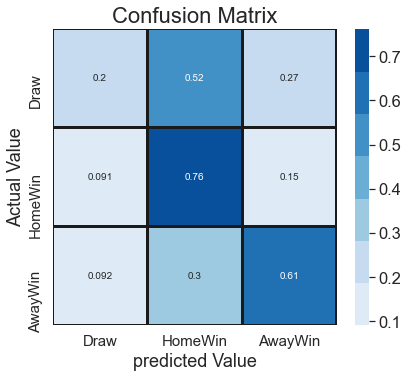

In [116]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)

### GridSearchCV using KNN Classifier

In [117]:
knn_model = Pipeline(steps=[('classifier', KNeighborsClassifier())])
knn_model

Pipeline(steps=[('classifier', KNeighborsClassifier())])

In [118]:
#set the n_neighbors
#set the metric to euclidean and minkowski
param = [{
    'classifier__leaf_size':[20,40,60],
    'classifier__n_neighbors': [3,5,10,20,50,100],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','minkowski']}]

grid = GridSearchCV(estimator = knn_model,
                    param_grid = param, scoring='accuracy')

In [119]:
output=grid.fit(X_train_scaled,y_train)

In [120]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__metric,param_classifier__n_neighbors,param_classifier__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004077,0.000264,0.091616,0.004086,20,euclidean,3,uniform,"{'classifier__leaf_size': 20, 'classifier__met...",0.488830,0.486202,0.494744,0.494744,0.489152,0.490734,0.003430,67
1,0.003712,0.000076,0.054616,0.000832,20,euclidean,3,distance,"{'classifier__leaf_size': 20, 'classifier__met...",0.493430,0.498029,0.501971,0.503942,0.494412,0.498357,0.004104,61
2,0.003844,0.000117,0.097862,0.001664,20,euclidean,5,uniform,"{'classifier__leaf_size': 20, 'classifier__met...",0.507884,0.509855,0.511170,0.516426,0.518738,0.512815,0.004096,55
3,0.003796,0.000090,0.062995,0.001213,20,euclidean,5,distance,"{'classifier__leaf_size': 20, 'classifier__met...",0.511170,0.522996,0.519711,0.519054,0.525970,0.519780,0.004966,49
4,0.003787,0.000093,0.110293,0.001248,20,euclidean,10,uniform,"{'classifier__leaf_size': 20, 'classifier__met...",0.536137,0.536794,0.536137,0.552562,0.548981,0.542122,0.007157,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.003330,0.000085,0.079443,0.001860,60,minkowski,20,distance,"{'classifier__leaf_size': 60, 'classifier__met...",0.561761,0.551905,0.559133,0.570959,0.556213,0.559994,0.006385,25
68,0.003307,0.000007,0.134623,0.000727,60,minkowski,50,uniform,"{'classifier__leaf_size': 60, 'classifier__met...",0.569645,0.571616,0.576873,0.582129,0.559500,0.571953,0.007593,13
69,0.003349,0.000106,0.104306,0.000854,60,minkowski,50,distance,"{'classifier__leaf_size': 60, 'classifier__met...",0.576216,0.563075,0.578844,0.579501,0.559500,0.571427,0.008428,19
70,0.003360,0.000111,0.162109,0.001464,60,minkowski,100,uniform,"{'classifier__leaf_size': 60, 'classifier__met...",0.580158,0.578187,0.582786,0.578187,0.563445,0.576552,0.006768,1


In [121]:
output.best_params_

{'classifier__leaf_size': 20,
 'classifier__metric': 'euclidean',
 'classifier__n_neighbors': 100,
 'classifier__weights': 'uniform'}

In [122]:
output.best_score_

0.5765523580948628

Training Scores:
Accuracy Score: 0.5852280194506505
----
Log loss Score: 0.8952782138046048
----
              precision    recall  f1-score   support

           0       0.45      0.09      0.16      1871
           1       0.60      0.84      0.70      3460
           2       0.59      0.59      0.59      2278

    accuracy                           0.59      7609
   macro avg       0.54      0.51      0.48      7609
weighted avg       0.56      0.59      0.53      7609

------------
Test Scores:
Accuracy Score: 0.58066211245402
----
Log loss Score: 0.9135761335099521
----
              precision    recall  f1-score   support

           0       0.33      0.08      0.12       441
           1       0.60      0.81      0.69       887
           2       0.58      0.61      0.60       575

    accuracy                           0.58      1903
   macro avg       0.50      0.50      0.47      1903
weighted avg       0.53      0.58      0.53      1903



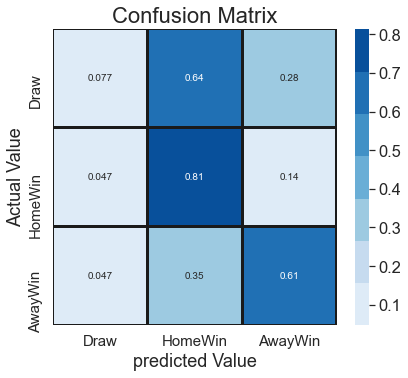

In [123]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)

### GridSearchCV using Naive Bayes

In [124]:
naives_bayes = Pipeline(steps=[('classifier', GaussianNB())])
naives_bayes

Pipeline(steps=[('classifier', GaussianNB())])

In [125]:
param = [{
    'classifier__var_smoothing':[2e-9,2e-10,2e-5,2e-20,1e-10,1e-9,1e-5]}]

grid = GridSearchCV(estimator =naives_bayes,
                    param_grid = param, scoring='accuracy')

In [126]:
output=grid.fit(X_train_scaled,y_train)

In [127]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002706,0.000376,0.001104,0.000249,2e-09,{'classifier__var_smoothing': 2e-09},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1
1,0.002541,0.000351,0.001009,0.000099,2e-10,{'classifier__var_smoothing': 2e-10},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1
2,0.002512,0.000372,0.000896,0.000069,2e-05,{'classifier__var_smoothing': 2e-05},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1
3,0.002244,0.000235,0.000863,0.000061,2e-20,{'classifier__var_smoothing': 2e-20},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1
4,0.002187,0.000102,0.000880,0.000073,1e-10,{'classifier__var_smoothing': 1e-10},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1
5,0.002108,0.000035,0.000854,0.000019,1e-09,{'classifier__var_smoothing': 1e-09},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1
6,0.002166,0.000038,0.000869,0.000018,1e-05,{'classifier__var_smoothing': 1e-05},0.536137,0.553219,0.555191,0.549934,0.533202,0.545537,0.009078,1


In [128]:
output.best_params_

{'classifier__var_smoothing': 2e-09}

In [129]:
output.best_score_

0.545536557403534

Training Scores:
Accuracy Score: 0.546852411617821
----
Log loss Score: 1.187678810741837
----
              precision    recall  f1-score   support

           0       0.32      0.35      0.34      1871
           1       0.67      0.64      0.66      3460
           2       0.57      0.56      0.56      2278

    accuracy                           0.55      7609
   macro avg       0.52      0.52      0.52      7609
weighted avg       0.55      0.55      0.55      7609

------------
Test Scores:
Accuracy Score: 0.5407251707829742
----
Log loss Score: 1.1952388382117844
----
              precision    recall  f1-score   support

           0       0.30      0.34      0.32       441
           1       0.66      0.63      0.65       887
           2       0.56      0.55      0.56       575

    accuracy                           0.54      1903
   macro avg       0.51      0.51      0.51      1903
weighted avg       0.55      0.54      0.55      1903



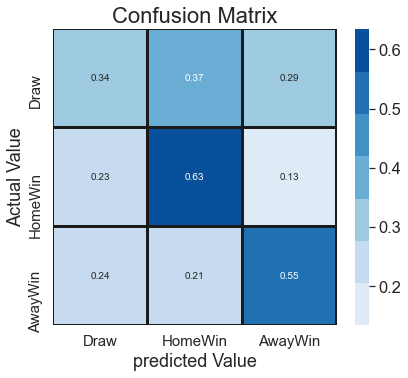

In [130]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)

### GridSearchCV using  SVC Classifier

In [131]:
svc= Pipeline(steps=[('classifier', SVC(decision_function_shape='ovo',probability=True))])
svc

Pipeline(steps=[('classifier',
                 SVC(decision_function_shape='ovo', probability=True))])

In [132]:
param = [{
    'classifier__C':[0.5,0.2,1.0],
    'classifier__gamma':['auto']}]

grid = GridSearchCV(estimator = svc,
                    param_grid = param, scoring='accuracy')

In [133]:
output=grid.fit(X_train_scaled,y_train)

In [134]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.123212,0.019893,0.143975,0.010974,0.5,auto,"{'classifier__C': 0.5, 'classifier__gamma': 'a...",0.584100,0.581472,0.582129,0.584757,0.566075,0.579706,0.006923,2
1,5.919548,0.042502,0.137586,0.000926,0.2,auto,"{'classifier__C': 0.2, 'classifier__gamma': 'a...",0.584100,0.575558,0.583443,0.584100,0.565417,0.578524,0.007307,3
2,6.292551,0.039989,0.138408,0.000450,1,auto,"{'classifier__C': 1.0, 'classifier__gamma': 'a...",0.589356,0.585414,0.586071,0.585414,0.570020,0.583255,0.006777,1


In [135]:
output.best_params_

{'classifier__C': 1.0, 'classifier__gamma': 'auto'}

Training Scores:
Accuracy Score: 0.5950847680378499
----
Log loss Score: 0.8934178383014274
----
              precision    recall  f1-score   support

           0       0.48      0.07      0.12      1871
           1       0.60      0.86      0.71      3460
           2       0.59      0.63      0.61      2278

    accuracy                           0.60      7609
   macro avg       0.56      0.52      0.48      7609
weighted avg       0.57      0.60      0.54      7609

------------
Test Scores:
Accuracy Score: 0.5948502364687336
----
Log loss Score: 0.914095489390391
----
              precision    recall  f1-score   support

           0       0.41      0.08      0.14       441
           1       0.61      0.84      0.71       887
           2       0.59      0.61      0.60       575

    accuracy                           0.59      1903
   macro avg       0.54      0.51      0.48      1903
weighted avg       0.56      0.59      0.54      1903



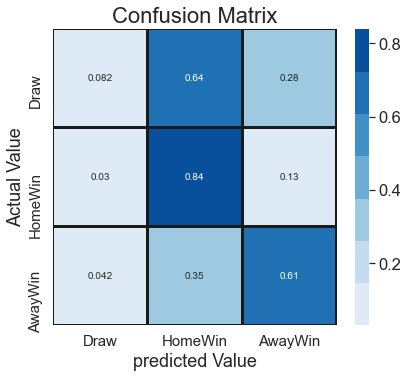

In [136]:
evaluate_model(output.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test)